<div class="alert alert-block alert-info">
<center> <h1> DATA MINING MDSAA-DS </h1> </center> <br>
<center> PROJECT 2023/2024 </center>

**GROUP 4:**    <br> 
- Ana Filipa Silva (20230577) <br>
- Sofia Pereira (20230568) <br>
- Raquel Rocha (20230188)

<div class="alert alert-block alert-info">

[1. Objectives](#1st-bullet)<br>  

[2. Import Data/Libraries](#2nd-bullet)<br>  

[3. Outlier Removal with DBSCAN](#3rd-bullet)<br>  

[4. Clustering Methods](#4th-bullet)<br> 
- [4.1. K-means + Hierarchial clustering](#5th-bullet)<br>
    - [4.1.1. Frequency Perspective](#6th-bullet)<br>
    - [4.1.2. Demographic Perspective](#7th-bullet)<br>
    - [4.1.3. Merging with Hierarchical clustering](#8th-bullet)<br>
    - [4.1.4. Profiling clusters](#9th-bullet)<br>
    - [4.1.4. Categorical Profiling](#10th-bullet)<br>

- [4.2 SOM + K-Means & Hierarchical Clustering](#11th-bullet)<br>
    - [4.2.1. Frequency Perspective](#12th-bullet)<br>
    - [4.2.2. Demographic Perspective](#13th-bullet)<br>
    - [4.2.3. Merging with Hierarchical clustering](#14th-bullet)<br>
    - [4.2.4. Profiling clusters](#15th-bullet)<br>

- [4.3 Gaussian Mixture Model](#16th-bullet)<br> 
    - [4.3.1. Frequency Perspective](#17th-bullet)<br>
    - [4.3.2. Demographic Perspective](#18th-bullet)<br>
    - [4.3.3. Merging with Hierarchical clustering](#19th-bullet)<br>
    - [4.3.4. Profiling clusters](#20th-bullet)<br>

[5. Final Model and Cluster Profling](#21th-bullet)<br> 
- [5.1 Numerical Features](#22th-bullet)<br>
- [5.2 Categorical Features](#23th-bullet)<br>
- [ 5.3 Cluster Profiling](#24th-bullet)<br>


</div>


<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
## 1. Objectives

    
</div>


<div class="alert alert-block alert-success">

<a class="anchor" id="2nd-bullet"> </a>
## 2. Import Data/Libraries  

</div>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN,AgglomerativeClustering
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm



plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

from collections import Counter
from os.path import join
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.base import clone
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz

import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView
sns.set()

import warnings
warnings.filterwarnings("ignore")

/var/folders/x6/c7bgz3zn0hg_kdmljrfw7k_m0000gn/T/ipykernel_10447/874651299.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [3]:
data = pd.read_csv("data_prespective.csv")

In [4]:
data.set_index("ID", inplace=True)

In [5]:
data.head()

Age  UseByTime  AthleticsActivities  WaterActivities  \
ID                                                                 
10000  3.083333          0                  0.0              0.0   
10001  0.500000          0                  0.0              0.0   
10002  0.000000          0                  0.0              0.0   
10003 -1.166667          0                  0.0              0.0   
10004  1.000000          0                  0.0              0.0   

       FitnessActivities  TeamActivities  RacketActivities  CombatActivities  \
ID                                                                             
10000                1.0             0.0               0.0               0.0   
10001                0.0             0.0               0.0               0.0   
10002                1.0             0.0               0.0               0.0   
10003                0.0             1.0               0.0               0.0   
10004                1.0             0.0               0.0               0.0   

       SpecialActivities  OtherActivities  Dropout  Active_Period  \
ID                                                                  
10000                0.0              0.0        0       0.000000   
10001                1.0              0.0        1       0.989071   
10002                0.0              0.0        1      -0.016393   
10003                0.0              0.0        1       0.989071   
10004                0.0              0.0        1      -0.016393   

       Contract_Duration  PercentageOfVisits  MonthlyValue  \
ID                                                           
10000          -0.490868                1.15      3.017065   
10001           0.285388               -0.20      0.607509   
10002          -0.554795                0.50      0.493905   
10003          -0.257991                0.35      0.176012   
10004           1.152968               -0.50     -0.611409   

       PercentageOfClasses  Freq_Visits_Day  Visits_ActivePeriod  \
ID                                                                 
10000             1.866571         0.763419            -0.201465   
10001             0.104392        -0.204771            -0.501832   
10002             0.000000         1.208748             0.619048   
10003             0.239981         0.463221            -0.300366   
10004             0.000000        -0.255467            -0.600733   

       Gender_Female  
ID                    
10000              1  
10001              1  
10002              0  
10003              0  
10004              0

In [6]:
metric_features = ['Age','Contract_Duration', 'PercentageOfVisits', 'PercentageOfClasses',
       'Freq_Visits_Day', 'Visits_ActivePeriod', 'MonthlyValue','Active_Period']

In [7]:
activities = ['AthleticsActivities', 'WaterActivities','FitnessActivities','TeamActivities','RacketActivities','CombatActivities','SpecialActivities','OtherActivities']
compare = ['Dropout', 'Gender_Female','UseByTime']

#### Necessary Functions

In [8]:
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst
    
def get_r2_scores(df, clusterer, min_k=2, max_k=10):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust

In [9]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
       
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) 
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

<div class="alert alert-block alert-success">

<a class="anchor" id="3rd-bullet">    </a>
## 3. Outlier Removal with DBSCAN
</div>

To detected the remaining outliers, and being that our data is highly skewed, a DBSCAN was applied.

 The parameteres defined are the following ( **ε** and **min_samples**): 
 
 -  **min_samples**  is, on a first approach, considered **2 x dim** where dim is the dimension of the metric features;
 - **ε** can be found by ploting a **k-distance graph** (distance to the kth (k = min_samples - 1) nearest neighbor ordered from the largest to the smallest value). The **elbow** of this graph is considered a good value for ε.

Loaded backend module://matplotlib_inline.backend_inline version unknown.
Loaded backend module://matplotlib_inline.backend_inline version unknown.
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', varian

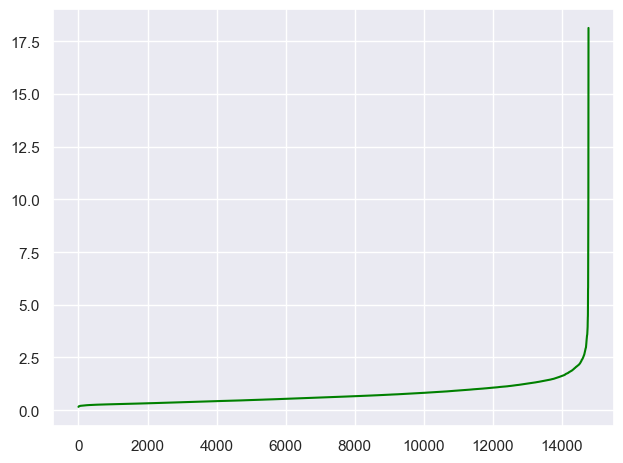

In [10]:
neigh = NearestNeighbors(n_neighbors = (2 * len(metric_features)) - 1)
neigh.fit(data[metric_features])
distances, _ = neigh.kneighbors(data[metric_features])
distances = np.sort(distances[:, -1])
#plt.yticks(np.arange(1,22,0.5))
plt.plot(distances, color = 'green')
plt.show()

An **ε** of 2.25 is selected as the optimal value.

In [11]:
dbscan = DBSCAN(eps=2.25, min_samples = 2 * len(metric_features), n_jobs = -1)
dbscan_labels = dbscan.fit_predict(data[metric_features])

Counter(dbscan_labels)

Counter({0: 14687, -1: 86})

In [12]:
data_dbscan_out = data[dbscan_labels == -1]
data = data[dbscan_labels != -1]

In [13]:
data.shape

(14687, 19)

In [14]:
demographic_perspective = ['Age', 'Active_Period', 'MonthlyValue', 'Contract_Duration']
df_demographic = data[demographic_perspective]

In [15]:
frequency_perspective = [ 'PercentageOfVisits', 'PercentageOfClasses',
       'Freq_Visits_Day', 'Visits_ActivePeriod']

df_frequency = data[frequency_perspective]

<div class="alert alert-block alert-success">

<a class="anchor" id="4th-bullet">    </a>
## 4. Clustering Methods
</div>

<div class="alert alert-block alert-success">

<a class="anchor" id="5th-bullet">    </a>
## 4.1. K-Means + Hierarchial clustering
</div>

<div class="alert alert-block alert-info">

<a class="anchor" id="6th-bullet">    </a>
### 4.1.1. Frequency Perspective
</div>

Through the examination of the `elbow method` and `silhouette` plot there was as slight difference in regards to the optimal number of clusters.
The one that offered the best balance between granularity and separation was k = 5.

In [16]:
kmeans = KMeans(
    init='k-means++',
    n_init=20,
    random_state=42
)

hierarchical = AgglomerativeClustering(
    metric='euclidean'
)

In [17]:
# Obtaining the R² scores for each cluster solution on frequency variables
r2_scores = {}
r2_scores['kmeans'] = get_r2_scores(df_frequency, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores[linkage] = get_r2_scores(
    df_demographic, hierarchical.set_params(linkage=linkage)
    )

pd.DataFrame(r2_scores)

kmeans  complete   average    single      ward
2  0.347787  0.057110  0.083328  0.000691  0.201644
3  0.564932  0.238184  0.083587  0.002181  0.368119
4  0.648661  0.255815  0.096338  0.002437  0.469989
5  0.718441  0.347472  0.309086  0.002584  0.539211
6  0.755161  0.425317  0.309959  0.003363  0.590800
7  0.786368  0.430957  0.315849  0.003376  0.630527
8  0.805068  0.437306  0.317968  0.007190  0.658775
9  0.822899  0.534205  0.356714  0.007453  0.679054

In [18]:
range_clusters = range(1, 11)
inertia = []
for n_clus in range_clusters: 
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(df_frequency[frequency_perspective])
    inertia.append(kmclust.inertia_)  

findfont: Matching sans\-serif:style=normal:variant=normal:weight=bold:stretch=normal:size=12.0.
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/pyt

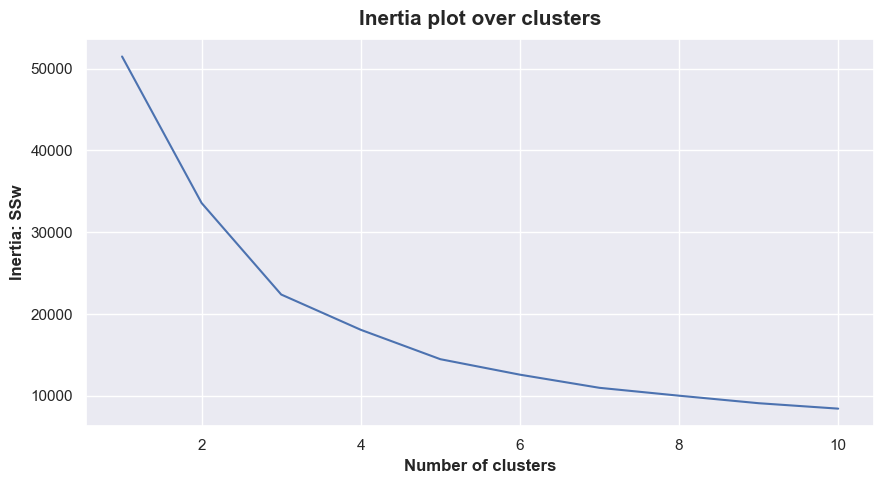

In [19]:
# Inertia plot
plt.figure(figsize=(9,5))
plt.plot(range_clusters, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

For n_clusters = 2, the average silhouette_score is : 0.4382818346352872
For n_clusters = 3, the average silhouette_score is : 0.4718023451171697
For n_clusters = 4, the average silhouette_score is : 0.4165320646279373
For n_clusters = 5, the average silhouette_score is : 0.44389951967190167
For n_clusters = 6, the average silhouette_score is : 0.40802672046999794
For n_clusters = 7, the average silhouette_score is : 0.3978708996944132
For n_clusters = 8, the average silhouette_score is : 0.39428316628814775
For n_clusters = 9, the average silhouette_score is : 0.3741484903040538
For n_clusters = 10, the average silhouette_score is : 0.36202580585869815


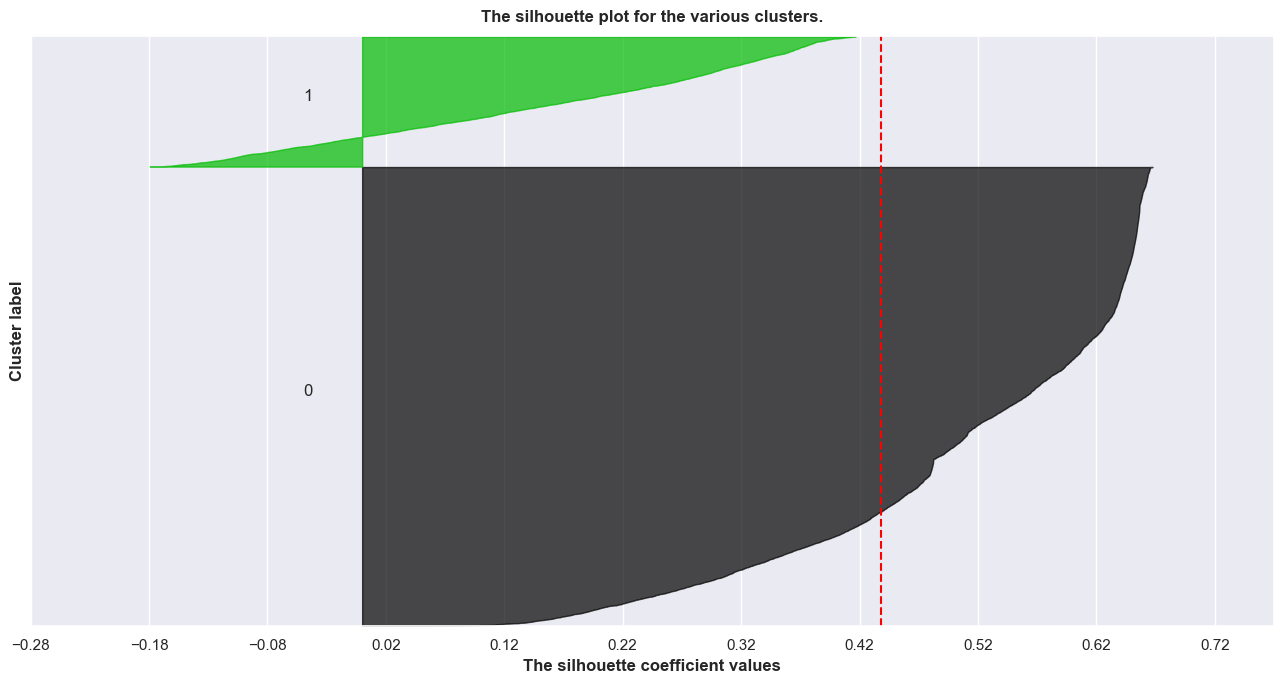

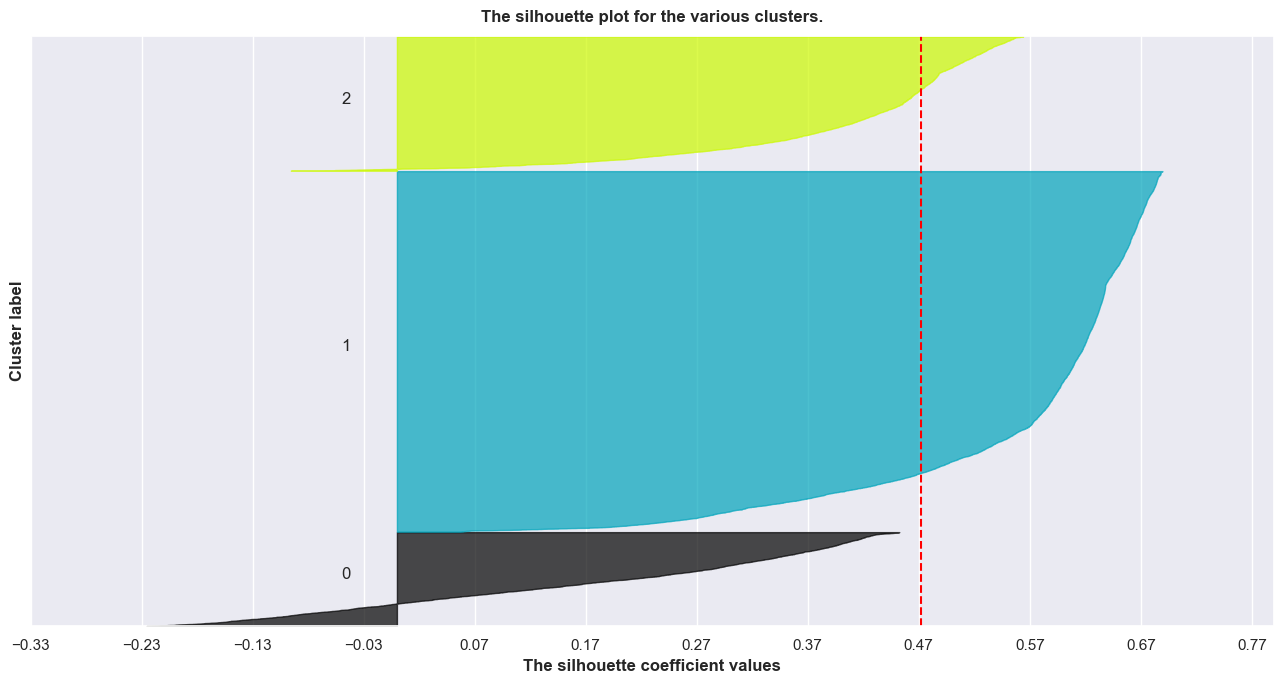

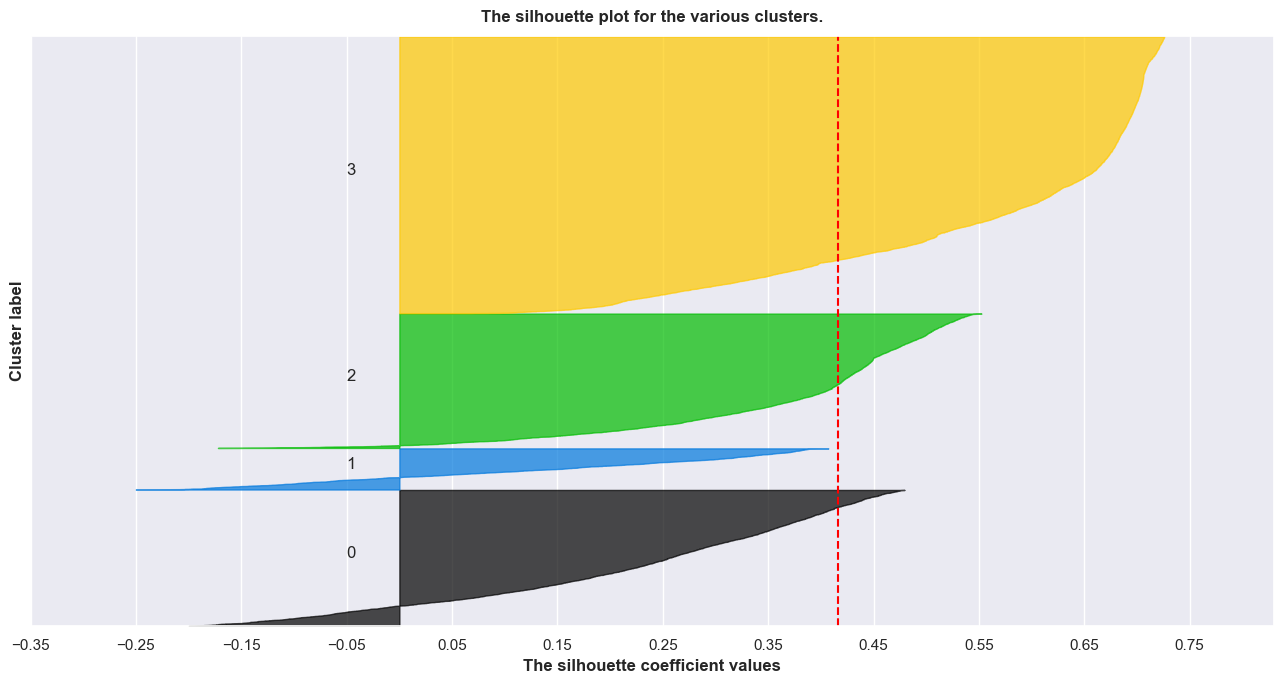

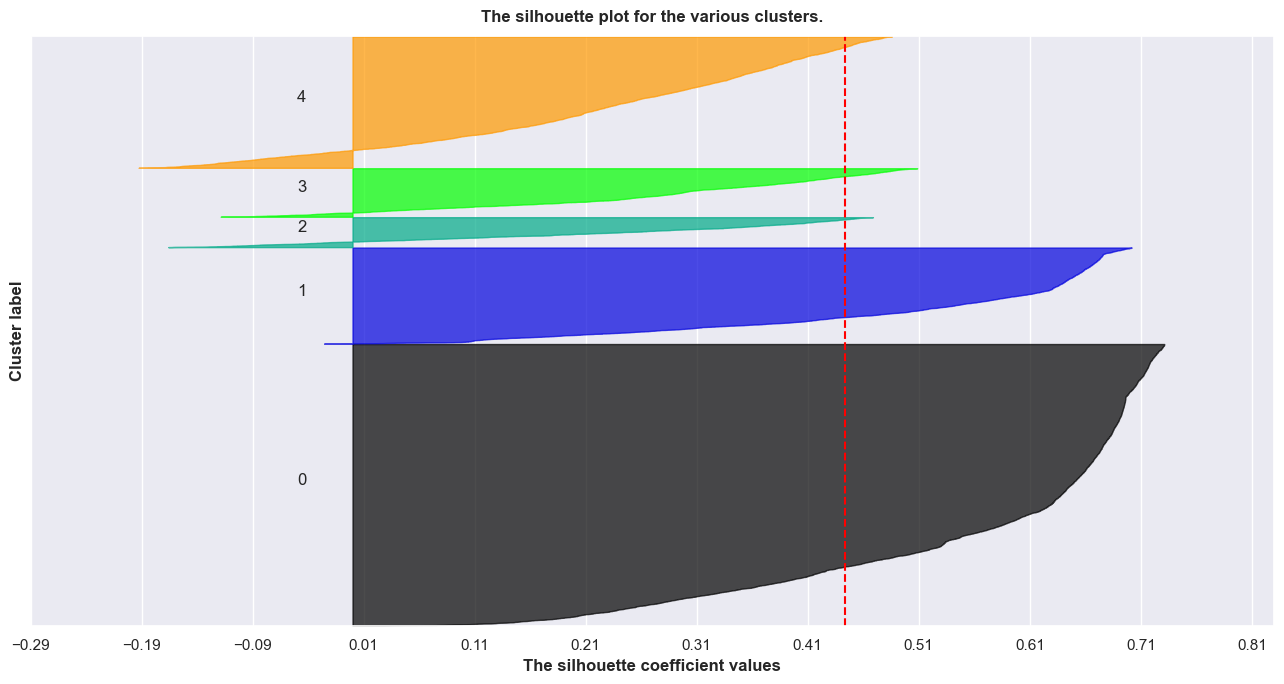

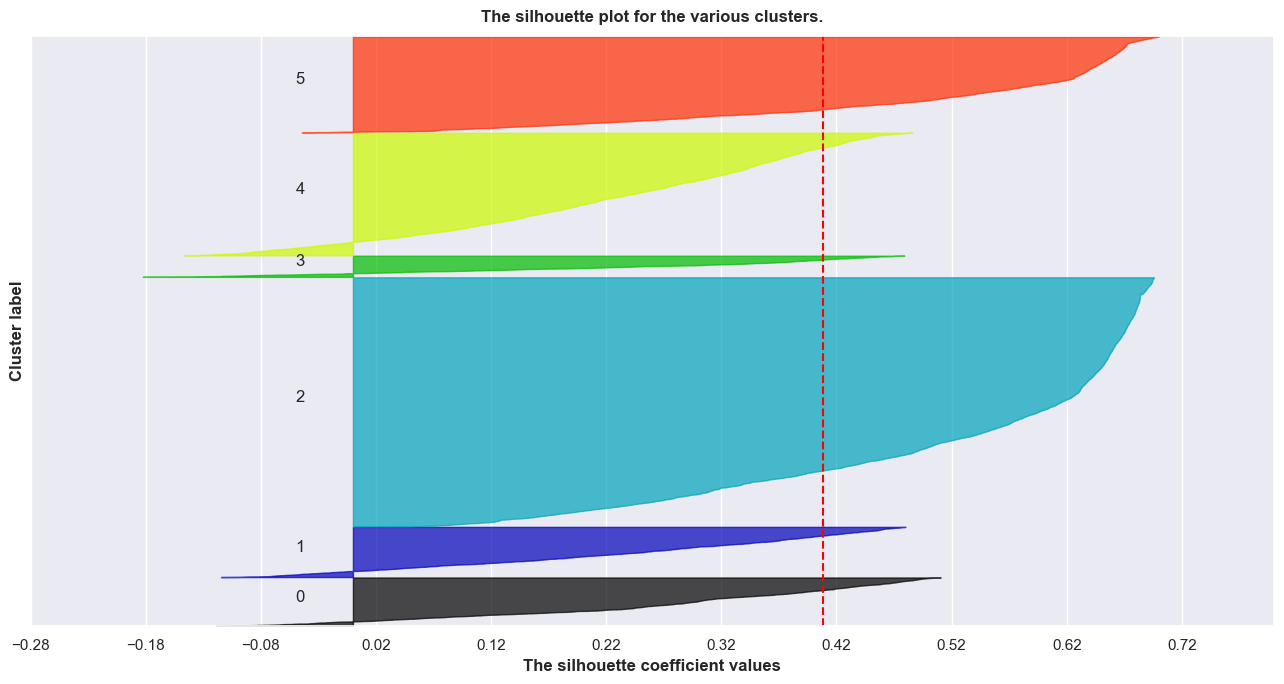

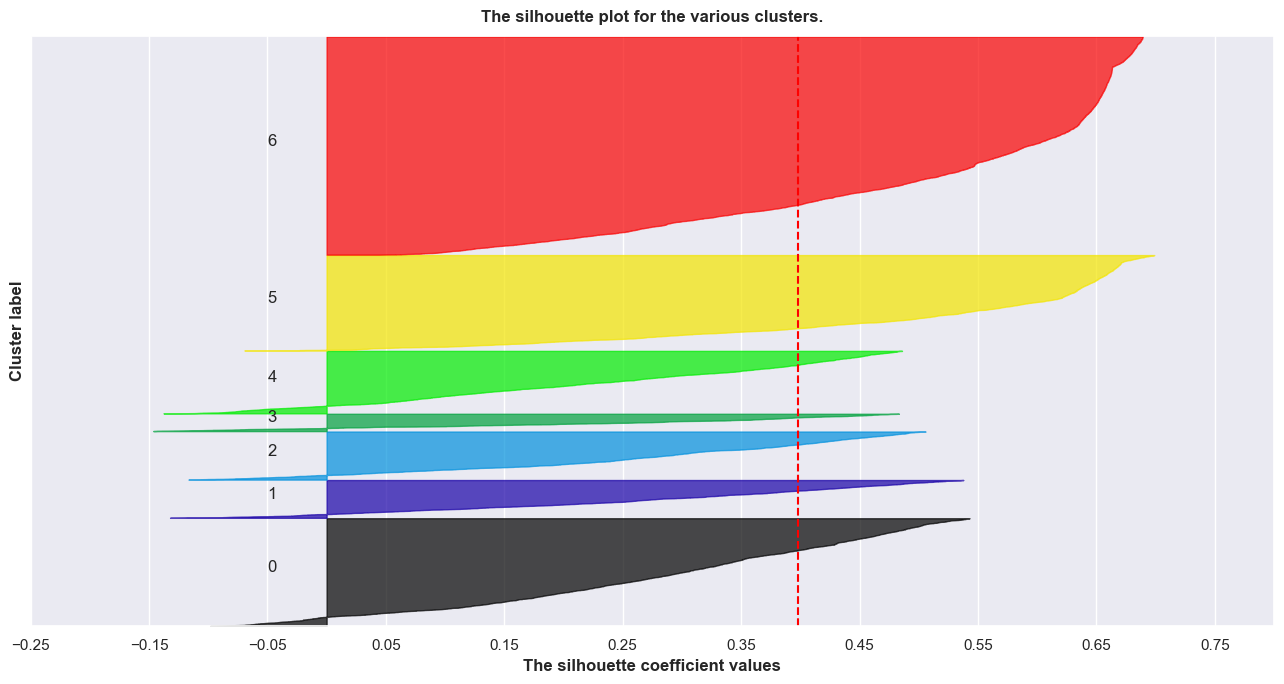

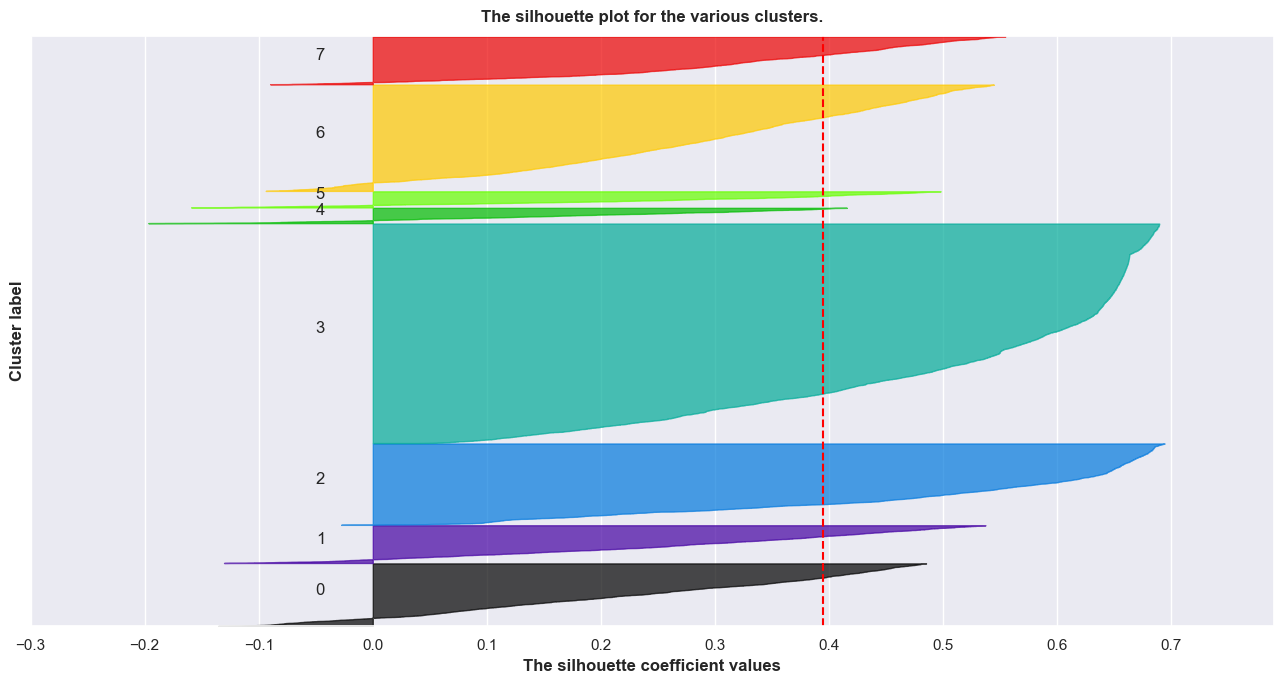

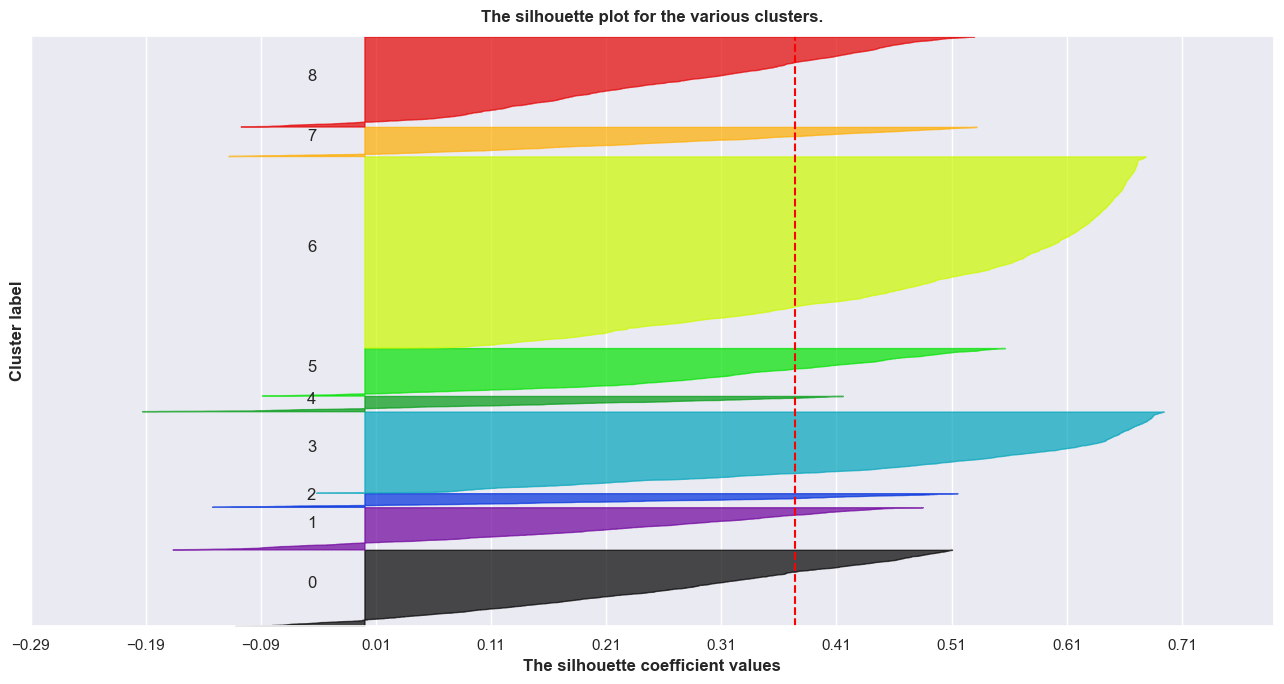

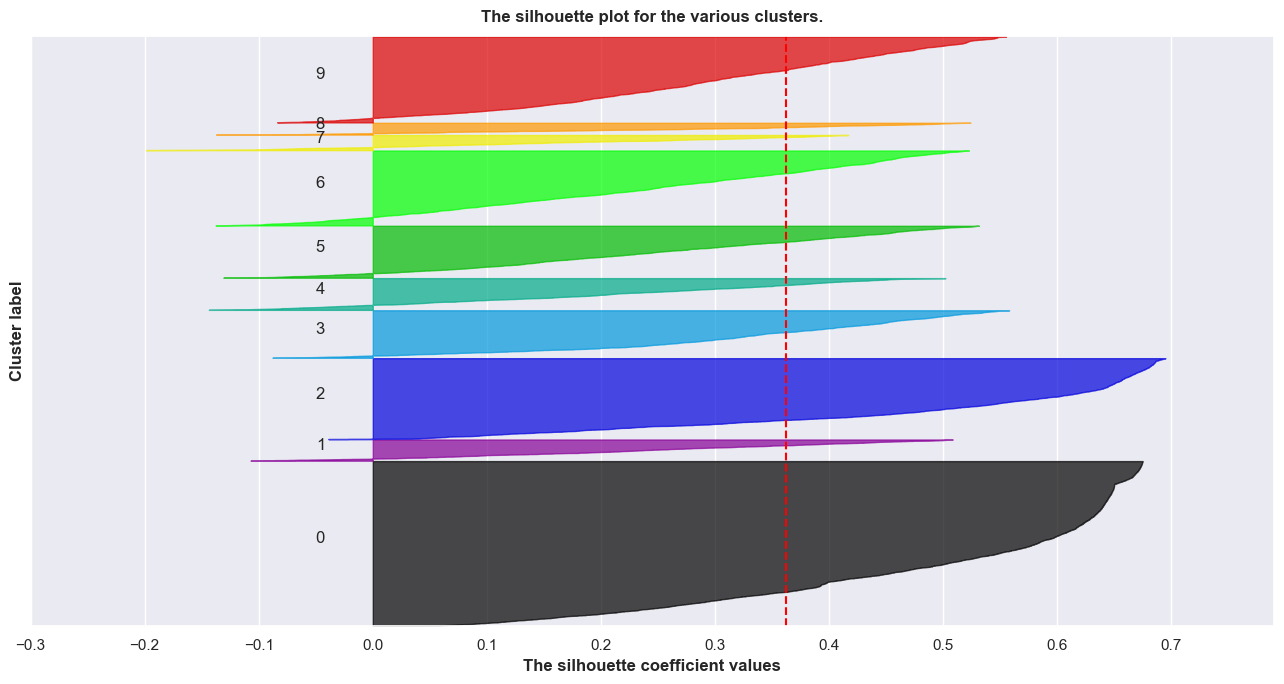

In [20]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df_frequency[frequency_perspective])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_frequency[frequency_perspective], cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_frequency[frequency_perspective], cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_frequency[frequency_perspective]) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

<div class="alert alert-block alert-info">

<a class="anchor" id="7th-bullet">    </a>
### 4.1.2. Demographic Perspective
</div>

According to the values obtain trough the `elbow method` and `silhouette analysis` the number of clusters that offered the best balance between granularity and separation was k = 3.

In [21]:
range_clusters = range(1, 11)
inertia = []
for n_clus in range_clusters:  
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(df_demographic[demographic_perspective])
    inertia.append(kmclust.inertia_)  

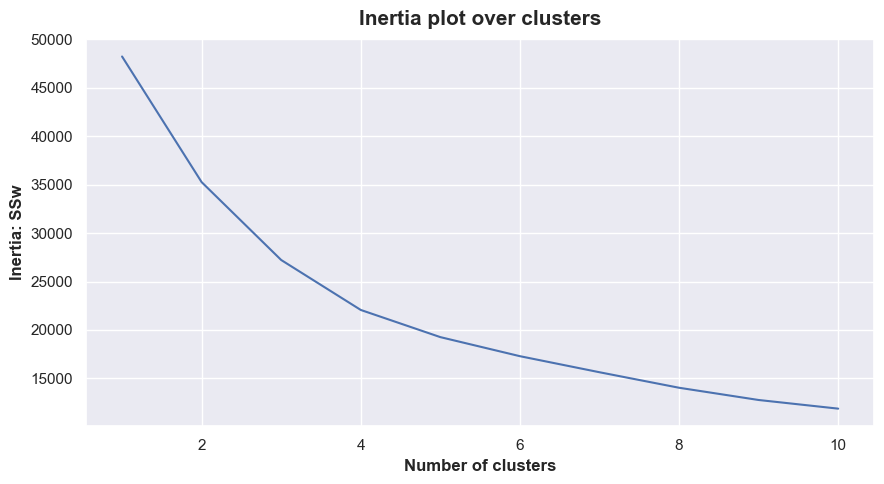

In [22]:
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(range_clusters, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

For n_clusters = 2, the average silhouette_score is : 0.35313110667707437
For n_clusters = 3, the average silhouette_score is : 0.3253141748247693
For n_clusters = 4, the average silhouette_score is : 0.2895190709196225
For n_clusters = 5, the average silhouette_score is : 0.30278462053500427
For n_clusters = 6, the average silhouette_score is : 0.25825212955925225
For n_clusters = 7, the average silhouette_score is : 0.28798570076320673
For n_clusters = 8, the average silhouette_score is : 0.2938647342889417
For n_clusters = 9, the average silhouette_score is : 0.29636294762618476
For n_clusters = 10, the average silhouette_score is : 0.2990175353120274


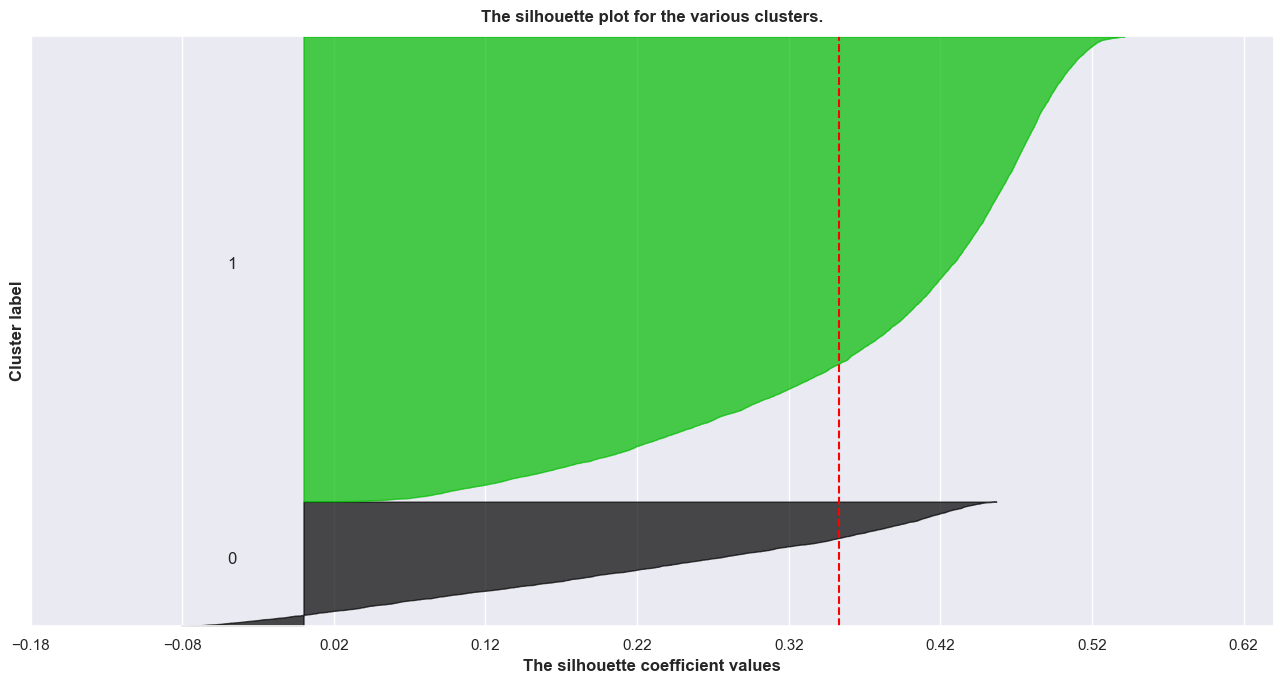

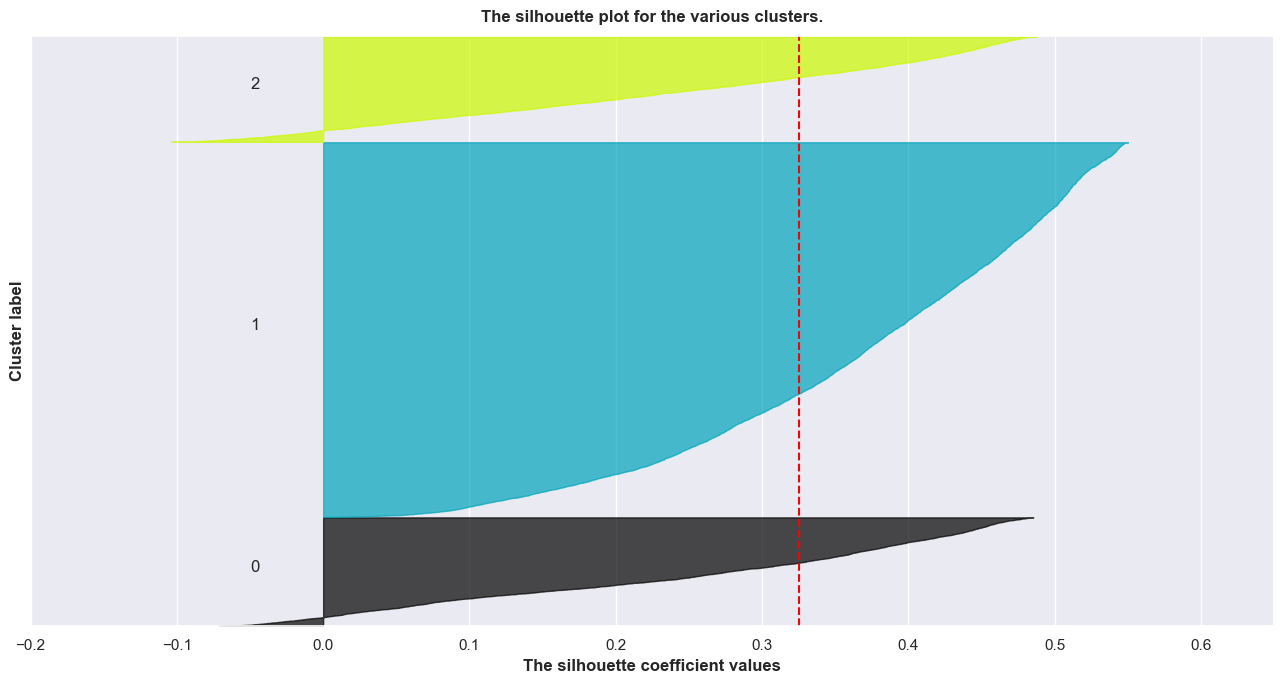

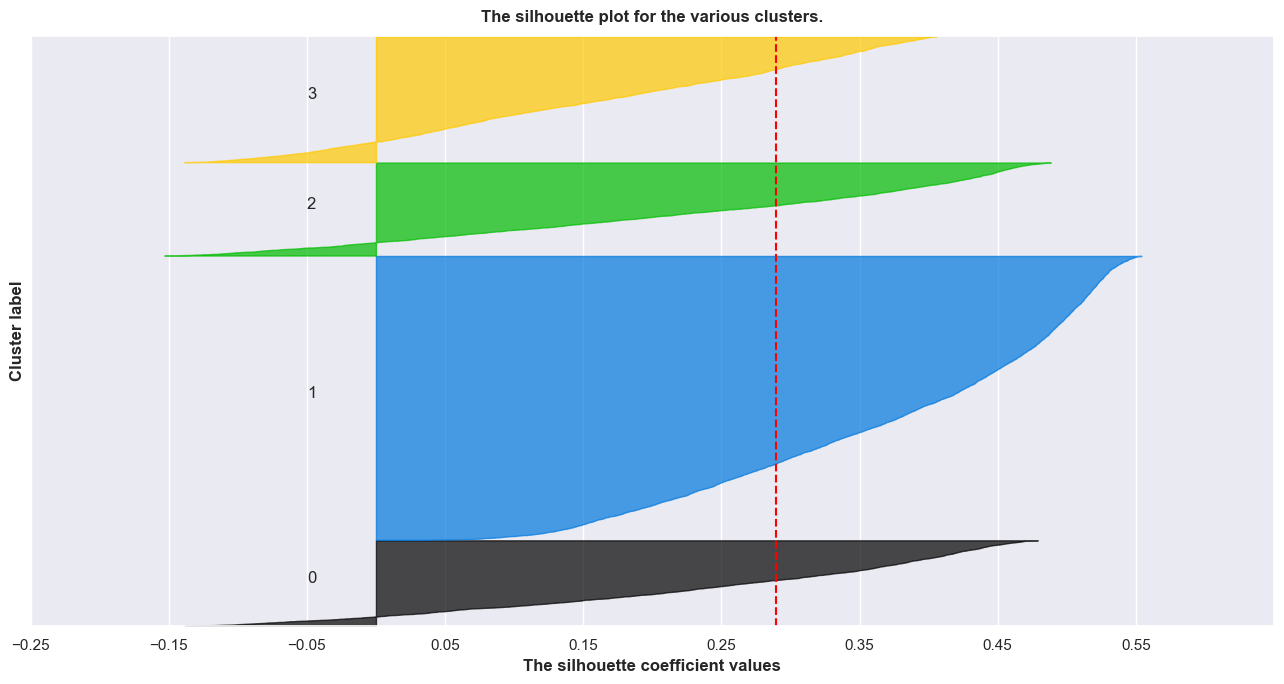

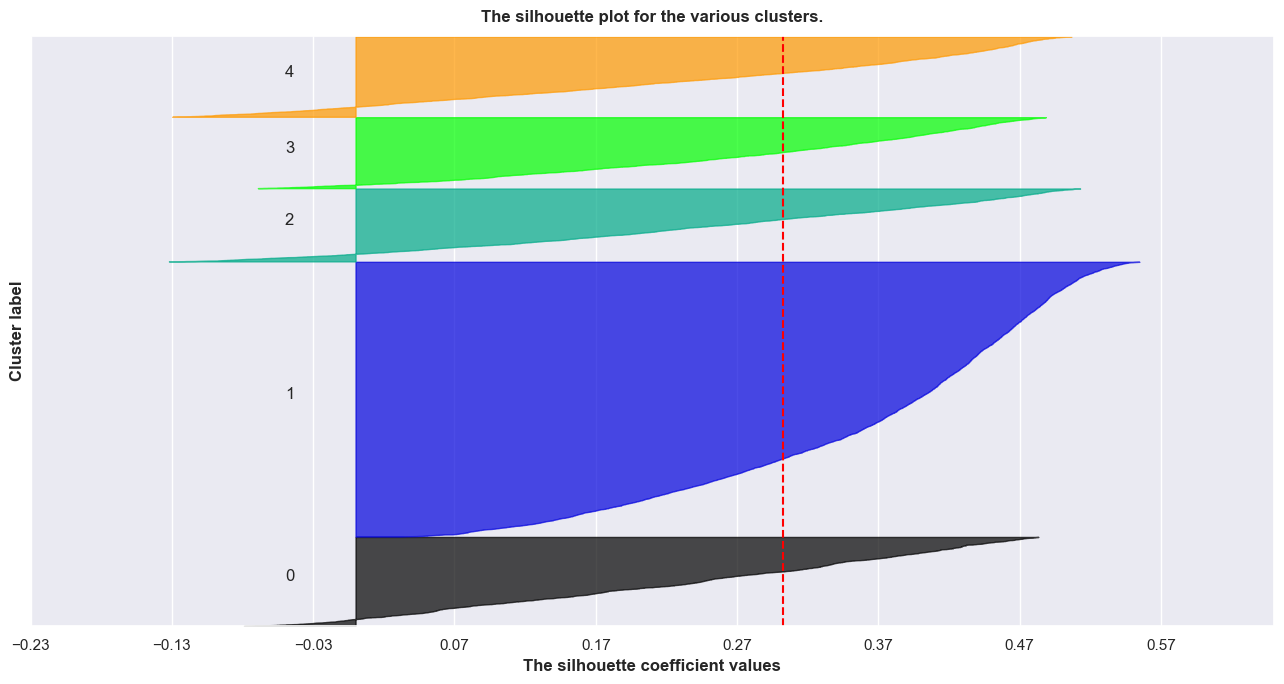

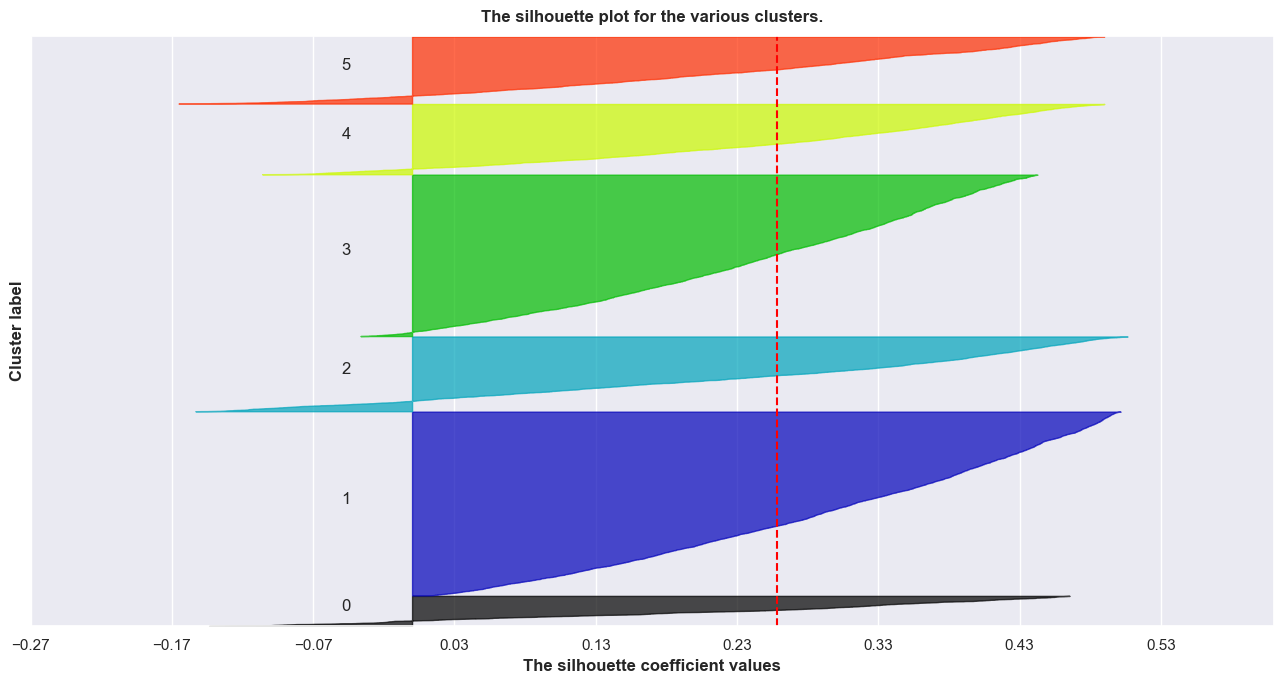

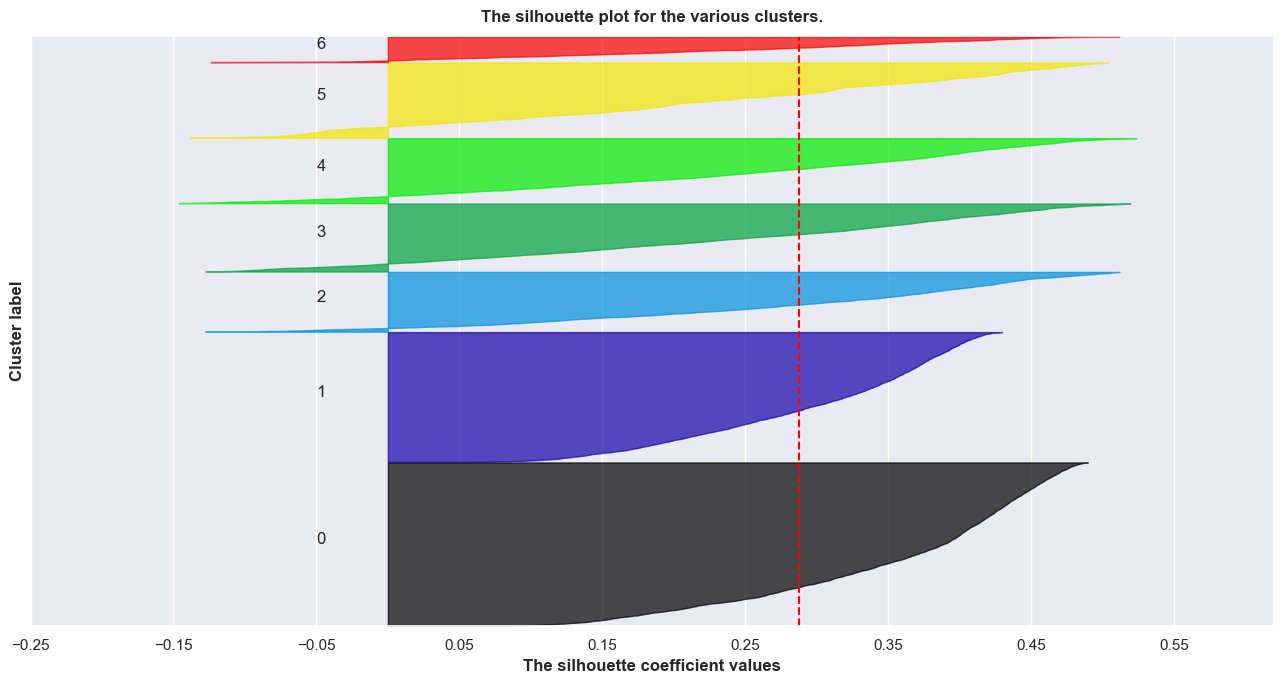

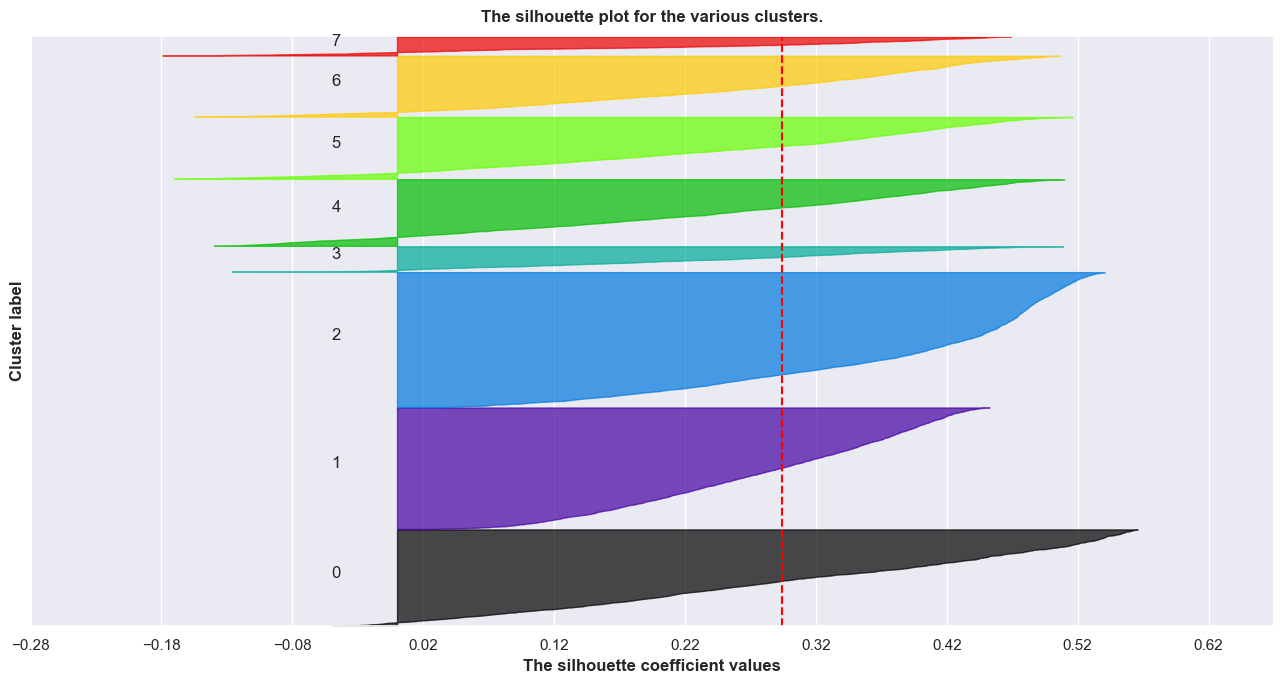

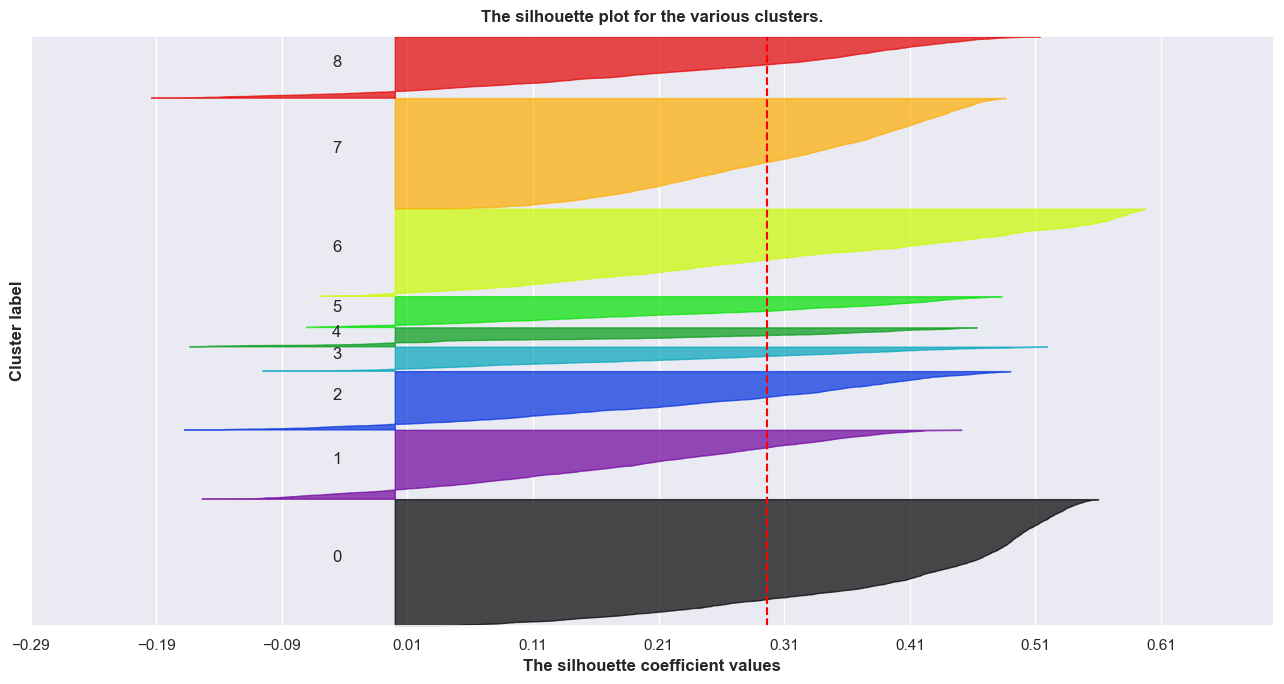

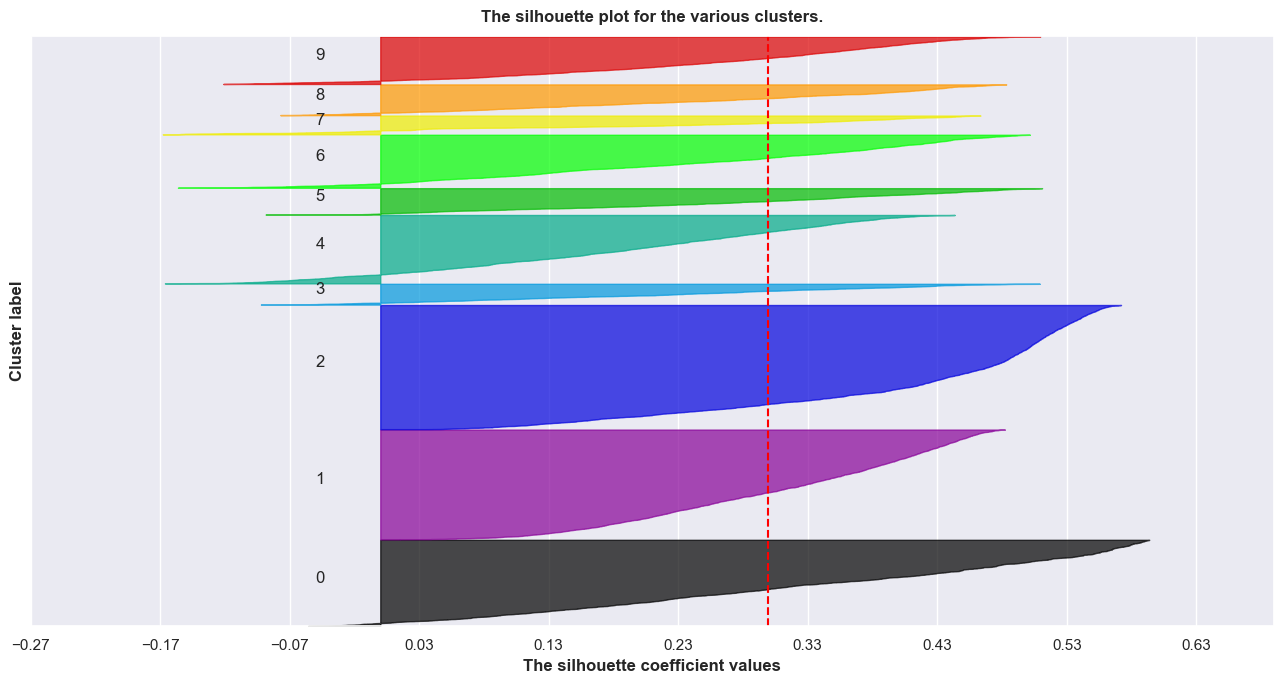

In [23]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df_demographic[demographic_perspective])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_demographic[demographic_perspective], cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_demographic[demographic_perspective], cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_demographic[demographic_perspective]) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

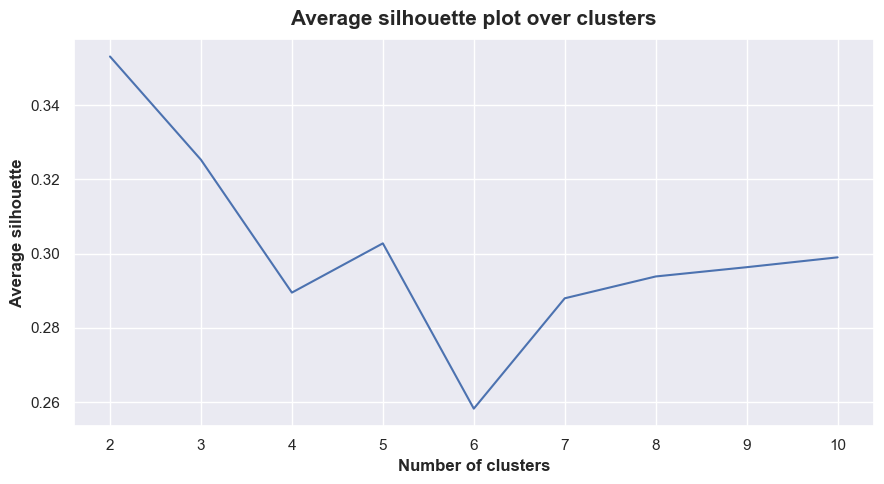

In [24]:
# The average silhouette plot
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(range_clusters[1:], 
         avg_silhouette)     

plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

findfont: Matching sans\-serif:style=normal:variant=normal:weight=bold:stretch=normal:size=13.0.
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='/Users/sofiapereira/anaconda3/envs/DM2324/lib/pyt

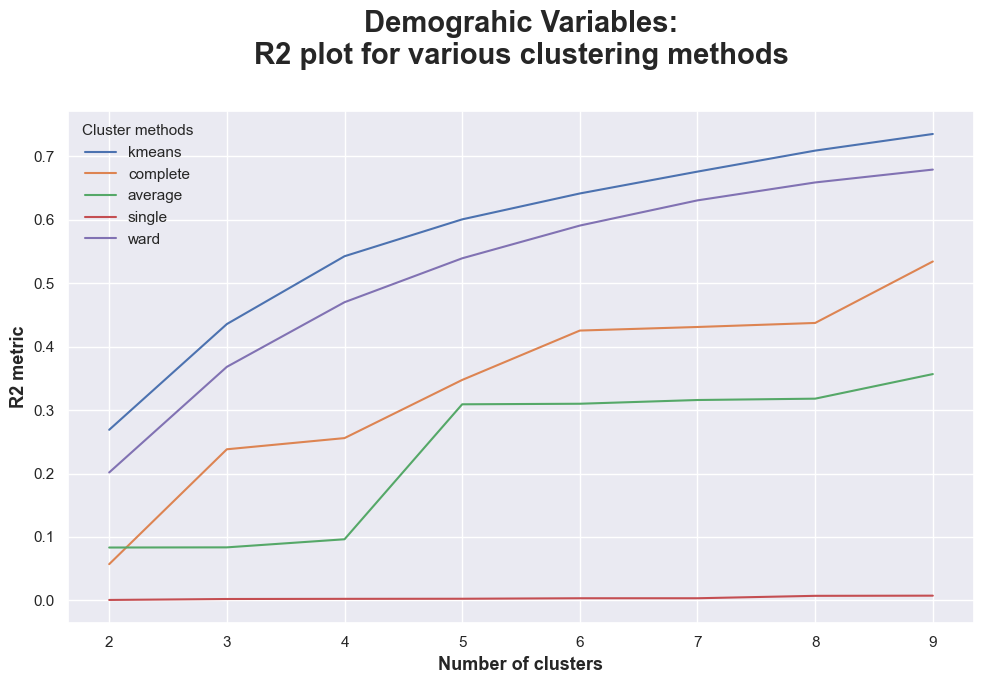

In [25]:
# Obtaining the R² scores for each cluster solution on demographic variables
r2_scores = {}
r2_scores['kmeans'] = get_r2_scores(df_demographic, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores[linkage] = get_r2_scores(
        df_demographic, hierarchical.set_params(linkage=linkage)
    )

# Visualizing the R² scores for each cluster solution on product variables
pd.DataFrame(r2_scores).plot.line(figsize=(10,7))

plt.title("Demograhic Variables:\nR2 plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)
plt.show()

#### Merging the Perspectives

In [26]:
df_frequency

PercentageOfVisits  PercentageOfClasses  Freq_Visits_Day  \
ID                                                                
10000                1.15             1.866571         0.763419   
10001               -0.20             0.104392        -0.204771   
10002                0.50             0.000000         1.208748   
10003                0.35             0.239981         0.463221   
10004               -0.50             0.000000        -0.255467   
...                   ...                  ...              ...   
24937                0.65             2.056875         0.190855   
24938               -0.25             0.000000         1.391650   
24939                0.85             0.000000         1.208748   
24940                1.70             2.010559         2.240557   
24941                0.55             0.014159         0.661034   

       Visits_ActivePeriod  
ID                          
10000            -0.201465  
10001            -0.501832  
10002             0.619048  
10003            -0.300366  
10004            -0.600733  
...                    ...  
24937             1.000000  
24938             0.007326  
24939             1.025641  
24940             0.802198  
24941             2.043956  

[14687 rows x 4 columns]

In [27]:
# Applying the right clustering (algorithm and number of clusters) for each perspective
kmeans_freq = KMeans(
    n_clusters=5,
    init='k-means++',
    n_init=20,
    random_state=42
)
frequency_labels = kmeans_freq.fit_predict(df_frequency)

kmeans_demo = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=20,
    random_state=42
)
demographic_labels = kmeans_demo.fit_predict(df_demographic)

data['frequency_labels'] = frequency_labels
data['demographic_labels'] = demographic_labels

In [28]:
pd.crosstab(data['frequency_labels'],
            data['demographic_labels'])

demographic_labels     0     1     2
frequency_labels                    
0                   1109  4703  1258
1                    386   659   171
2                    591  1432   374
3                    136   404   204
4                    479  2156   625

<div class="alert alert-block alert-info">

<a class="anchor" id="8th-bullet">    </a>
### 4.1.3. Merging using Hierarchical clustering
</div>

In [29]:
# Centroids of the concatenated cluster labels
df_centroids = data.groupby(['frequency_labels', 'demographic_labels'])\
    [metric_features].mean()
df_centroids

Age  Contract_Duration  \
frequency_labels demographic_labels                                
0                0                   0.194545           1.706299   
                 1                  -0.044032          -0.153965   
                 2                   2.141892           0.189510   
1                0                  -0.891623           2.062667   
                 1                  -0.897825           0.031499   
                 2                   2.044347           0.416473   
2                0                  -0.672589           1.969176   
                 1                  -0.732542           0.063881   
                 2                   2.141934           0.348760   
3                0                   0.422794           2.098375   
                 1                   0.053630          -0.192742   
                 2                   2.526961           0.530296   
4                0                   0.295581           1.776761   
                 1                   0.031347          -0.185082   
                 2                   2.247600           0.265859   

                                     PercentageOfVisits  PercentageOfClasses  \
frequency_labels demographic_labels                                            
0                0                            -0.157439             0.041313   
                 1                            -0.202924             0.019628   
                 2                            -0.281916             0.030912   
1                0                             1.772280             2.080103   
                 1                             1.880425             2.072810   
                 2                             2.206433             2.105826   
2                0                            -0.046954             2.147680   
                 1                            -0.064455             2.181335   
                 2                            -0.192914             2.087669   
3                0                             1.912868             0.118810   
                 1                             1.837748             0.103966   
                 2                             1.769853             0.129038   
4                0                             0.673173             0.054595   
                 1                             0.576971             0.016865   
                 2                             0.564240             0.057066   

                                     Freq_Visits_Day  Visits_ActivePeriod  \
frequency_labels demographic_labels                                         
0                0                         -0.254643            -0.131462   
                 1                         -0.135021            -0.210254   
                 2                         -0.100638            -0.288958   
1                0                          0.055617             0.711078   
                 1                          0.316873             0.630120   
                 2                          0.513376             0.711887   
2                0                         -0.199312            -0.328015   
                 1                         -0.210547            -0.374486   
                 2                         -0.165377            -0.410462   
3                0                          1.627653             3.960138   
                 1                          2.669062             3.004289   
                 2                          2.177967             3.637183   
4                0                          0.650763             1.135875   
                 1                          0.993250             0.834918   
                 2                          1.115302             0.918476   

                                     MonthlyValue  Active_Period  
frequency_labels demographic_labels                               
0                0                      -0.728441       0.423416  
             

In [30]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
linkage = 'ward'
hclust = AgglomerativeClustering(
    linkage=linkage, 
    metric='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids)

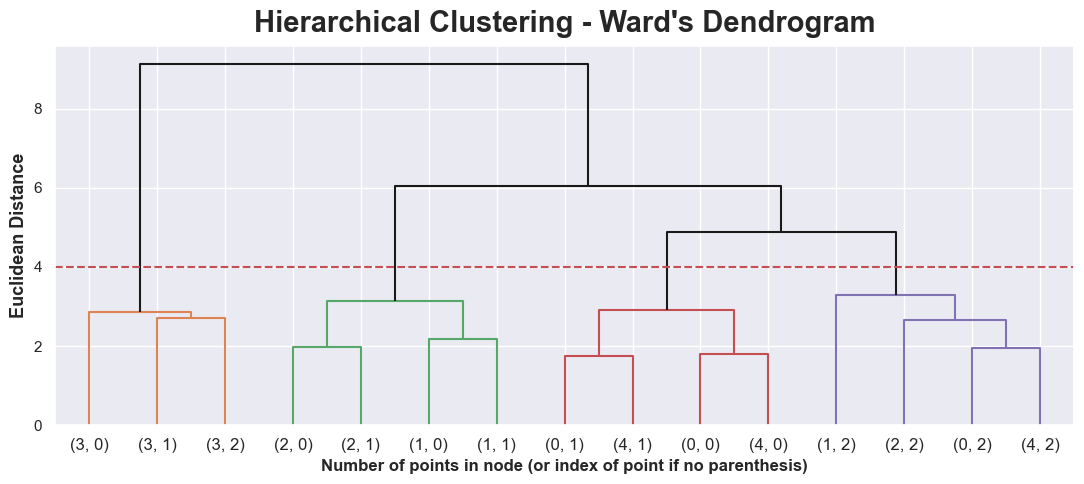

In [31]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 4
dendrogram(linkage_matrix, 
           truncate_mode='level', 
           labels=df_centroids.index, p=5, 
           color_threshold=y_threshold, 
           above_threshold_color='k')

plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [32]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    metric='euclidean', 
    n_clusters=4
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids  # centroid's cluster labels

Age  Contract_Duration  \
frequency_labels demographic_labels                                
0                0                   0.194545           1.706299   
                 1                  -0.044032          -0.153965   
                 2                   2.141892           0.189510   
1                0                  -0.891623           2.062667   
                 1                  -0.897825           0.031499   
                 2                   2.044347           0.416473   
2                0                  -0.672589           1.969176   
                 1                  -0.732542           0.063881   
                 2                   2.141934           0.348760   
3                0                   0.422794           2.098375   
                 1                   0.053630          -0.192742   
                 2                   2.526961           0.530296   
4                0                   0.295581           1.776761   
                 1                   0.031347          -0.185082   
                 2                   2.247600           0.265859   

                                     PercentageOfVisits  PercentageOfClasses  \
frequency_labels demographic_labels                                            
0                0                            -0.157439             0.041313   
                 1                            -0.202924             0.019628   
                 2                            -0.281916             0.030912   
1                0                             1.772280             2.080103   
                 1                             1.880425             2.072810   
                 2                             2.206433             2.105826   
2                0                            -0.046954             2.147680   
                 1                            -0.064455             2.181335   
                 2                            -0.192914             2.087669   
3                0                             1.912868             0.118810   
                 1                             1.837748             0.103966   
                 2                             1.769853             0.129038   
4                0                             0.673173             0.054595   
                 1                             0.576971             0.016865   
                 2                             0.564240             0.057066   

                                     Freq_Visits_Day  Visits_ActivePeriod  \
frequency_labels demographic_labels                                         
0                0                         -0.254643            -0.131462   
                 1                         -0.135021            -0.210254   
                 2                         -0.100638            -0.288958   
1                0                          0.055617             0.711078   
                 1                          0.316873             0.630120   
                 2                          0.513376             0.711887   
2                0                         -0.199312            -0.328015   
                 1                         -0.210547            -0.374486   
                 2                         -0.165377            -0.410462   
3                0                          1.627653             3.960138   
                 1                          2.669062             3.004289   
                 2                          2.177967             3.637183   
4                0                          0.650763             1.135875   
                 1                          0.993250             0.834918   
                 2                          1.115302             0.918476   

                                     MonthlyValue  Active_Period  \
frequency_labels demographic_labels                                
0                0                      -0.728441       0.423416   
          

In [33]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()

df_ = data.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['merged_labels'] = df_.apply(
    lambda row: cluster_mapper[
        (row['frequency_labels'], row['demographic_labels'])
    ], axis=1
)

# Merged cluster centroids
df_.groupby('merged_labels').mean()[metric_features]

Age  Contract_Duration  PercentageOfVisits  \
merged_labels                                                    
0              2.162239           0.249678            0.124856   
1              0.025788           0.191810            0.051788   
2             -0.776510           0.675426            0.587761   
3              0.799283           0.424317            1.832863   

               PercentageOfClasses  Freq_Visits_Day  Visits_ActivePeriod  \
merged_labels                                                              
0                         0.500592         0.245633             0.073624   
1                         0.023753         0.181811             0.143193   
2                         2.138804        -0.061607            -0.013167   
3                         0.113554         2.344042             3.352549   

               MonthlyValue  Active_Period  
merged_labels                               
0                  0.297947       0.409933  
1                 -0.087116       0.362411  
2                  0.355557       0.455520  
3                  0.408039       0.140821

In [34]:
df_

Age  UseByTime  AthleticsActivities  WaterActivities  \
ID                                                                 
10000  3.083333          0                  0.0              0.0   
10001  0.500000          0                  0.0              0.0   
10002  0.000000          0                  0.0              0.0   
10003 -1.166667          0                  0.0              0.0   
10004  1.000000          0                  0.0              0.0   
...         ...        ...                  ...              ...   
24937 -0.750000          0                  0.0              1.0   
24938  1.333333          0                  0.0              0.0   
24939 -0.250000          0                  0.0              0.0   
24940  2.666667          0                  0.0              1.0   
24941  0.750000          0                  0.0              0.0   

       FitnessActivities  TeamActivities  RacketActivities  CombatActivities  \
ID                                                                             
10000                1.0             0.0               0.0               0.0   
10001                0.0             0.0               0.0               0.0   
10002                1.0             0.0               0.0               0.0   
10003                0.0             1.0               0.0               0.0   
10004                1.0             0.0               0.0               0.0   
...                  ...             ...               ...               ...   
24937                0.0             0.0               0.0               0.0   
24938                0.0             0.0               0.0               1.0   
24939                1.0             0.0               0.0               0.0   
24940                0.0             0.0               0.0               0.0   
24941                1.0             0.0               0.0               0.0   

       SpecialActivities  OtherActivities  ...  Contract_Duration  \
ID                                         ...                      
10000                0.0              0.0  ...          -0.490868   
10001                1.0              0.0  ...           0.285388   
10002                0.0              0.0  ...          -0.554795   
10003                0.0              0.0  ...          -0.257991   
10004                0.0              0.0  ...           1.152968   
...                  ...              ...  ...                ...   
24937                0.0              0.0  ...           1.997717   
24938                0.0              0.0  ...          -0.027397   
24939                0.0              0.0  ...          -0.554795   
24940                0.0              0.0  ...           0.767123   
24941                0.0              0.0  ...           2.038813   

       PercentageOfVisits  MonthlyValue  PercentageOfClasses  Freq_Visits_Day  \
ID                                                                              
10000                1.15      3.017065             1.866571         0.763419   
10001               -0.20      0.607509             0.104392        -0.204771   
10002                0.50      0.493905             0.000000         1.208748   
10003                0.35      0.176012             0.239981         0.463221   
10004               -0.50     -0.611409             0.000000        -0.255467   
...                   ...           ...                  ...              ...   
24937                0.65      0.585080             2.056875         0.190855   
24938               -0.25      0.756216             0.000000         1.391650   
24939                0.85      0.786446             0.000000         1.208748   
24940                1.70      0.684544             2.010559         2.240557   
24941                0.55     -0.127743             0.014159         0.661034   

       Visits_ActivePeriod  Gender_Female  frequency_labels  \
ID                                                            
10000   

In [35]:
#Merge cluster contigency table
# Getting size of each final cluster
df_counts = df_.groupby('merged_labels')\
    .size()\
    .to_frame()

# Getting the product and behavior labels
df_counts = df_counts\
    .rename({v:k for k, v in cluster_mapper.items()})\
    .reset_index()

df_counts['frequency_labels'] = df_counts['merged_labels'].apply(lambda x: x[0])
df_counts['demographic_labels'] = df_counts['merged_labels'].apply(lambda x: x[1])

df_counts.pivot(values=0, index='frequency_labels', columns='demographic_labels')

demographic_labels       1       2
frequency_labels                  
2                   3068.0     NaN
3                      NaN   744.0
4                   8447.0  2428.0

In [36]:
# Setting df to have the final product, behavior and merged clusters
df = df_.copy()

<div class="alert alert-block alert-info">

<a class="anchor" id="9th-bullet">    </a>
### 4.1.4. Profiling Clusters
</div>

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Shree714.ttc', name='Shree Devanagari 714', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.43
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralBol.otf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.145
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansGunjalaGondi-Regular.otf', name='Noto Sans Gunjala Gondi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.43
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralBolIta.otf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.145
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana.ttf', name='Verdana', style='normal', variant='normal', weight=400, stretch='normal', size='sc

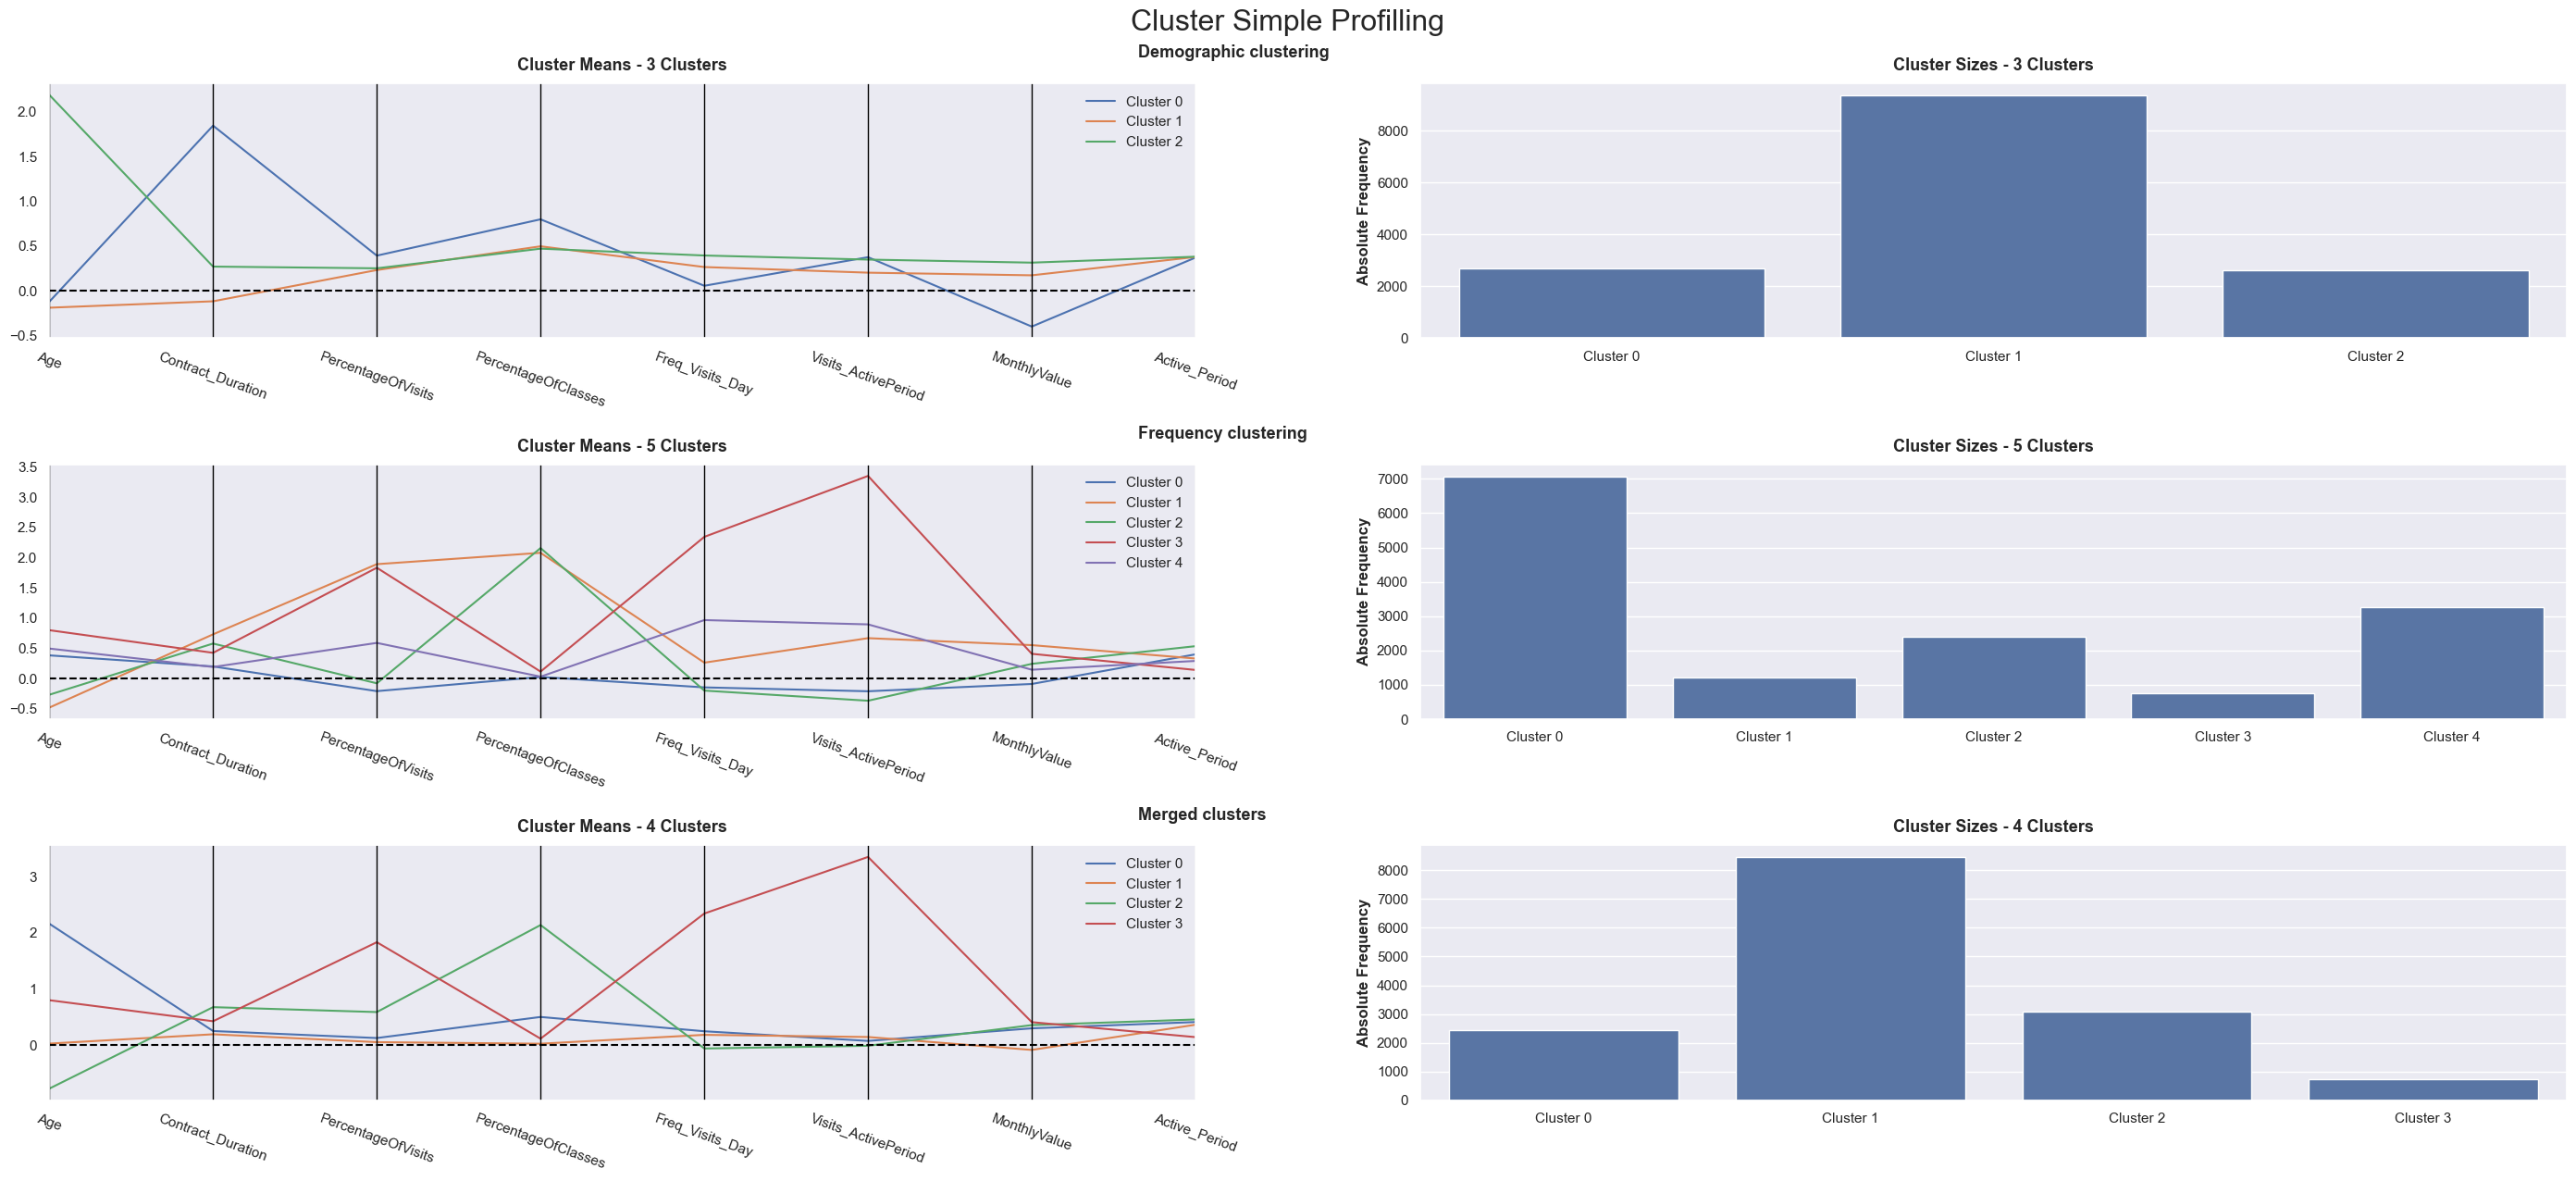

In [37]:

# Profilling each cluster (product, behavior, merged)
cluster_profiles(
    df = df[metric_features + ['demographic_labels', 'frequency_labels', 'merged_labels']], 
    label_columns = ['demographic_labels', 'frequency_labels', 'merged_labels'], 
    figsize = (28, 13), 
    compar_titles = ["Demographic clustering", "Frequency clustering", "Merged clusters"]
)

In [38]:
sst = get_ss(df[metric_features])  
ssw_labels = df[metric_features+ ["merged_labels"]].groupby(by='merged_labels').apply(get_ss) 
ssb = sst - np.sum(ssw_labels)
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.3810


<div class="alert alert-block alert-info">

<a class="anchor" id="10th-bullet">    </a>
### 4.1.5. Categorical Profiling
</div>

The percentage of people who practiced an activity within each group was studied below. This approach was used due to the high inbalanced within the categorical features. Therefore it is possible to have a more clear perception of its distribution.

In [39]:
df_study= df[["merged_labels"] + metric_features].groupby(["merged_labels"]).sum()

In [40]:
df_study[metric_features].apply(lambda col: col/(col.sum())).style.format(precision=2).background_gradient(axis=0)

In [41]:
df_study= df[["merged_labels"] + activities].groupby(["merged_labels"]).sum()

In [42]:
df_study[activities].apply(lambda col: col/(col.sum())).style.format(precision=2).background_gradient(axis=0)

In [43]:
df_study= df[["merged_labels"] + compare].groupby(["merged_labels"]).sum()

In [44]:
df_study[compare].apply(lambda col: col/(col.sum())).style.format(precision=2).background_gradient(axis=0)

### SOM + K-means clustering

### Frequency Perspective

In [45]:
activities = ['AthleticsActivities', 'WaterActivities','FitnessActivities','TeamActivities','RacketActivities','CombatActivities','SpecialActivities','OtherActivities']
compare = ['Dropout', 'Gender_Female', 'UseByTime']

In [46]:
frequency_perspective = [ 'PercentageOfVisits', 'PercentageOfClasses', 'Freq_Visits_Day', 'Visits_ActivePeriod']

In [47]:
#set the random seed for reproducibility
np.random.seed(42)

#build a Self-Organizing Map for frequency data
sm_frequency = sompy.SOMFactory().build(
    data[frequency_perspective].values, #the dataset for training the SOM
    mapsize=[50, 50],  #size of the SOM grid (50x50)
    initialization='random',
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=frequency_perspective #names of the components/features
)
# Training the SOM
sm_frequency.train(n_job=-1, verbose='info', train_rough_len=50, train_finetune_len=50)

 Training...
 random_initialization took: 0.001000 seconds
 Rough training...
 radius_ini: 17.000000 , radius_final: 2.833333, trainlen: 50



 epoch: 1 ---> elapsed time:  6.065000, quantization error: 0.686526

 epoch: 2 ---> elapsed time:  5.896000, quantization error: 1.710097

 epoch: 3 ---> elapsed time:  7.514000, quantization error: 1.680330

 epoch: 4 ---> elapsed time:  7.717000, quantization error: 1.674811

 epoch: 5 ---> elapsed time:  7.353000, quantization error: 1.671094

 epoch: 6 ---> elapsed time:  6.930000, quantization error: 1.667543

 epoch: 7 ---> elapsed time:  7.402000, quantization error: 1.655841

 epoch: 8 ---> elapsed time:  7.751000, quantization error: 1.652650

 epoch: 9 ---> elapsed time:  7.898000, quantization error: 1.649663

 epoch: 10 ---> elapsed time:  7.552000, quantization error: 1.646430

 epoch: 11 ---> elapsed time:  7.152000, quantization error: 1.642443

 epoch: 12 ---> elapsed time:  6.725000, quantization error: 1.637962

 epoch: 13 ---> elapsed time:  6.468000, quantization error: 1.633936

 epoch: 14 ---> elapsed time:  7.051000, quantization error: 1.629860

 epoch: 15 --->

In [48]:
#iterate over each cluster number from 2 to 10
range_clusters = range(2, 10)

inertia = []
for n_clus in range_clusters:  
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=20, random_state=1)
    #fit the KMeans model to the data
    kmclust.fit(data[frequency_perspective])
    #append the inertia (sum of squared distances to the closest cluster center) of the current model to the inertia list
    inertia.append(kmclust.inertia_)  

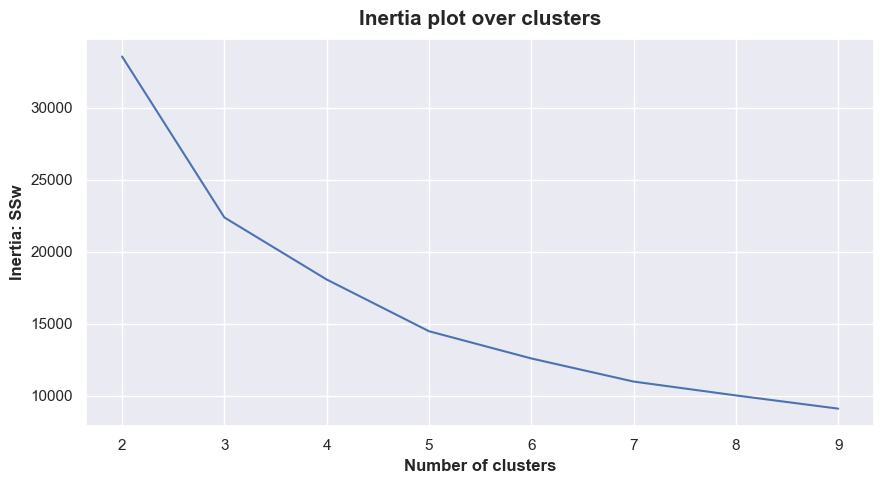

In [49]:
#perform inertia plot
plt.figure(figsize=(9,5))
plt.plot(range_clusters, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

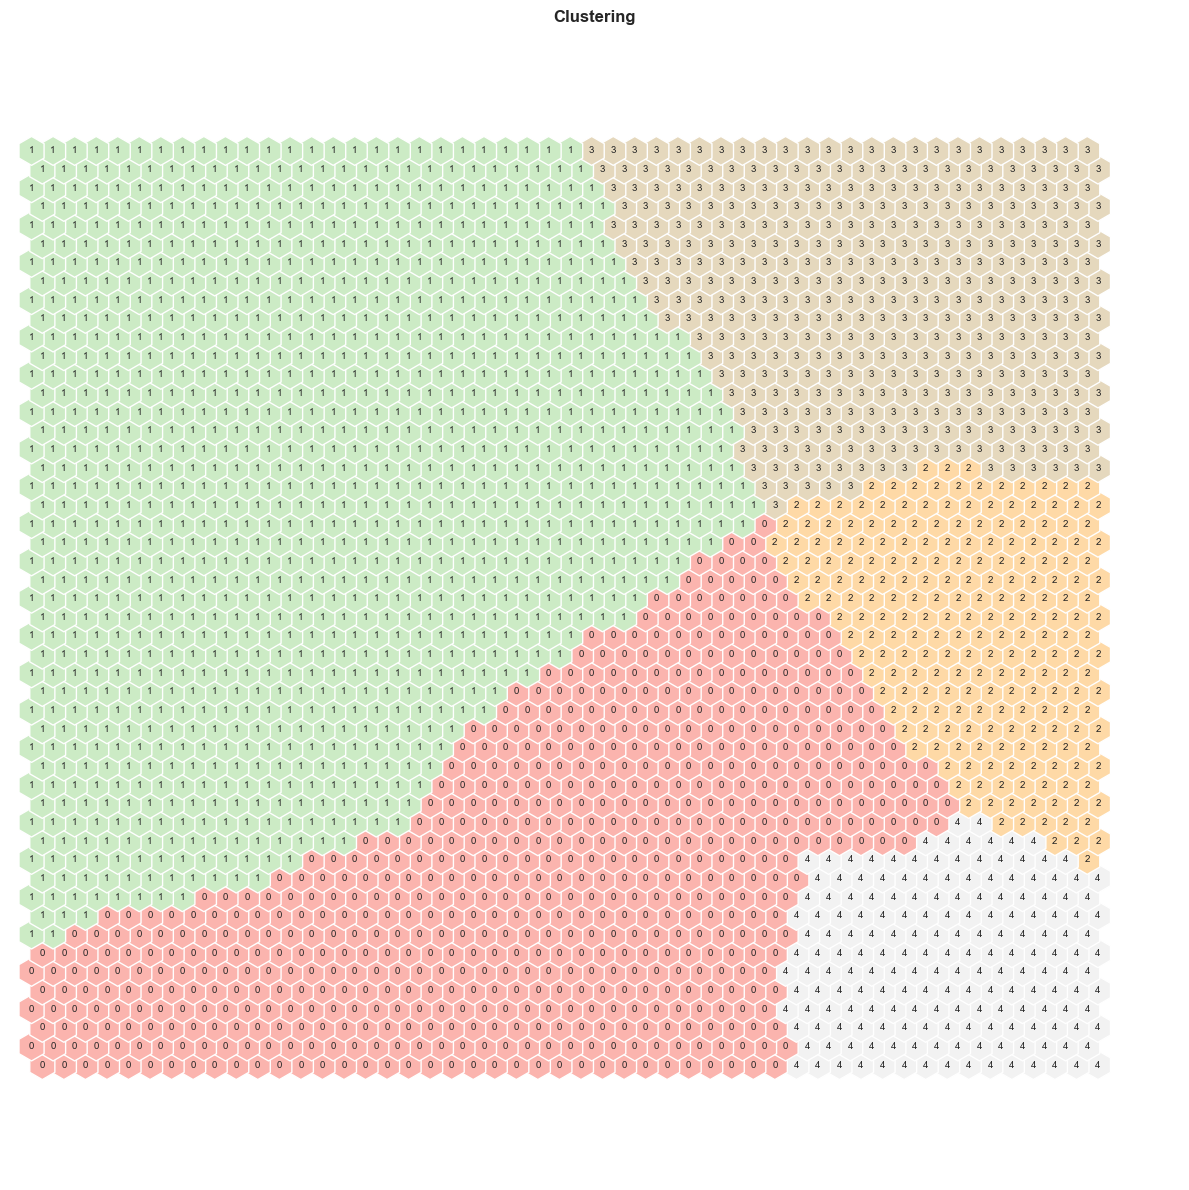

In [50]:
#performing K-Means clustering on top of SOM
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=20, random_state=42)
nodeclus_labels = kmeans.fit_predict(sm_frequency.codebook.matrix)
sm_frequency.cluster_labels = nodeclus_labels 

hits = HitMapView(12, 12,"Clustering", text_size=10)
hits.show(sm_frequency, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

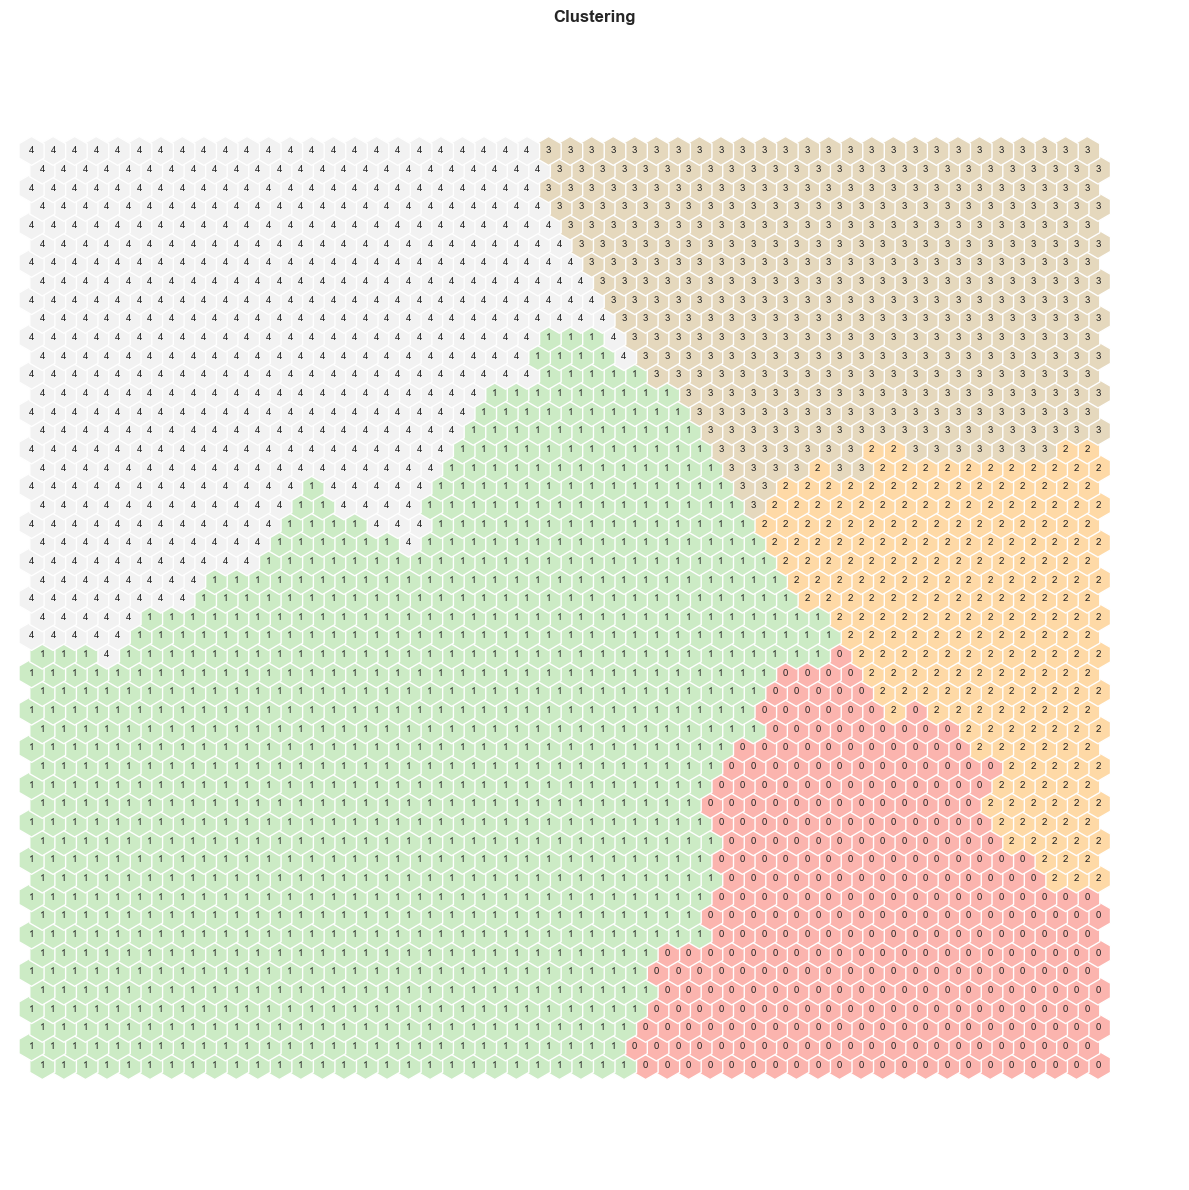

In [51]:
hierclust = AgglomerativeClustering(n_clusters=5, linkage='ward')
nodeclus_labels = hierclust.fit_predict(sm_frequency.codebook.matrix)
sm_frequency.cluster_labels = nodeclus_labels  #setting the cluster labels of sompy

hits  = HitMapView(12, 12,"Clustering",text_size=10)
hits.show(sm_frequency, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [52]:
nodes = sm_frequency.codebook.matrix

df_nodes = pd.DataFrame(nodes, columns=frequency_perspective)
df_nodes['label_freq'] = nodeclus_labels
df_nodes

PercentageOfVisits  PercentageOfClasses  Freq_Visits_Day  \
0              -0.890385             2.031913        -1.001091   
1              -0.888510             1.981731        -0.940172   
2              -0.887275             1.946546        -0.862265   
3              -0.886516             1.942359        -0.771297   
4              -0.885969             1.954230        -0.670561   
...                  ...                  ...              ...   
2495           -0.086326            -0.570488         1.748237   
2496           -0.107861            -0.572247         1.982456   
2497           -0.126287            -0.567286         2.264069   
2498           -0.192139            -0.548988         2.654953   
2499           -0.304897            -0.563585         3.153803   

      Visits_ActivePeriod  label_freq  
0               -0.829927           3  
1               -0.828939           3  
2               -0.828343           3  
3               -0.827969           3  
4               -0.827660           3  
...                   ...         ...  
2495             0.064112           1  
2496             0.025556           1  
2497            -0.006695           1  
2498            -0.074511           1  
2499            -0.195371           1  

[2500 rows x 5 columns]

In [53]:
#find the Best Matching Units (BMUs) for each data point using the trained SOM
bmus_map = sm_frequency.find_bmu(data[frequency_perspective])[0] 
df_bmus_freq = pd.DataFrame(
    np.concatenate((data, np.expand_dims(bmus_map,1)), axis=1),
    index=data.index, columns=np.append(data.columns,"BMU_freq")
)
df_bmus_freq

Age  UseByTime  AthleticsActivities  WaterActivities  \
ID                                                                 
10000  3.083333        0.0                  0.0              0.0   
10001  0.500000        0.0                  0.0              0.0   
10002  0.000000        0.0                  0.0              0.0   
10003 -1.166667        0.0                  0.0              0.0   
10004  1.000000        0.0                  0.0              0.0   
...         ...        ...                  ...              ...   
24937 -0.750000        0.0                  0.0              1.0   
24938  1.333333        0.0                  0.0              0.0   
24939 -0.250000        0.0                  0.0              0.0   
24940  2.666667        0.0                  0.0              1.0   
24941  0.750000        0.0                  0.0              0.0   

       FitnessActivities  TeamActivities  RacketActivities  CombatActivities  \
ID                                                                             
10000                1.0             0.0               0.0               0.0   
10001                0.0             0.0               0.0               0.0   
10002                1.0             0.0               0.0               0.0   
10003                0.0             1.0               0.0               0.0   
10004                1.0             0.0               0.0               0.0   
...                  ...             ...               ...               ...   
24937                0.0             0.0               0.0               0.0   
24938                0.0             0.0               0.0               1.0   
24939                1.0             0.0               0.0               0.0   
24940                0.0             0.0               0.0               0.0   
24941                1.0             0.0               0.0               0.0   

       SpecialActivities  OtherActivities  ...  Contract_Duration  \
ID                                         ...                      
10000                0.0              0.0  ...          -0.490868   
10001                1.0              0.0  ...           0.285388   
10002                0.0              0.0  ...          -0.554795   
10003                0.0              0.0  ...          -0.257991   
10004                0.0              0.0  ...           1.152968   
...                  ...              ...  ...                ...   
24937                0.0              0.0  ...           1.997717   
24938                0.0              0.0  ...          -0.027397   
24939                0.0              0.0  ...          -0.554795   
24940                0.0              0.0  ...           0.767123   
24941                0.0              0.0  ...           2.038813   

       PercentageOfVisits  MonthlyValue  PercentageOfClasses  Freq_Visits_Day  \
ID                                                                              
10000                1.15      3.017065             1.866571         0.763419   
10001               -0.20      0.607509             0.104392        -0.204771   
10002                0.50      0.493905             0.000000         1.208748   
10003                0.35      0.176012             0.239981         0.463221   
10004               -0.50     -0.611409             0.000000        -0.255467   
...                   ...           ...                  ...              ...   
24937                0.65      0.585080             2.056875         0.190855   
24938               -0.25      0.756216             0.000000         1.391650   
24939                0.85      0.786446             0.000000         1.208748   
24940                1.70      0.684544             2.010559         2.240557   
24941                0.55     -0.127743             0.014159         0.661034   

       Visits_ActivePeriod  Gender_Female  frequency_labels  \
ID                                                            
10000   

In [54]:
df_final = df_bmus_freq.merge(df_nodes['label_freq'], 'left', left_on="BMU_freq", right_index=True)
df_final

Age  UseByTime  AthleticsActivities  WaterActivities  \
ID                                                                 
10000  3.083333        0.0                  0.0              0.0   
10001  0.500000        0.0                  0.0              0.0   
10002  0.000000        0.0                  0.0              0.0   
10003 -1.166667        0.0                  0.0              0.0   
10004  1.000000        0.0                  0.0              0.0   
...         ...        ...                  ...              ...   
24937 -0.750000        0.0                  0.0              1.0   
24938  1.333333        0.0                  0.0              0.0   
24939 -0.250000        0.0                  0.0              0.0   
24940  2.666667        0.0                  0.0              1.0   
24941  0.750000        0.0                  0.0              0.0   

       FitnessActivities  TeamActivities  RacketActivities  CombatActivities  \
ID                                                                             
10000                1.0             0.0               0.0               0.0   
10001                0.0             0.0               0.0               0.0   
10002                1.0             0.0               0.0               0.0   
10003                0.0             1.0               0.0               0.0   
10004                1.0             0.0               0.0               0.0   
...                  ...             ...               ...               ...   
24937                0.0             0.0               0.0               0.0   
24938                0.0             0.0               0.0               1.0   
24939                1.0             0.0               0.0               0.0   
24940                0.0             0.0               0.0               0.0   
24941                1.0             0.0               0.0               0.0   

       SpecialActivities  OtherActivities  ...  PercentageOfVisits  \
ID                                         ...                       
10000                0.0              0.0  ...                1.15   
10001                1.0              0.0  ...               -0.20   
10002                0.0              0.0  ...                0.50   
10003                0.0              0.0  ...                0.35   
10004                0.0              0.0  ...               -0.50   
...                  ...              ...  ...                 ...   
24937                0.0              0.0  ...                0.65   
24938                0.0              0.0  ...               -0.25   
24939                0.0              0.0  ...                0.85   
24940                0.0              0.0  ...                1.70   
24941                0.0              0.0  ...                0.55   

       MonthlyValue  PercentageOfClasses  Freq_Visits_Day  \
ID                                                          
10000      3.017065             1.866571         0.763419   
10001      0.607509             0.104392        -0.204771   
10002      0.493905             0.000000         1.208748   
10003      0.176012             0.239981         0.463221   
10004     -0.611409             0.000000        -0.255467   
...             ...                  ...              ...   
24937      0.585080             2.056875         0.190855   
24938      0.756216             0.000000         1.391650   
24939      0.786446             0.000000         1.208748   
24940      0.684544             2.010559         2.240557   
24941     -0.127743             0.014159         0.661034   

       Visits_ActivePeriod  Gender_Female  frequency_labels  \
ID                                                            
10000            -0.201465            1.0               1.0   
10001            -0.501832            1.0               0.0   
10002             0.619048            0.0               4.0   
10003            -0.300366            0.0               0.0   
100

In [55]:
#check cluster average according to the different frequency perspective variables
cluster_means = df_final.groupby('label_freq').mean()[frequency_perspective].T
cluster_means.style.format(precision=2).background_gradient(axis=1)

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


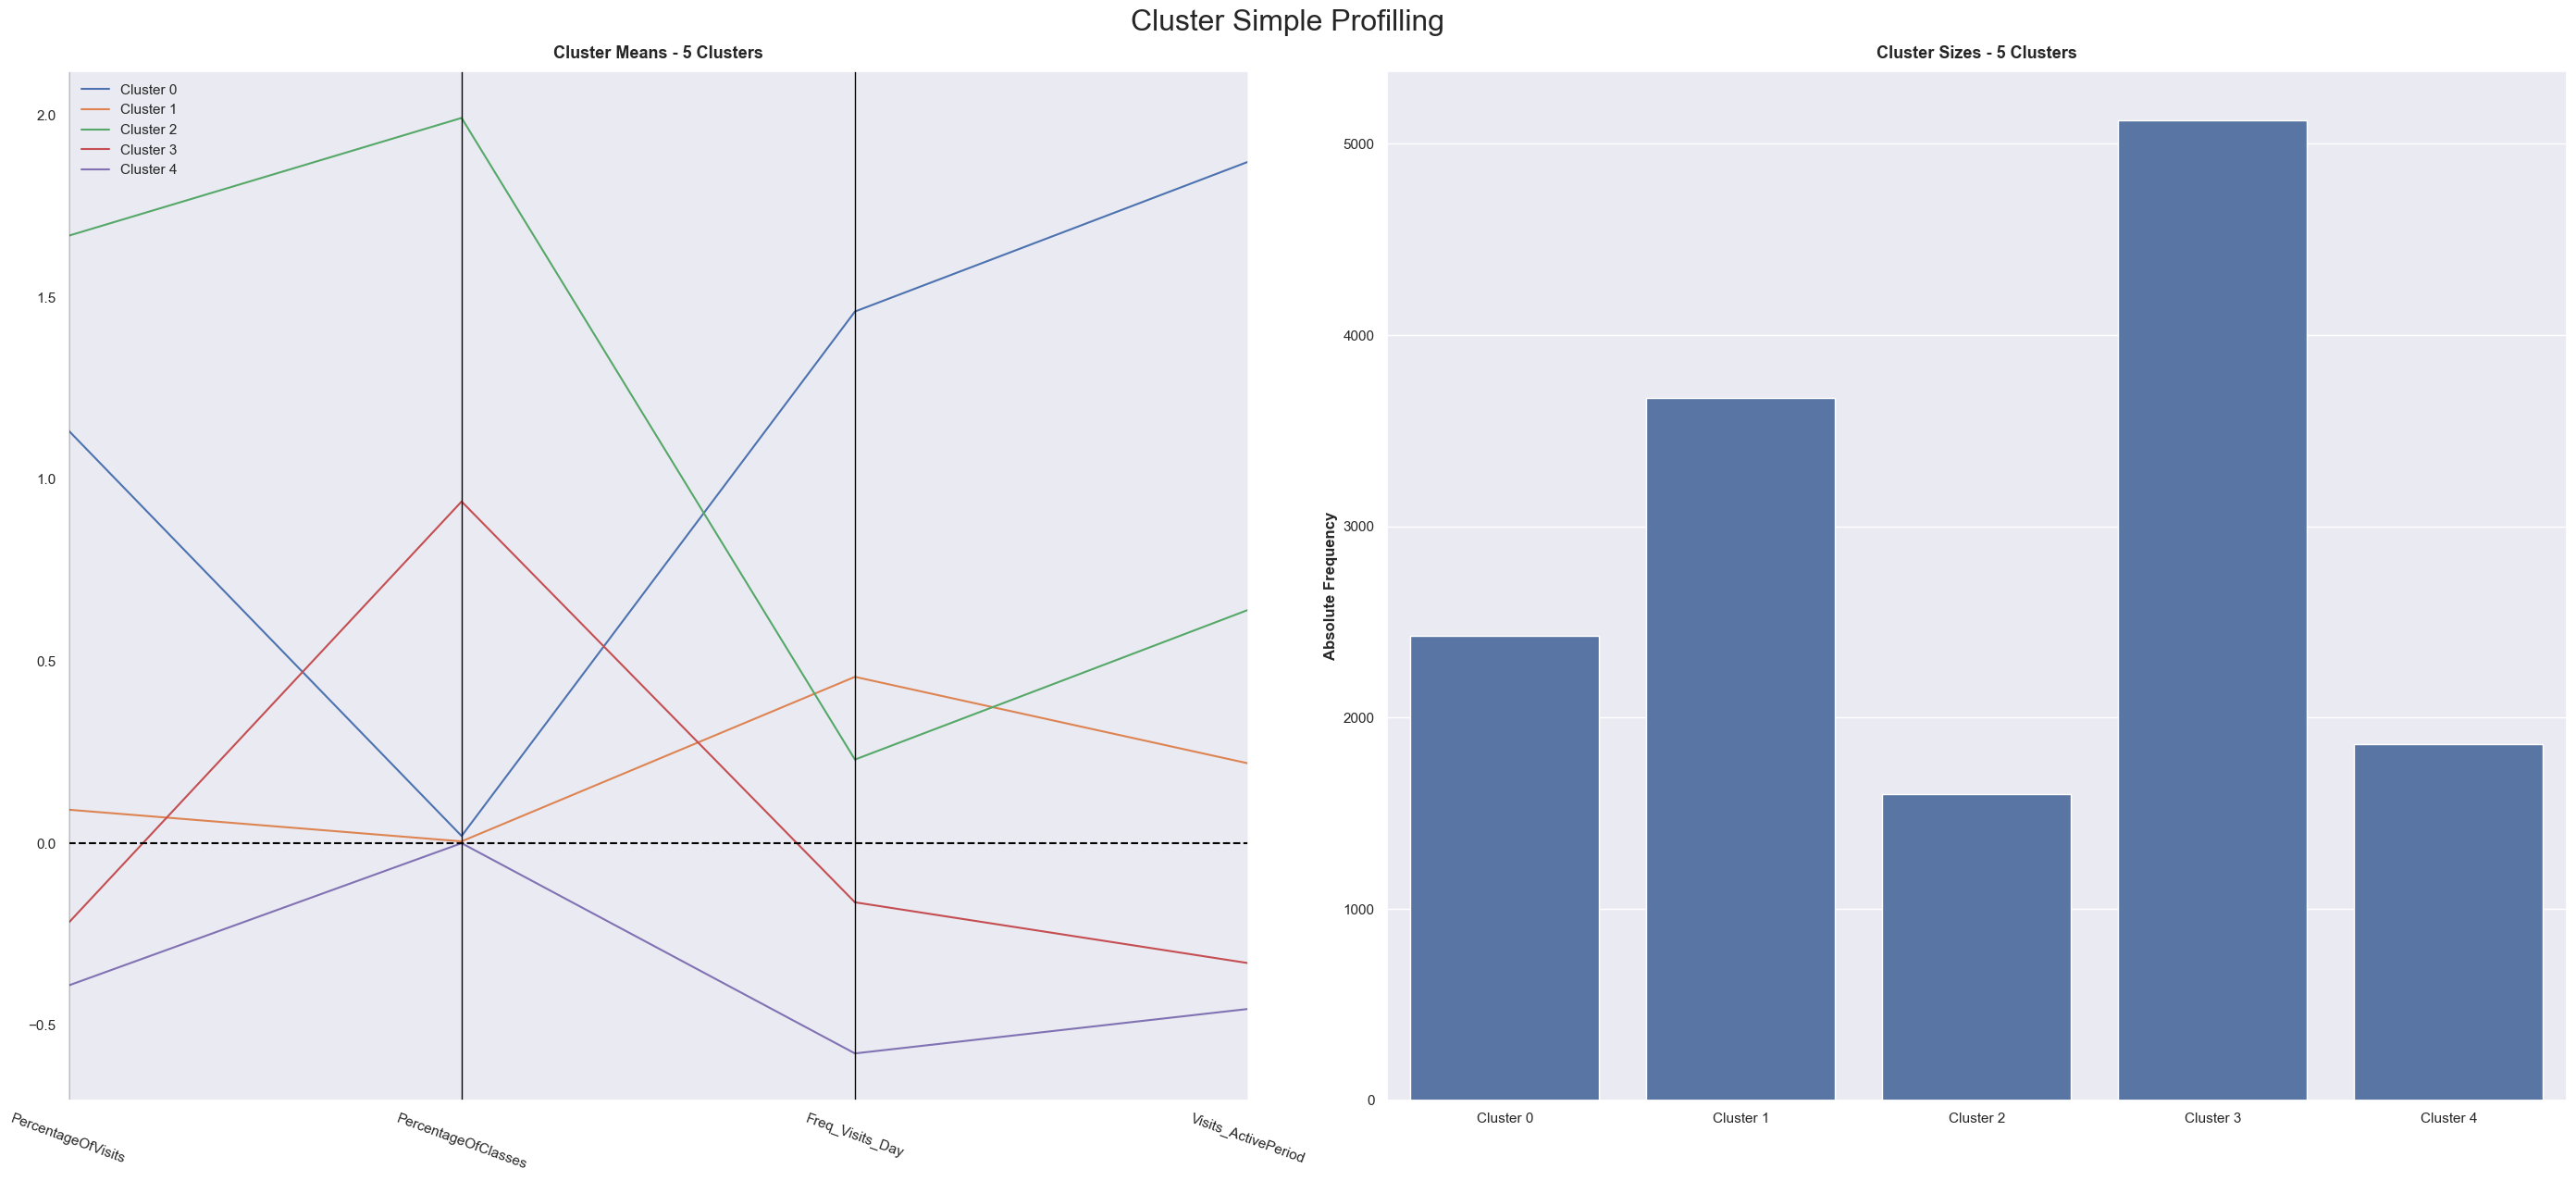

In [56]:
#Check clustering results
cluster_profiles(
    df = df_final[frequency_perspective + ["label_freq"]], 
    label_columns = ["label_freq"], 
    figsize = (28, 13), 
    compar_titles = [""]
)

### Demographic Perspective

In [57]:
demographic_perspective = ['Age', 'Active_Period', 'MonthlyValue', 'Contract_Duration']
df_demographic = data[demographic_perspective]

In [58]:
#set the random seed for reproducibility
np.random.seed(42)

#build a Self-Organizing Map for demographic data
sm_demographic = sompy.SOMFactory().build(
    data[demographic_perspective].values, #the dataset for training the SOM
    mapsize=[50, 50],                     #size of the SOM grid (50x50)
    initialization='random',
    neighborhood='gaussian',              
    training='batch',
    lattice='hexa',
    component_names=demographic_perspective #names of the components/features
)

# Training the SOM
sm_demographic.train(
    n_job=-1,
    verbose='info',
    train_rough_len=50,
    train_finetune_len=50
)


 Training...
 random_initialization took: 0.000000 seconds
 Rough training...
 radius_ini: 17.000000 , radius_final: 2.833333, trainlen: 50

 epoch: 1 ---> elapsed time:  7.137000, quantization error: 0.653477

 epoch: 2 ---> elapsed time:  7.603000, quantization error: 1.823122

 epoch: 3 ---> elapsed time:  7.531000, quantization error: 1.796397

 epoch: 4 ---> elapsed time:  7.621000, quantization error: 1.792374

 epoch: 5 ---> elapsed time:  7.569000, quantization error: 1.790255

 epoch: 6 ---> elapsed time:  7.922000, quantization error: 1.788063

 epoch: 7 ---> elapsed time:  7.513000, quantization error: 1.785411

 epoch: 8 ---> elapsed time:  7.476000, quantization error: 1.781950

 epoch: 9 ---> elapsed time:  8.035000, quantization error: 1.777600

 epoch: 10 ---> elapsed time:  7.375000, quantization error: 1.773093

 epoch: 11 ---> elapsed time:  7.159000, quantization error: 1.768965

 epoch: 12 ---> elapsed time:  7.495000, quantization error: 1.764819

 epoch: 13 ---> 

In [59]:
range_clusters = range(2, 10)

inertia = []

#iterate over each cluster number in the specified range
for n_clus in range_clusters:
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=20, random_state=1)
    #fit the KMeans model to the data
    kmclust.fit(data[demographic_perspective])

    #append the inertia (sum of squared distances to the closest cluster center) of the current model to the inertia list
    inertia.append(kmclust.inertia_)


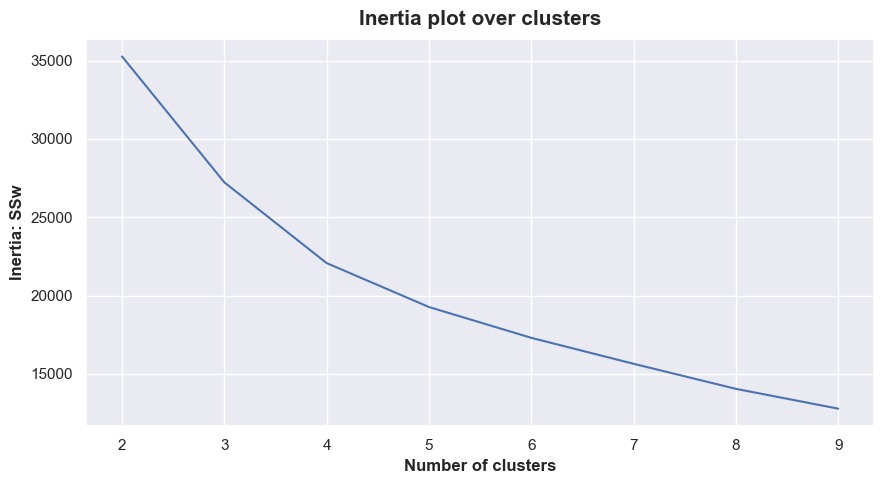

In [60]:
plt.figure(figsize=(9,5))
plt.plot(range_clusters, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

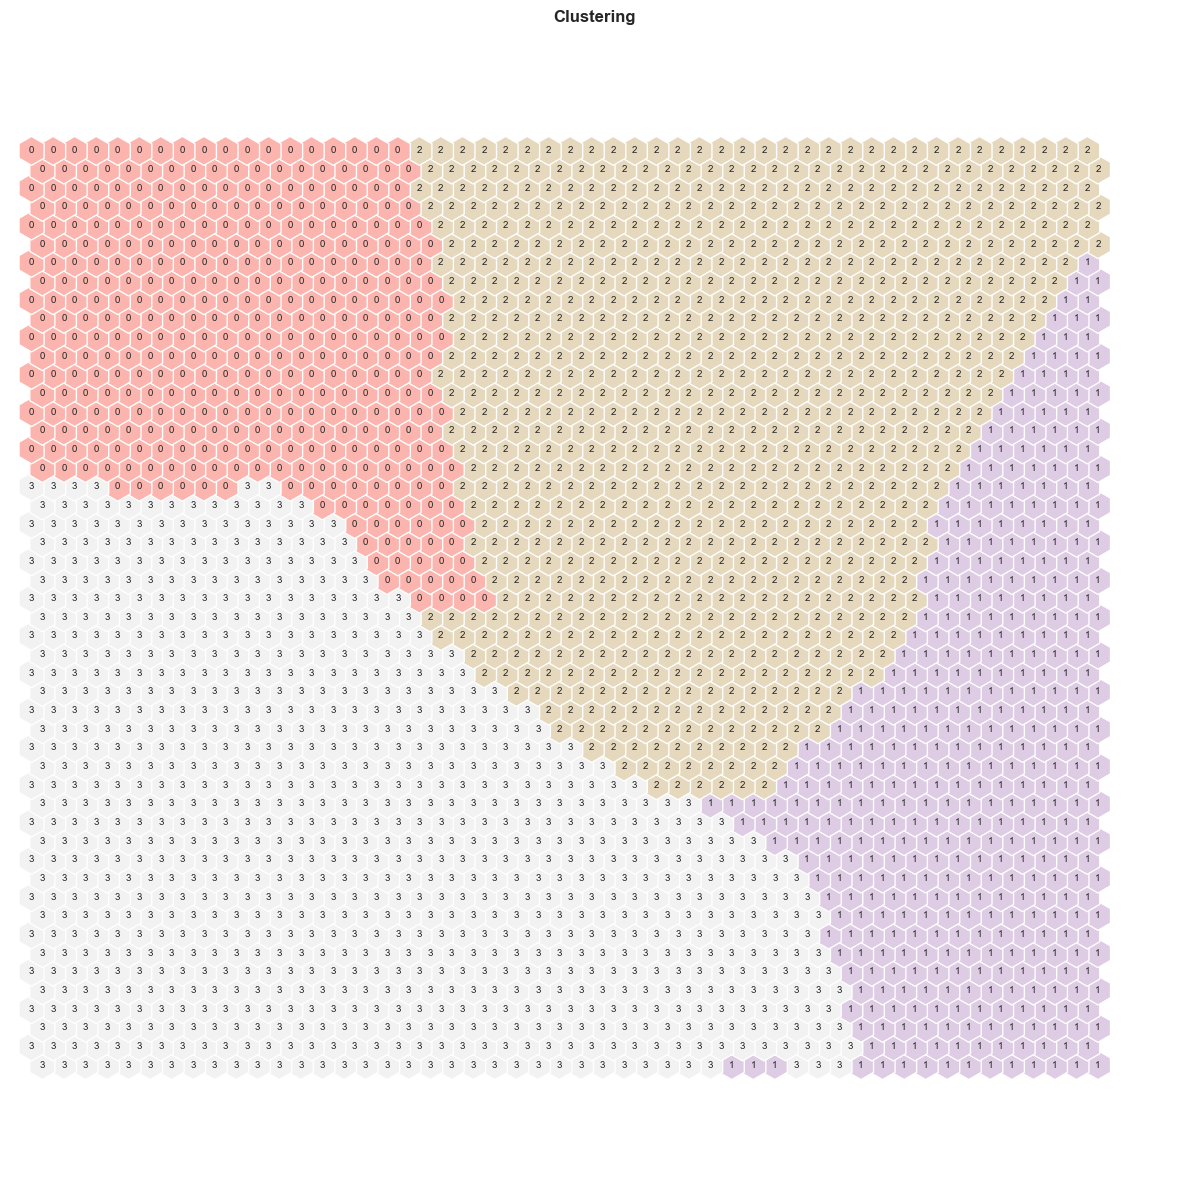

In [61]:
#perform K-Means clustering on top of the sm.get_node_vectors() output
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=20, random_state=42)
nodeclus_labels = kmeans.fit_predict(sm_demographic.codebook.matrix)
sm_demographic.cluster_labels = nodeclus_labels

#hitmap to show cluster distribution
hits = HitMapView(12, 12,"Clustering", text_size=10)
hits.show(sm_demographic, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

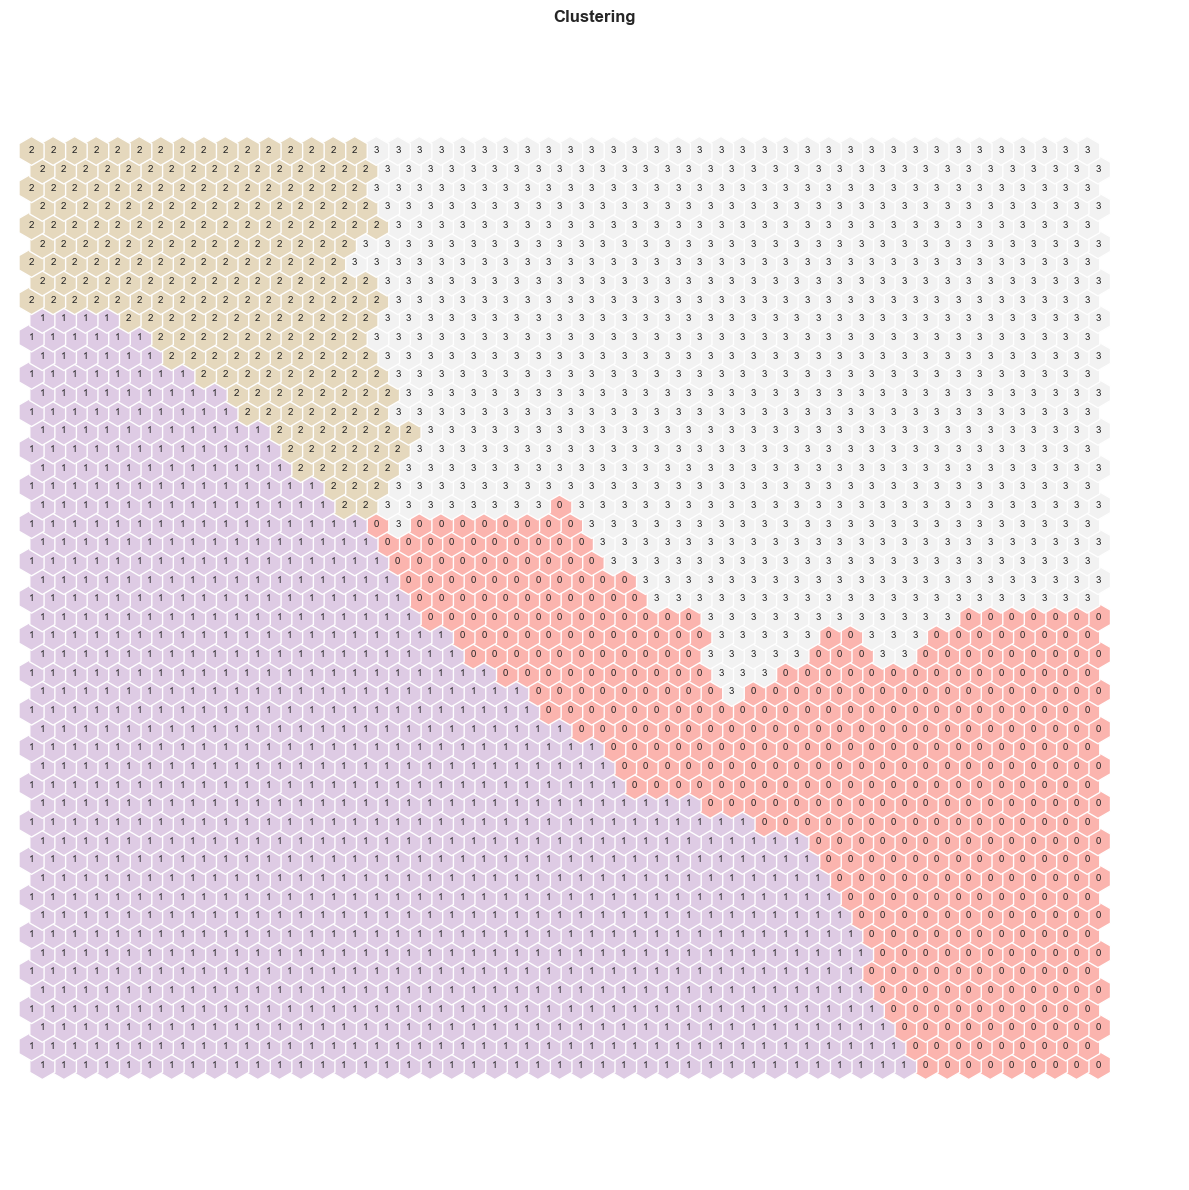

In [62]:
#perform hierarchical clustering on top of SOM

hierclust = AgglomerativeClustering(n_clusters=4, linkage='ward')
nodeclus_labels = hierclust.fit_predict(sm_demographic.codebook.matrix)
sm_demographic.cluster_labels = nodeclus_labels  

#hitmap to show cluster distribution
hits  = HitMapView(12, 12,"Clustering",text_size=10)
hits.show(sm_demographic, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [63]:
#extract the codebook matrix from the trained SOM model - this matrix contains the weight vectors of the nodes (neurons) in the SOM
nodes = sm_demographic.codebook.matrix

df_nodes = pd.DataFrame(nodes, columns=demographic_perspective)

#this column will be filled with cluster labels for each node
df_nodes['label_demographic'] = nodeclus_labels
df_nodes

Age  Active_Period  MonthlyValue  Contract_Duration  \
0    -1.618947      -0.728054      0.528095           0.107113   
1    -1.611003      -0.727551      0.399548          -0.013664   
2    -1.600800      -0.728641      0.258732          -0.175332   
3    -1.575856      -0.727851      0.112946          -0.303542   
4    -1.499738      -0.728316     -0.015022          -0.155163   
...        ...            ...           ...                ...   
2495 -0.908978       1.170259      0.888292          -0.349172   
2496 -1.047935       1.169110      0.787236          -0.258351   
2497 -1.272191       1.168262      0.716365          -0.271780   
2498 -1.466914       1.167794      0.705434          -0.304239   
2499 -1.576577       1.167503      0.772965          -0.303014   

      label_demographic  
0                     3  
1                     3  
2                     3  
3                     3  
4                     3  
...                 ...  
2495                  1  
2496                  1  
2497                  1  
2498                  1  
2499                  1  

[2500 rows x 5 columns]

In [64]:
#find the Best Matching Units (BMUs) for each data point using the trained SOM
bmus_map = sm_demographic.find_bmu(data[demographic_perspective])[0]

#create a DataFrame from the BMUs
df_bmus_demographic = pd.DataFrame(
    np.concatenate((df_final, np.expand_dims(bmus_map, 1)), axis=1),
    index=data.index, 
    columns=np.append(df_final.columns, "BMU_demographic")
)

df_bmus_demographic


Age  UseByTime  AthleticsActivities  WaterActivities  \
ID                                                                 
10000  3.083333        0.0                  0.0              0.0   
10001  0.500000        0.0                  0.0              0.0   
10002  0.000000        0.0                  0.0              0.0   
10003 -1.166667        0.0                  0.0              0.0   
10004  1.000000        0.0                  0.0              0.0   
...         ...        ...                  ...              ...   
24937 -0.750000        0.0                  0.0              1.0   
24938  1.333333        0.0                  0.0              0.0   
24939 -0.250000        0.0                  0.0              0.0   
24940  2.666667        0.0                  0.0              1.0   
24941  0.750000        0.0                  0.0              0.0   

       FitnessActivities  TeamActivities  RacketActivities  CombatActivities  \
ID                                                                             
10000                1.0             0.0               0.0               0.0   
10001                0.0             0.0               0.0               0.0   
10002                1.0             0.0               0.0               0.0   
10003                0.0             1.0               0.0               0.0   
10004                1.0             0.0               0.0               0.0   
...                  ...             ...               ...               ...   
24937                0.0             0.0               0.0               0.0   
24938                0.0             0.0               0.0               1.0   
24939                1.0             0.0               0.0               0.0   
24940                0.0             0.0               0.0               0.0   
24941                1.0             0.0               0.0               0.0   

       SpecialActivities  OtherActivities  ...  MonthlyValue  \
ID                                         ...                 
10000                0.0              0.0  ...      3.017065   
10001                1.0              0.0  ...      0.607509   
10002                0.0              0.0  ...      0.493905   
10003                0.0              0.0  ...      0.176012   
10004                0.0              0.0  ...     -0.611409   
...                  ...              ...  ...           ...   
24937                0.0              0.0  ...      0.585080   
24938                0.0              0.0  ...      0.756216   
24939                0.0              0.0  ...      0.786446   
24940                0.0              0.0  ...      0.684544   
24941                0.0              0.0  ...     -0.127743   

       PercentageOfClasses  Freq_Visits_Day  Visits_ActivePeriod  \
ID                                                                 
10000             1.866571         0.763419            -0.201465   
10001             0.104392        -0.204771            -0.501832   
10002             0.000000         1.208748             0.619048   
10003             0.239981         0.463221            -0.300366   
10004             0.000000        -0.255467            -0.600733   
...                    ...              ...                  ...   
24937             2.056875         0.190855             1.000000   
24938             0.000000         1.391650             0.007326   
24939             0.000000         1.208748             1.025641   
24940             2.010559         2.240557             0.802198   
24941             0.014159         0.661034             2.043956   

       Gender_Female  frequency_labels  demographic_labels  BMU_freq  \
ID                                                                     
10000            1.0               1.0                 2.0     957.0   
10001            1.0               0.0                 1.0     571.0   
10002            0.0               4.0                 1.0    2270.0   
10003   

In [65]:
#merge 'df_bmus_demographic' with the 'label_demographic' column from 'df_nodes' 
df_final = df_bmus_demographic.merge(df_nodes['label_demographic'], 'left', left_on="BMU_demographic", right_index=True)
df_final

Age  UseByTime  AthleticsActivities  WaterActivities  \
ID                                                                 
10000  3.083333        0.0                  0.0              0.0   
10001  0.500000        0.0                  0.0              0.0   
10002  0.000000        0.0                  0.0              0.0   
10003 -1.166667        0.0                  0.0              0.0   
10004  1.000000        0.0                  0.0              0.0   
...         ...        ...                  ...              ...   
24937 -0.750000        0.0                  0.0              1.0   
24938  1.333333        0.0                  0.0              0.0   
24939 -0.250000        0.0                  0.0              0.0   
24940  2.666667        0.0                  0.0              1.0   
24941  0.750000        0.0                  0.0              0.0   

       FitnessActivities  TeamActivities  RacketActivities  CombatActivities  \
ID                                                                             
10000                1.0             0.0               0.0               0.0   
10001                0.0             0.0               0.0               0.0   
10002                1.0             0.0               0.0               0.0   
10003                0.0             1.0               0.0               0.0   
10004                1.0             0.0               0.0               0.0   
...                  ...             ...               ...               ...   
24937                0.0             0.0               0.0               0.0   
24938                0.0             0.0               0.0               1.0   
24939                1.0             0.0               0.0               0.0   
24940                0.0             0.0               0.0               0.0   
24941                1.0             0.0               0.0               0.0   

       SpecialActivities  OtherActivities  ...  PercentageOfClasses  \
ID                                         ...                        
10000                0.0              0.0  ...             1.866571   
10001                1.0              0.0  ...             0.104392   
10002                0.0              0.0  ...             0.000000   
10003                0.0              0.0  ...             0.239981   
10004                0.0              0.0  ...             0.000000   
...                  ...              ...  ...                  ...   
24937                0.0              0.0  ...             2.056875   
24938                0.0              0.0  ...             0.000000   
24939                0.0              0.0  ...             0.000000   
24940                0.0              0.0  ...             2.010559   
24941                0.0              0.0  ...             0.014159   

       Freq_Visits_Day  Visits_ActivePeriod  Gender_Female  frequency_labels  \
ID                                                                             
10000         0.763419            -0.201465            1.0               1.0   
10001        -0.204771            -0.501832            1.0               0.0   
10002         1.208748             0.619048            0.0               4.0   
10003         0.463221            -0.300366            0.0               0.0   
10004        -0.255467            -0.600733            0.0               0.0   
...                ...                  ...            ...               ...   
24937         0.190855             1.000000            0.0               1.0   
24938         1.391650             0.007326            0.0               4.0   
24939         1.208748             1.025641            0.0               4.0   
24940         2.240557             0.802198            0.0               1.0   
24941         0.661034             2.043956            1.0               4.0   

       demographic_labels  BMU_freq  label_freq  BMU_demographic  \
ID                                                   

In [66]:
cluster_means = df_final.groupby('label_demographic').mean()[demographic_perspective].T
cluster_means.style.format(precision=2).background_gradient(axis=1)

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


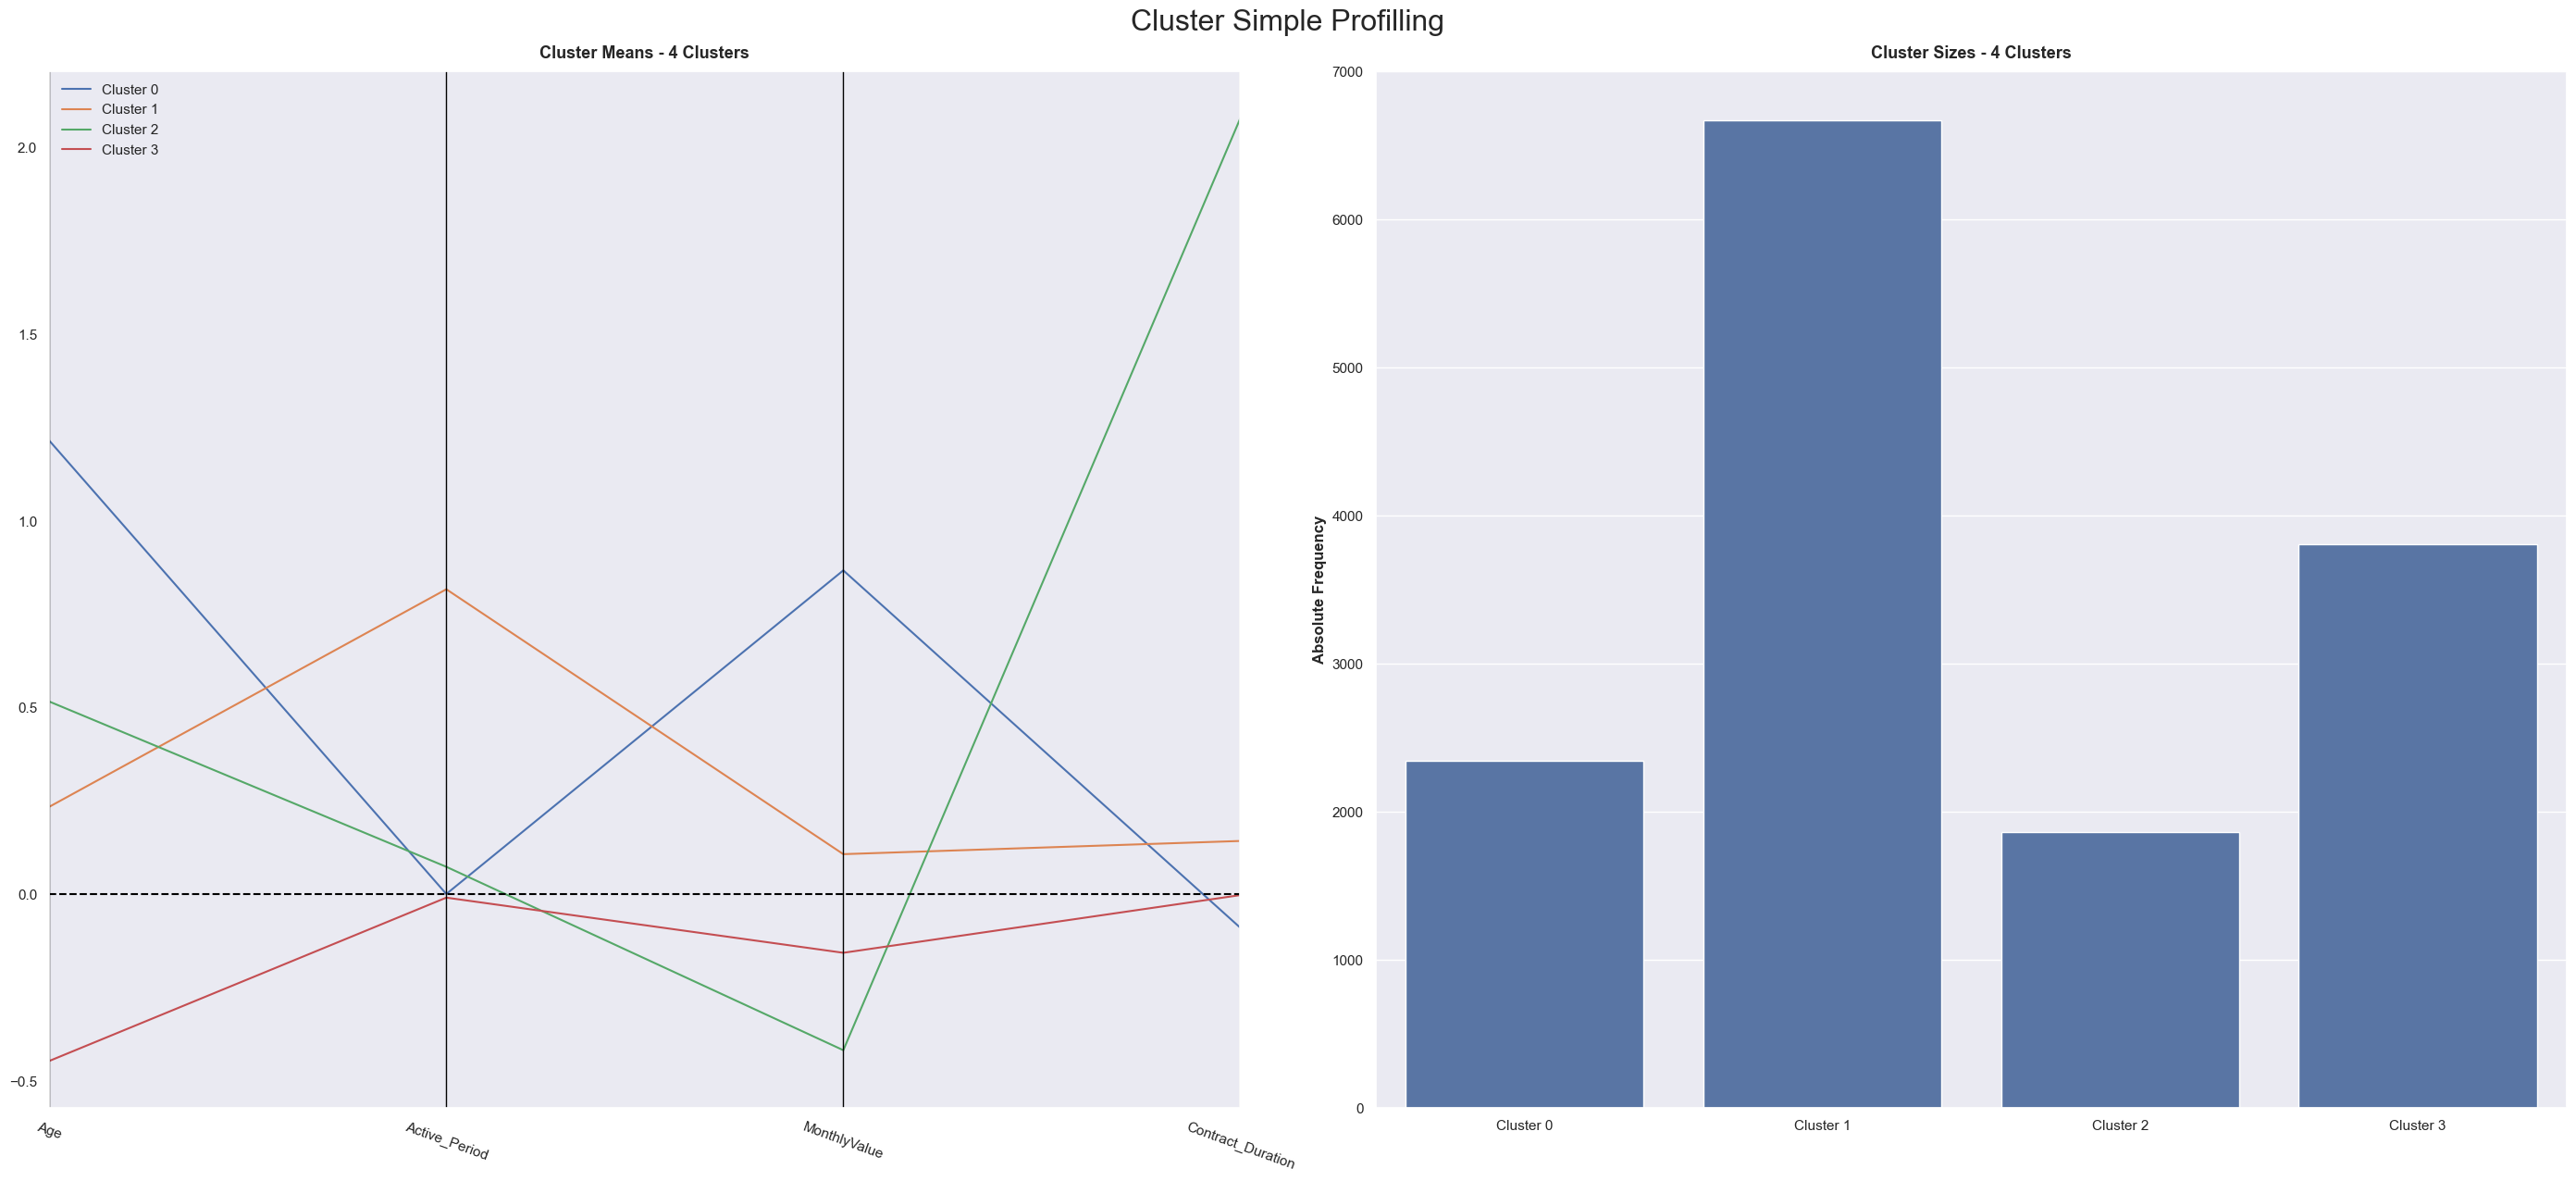

In [67]:
#Check clustering results
cluster_profiles(
    df = df_final[demographic_perspective + ["label_demographic"]], 
    label_columns = ["label_demographic"], 
    figsize = (28, 13), 
    compar_titles = [""]
)

### Merge Perspectives

In [68]:
metric_features = ['Age','Contract_Duration', 'PercentageOfVisits', 'PercentageOfClasses', 'Freq_Visits_Day', 'Visits_ActivePeriod']

In [69]:
#check more and less common clusters
pd.crosstab(df_final['label_freq'],
            df_final['label_demographic'])

label_demographic    0     1    2     3
label_freq                             
0.0                623   889  343   574
1.0                625  1559  426  1063
2.0                242   522  338   496
3.0                620  2822  507  1175
4.0                235   876  250   502

In [70]:
df_centroids = df_final.groupby(['label_demographic', 'label_freq'])\
    [metric_features].mean()

to_merge = [(0,4), (0,2), (2,4), (2,2)]


#computing the euclidean distance matrix between the centroids
euclidean = pairwise_distances(df_centroids)
df_dists = pd.DataFrame(
    euclidean, columns=df_centroids.index, index=df_centroids.index
)

#merge each low frequency clustering (source) to the closest cluster (target)
source_target = {}
for clus in to_merge:
    if clus not in source_target.values():
        source_target[clus] = df_dists.loc[clus].sort_values().index[1]

source_target

{(0, 4): (0, 3.0), (0, 2): (1, 2.0), (2, 4): (2, 1.0), (2, 2): (1, 2.0)}

In [71]:
df_ = df_final.copy()

for source, target in source_target.items():
    mask = (df_['label_freq']==source[0]) & (df_['label_demographic']==source[1])
    df_.loc[mask, 'label_freq'] = target[0]
    df_.loc[mask, 'label_demographic'] = target[1]


pd.crosstab(df_['label_freq'],
            df_['label_demographic'])

df = df_.copy()

## Merging using Hierarchical clustering:

In [72]:
#centroids of the concatenated cluster labels
df_centroids = df.groupby(['label_demographic', 'label_freq'])\
    [metric_features].mean()
df_centroids

Age  Contract_Duration  PercentageOfVisits  \
label_demographic label_freq                                                    
0                 0.0         1.322632          -0.068097            1.148154   
                  1.0         1.249600          -0.052296            0.012800   
                  2.0         0.515840          -0.144751            1.773967   
                  3.0         1.249462          -0.136022           -0.242742   
                  4.0         1.470213          -0.062304           -0.426170   
1                 0.0         0.447600           0.027567            1.123678   
                  1.0         0.369735           0.053346            0.050353   
                  2.0        -0.100575           0.394444            1.813793   
                  3.0         0.081886           0.177556           -0.223866   
                  4.0         0.471556           0.160362           -0.421290   
2                 1.0         0.541102           2.131944            0.923848   
                  3.0         0.427679           2.102447           -0.200592   
                  4.0         0.588667           1.795799           -0.349800   
3                 0.0        -0.137776          -0.082176            1.104530   
                  1.0        -0.155613          -0.101715            0.180621   
                  2.0        -1.319220           0.335078            1.483569   
                  3.0        -0.591064           0.020756           -0.205277   
                  4.0        -0.210325          -0.083479           -0.342829   

                              PercentageOfClasses  Freq_Visits_Day  \
label_demographic label_freq                                         
0                 0.0                    0.030884         1.813185   
                  1.0                    0.006927         0.585212   
                  2.0                    1.955544         0.550417   
                  3.0                    0.776956        -0.162002   
                  4.0                    0.000000        -0.552870   
1                 0.0                    0.016176         1.762391   
                  1.0                    0.005062         0.678828   
                  2.0                    1.987280         0.336176   
                  3.0                    0.942679        -0.145344   
                  4.0                    0.000000        -0.564442   
2                 1.0                    0.615795         0.341368   
                  3.0                    1.177857        -0.141904   
                  4.0                    0.000480        -0.614398   
3                 0.0                    0.011662         0.933904   
                  1.0                    0.002802         0.199710   
                  2.0                    2.023724         0.079583   
                  3.0                    0.911999        -0.212106   
                  4.0                    0.000000        -0.593564   

                              Visits_ActivePeriod  
label_demographic label_freq                       
0                 0.0                    2.132386  
                  1.0                    0.221128  
                  2.0                    0.856204  
                  3.0                   -0.275706  
                  4.0                   -0.491061  
1                 0.0                    1.459009  
                  1.0                    0.067353  
                  2.0                    0.239414  
                  3.0                   -0.378860  
                  4.0                   -0.514610  
2                 1.0                    1.232569  
                  3.0                   -0.287188  
                  4.0                   -0.351502  
3                 0.0                    1.780941  
                  1.0                    0.378206  
                  2.0                    0.784104  
                  3.0                   -0.257451  
                  4.0    

In [73]:
#use Hierarchical clustering to merge the concatenated cluster centroids
linkage = 'ward'
hclust = AgglomerativeClustering(
    linkage=linkage, 
    metric='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids)

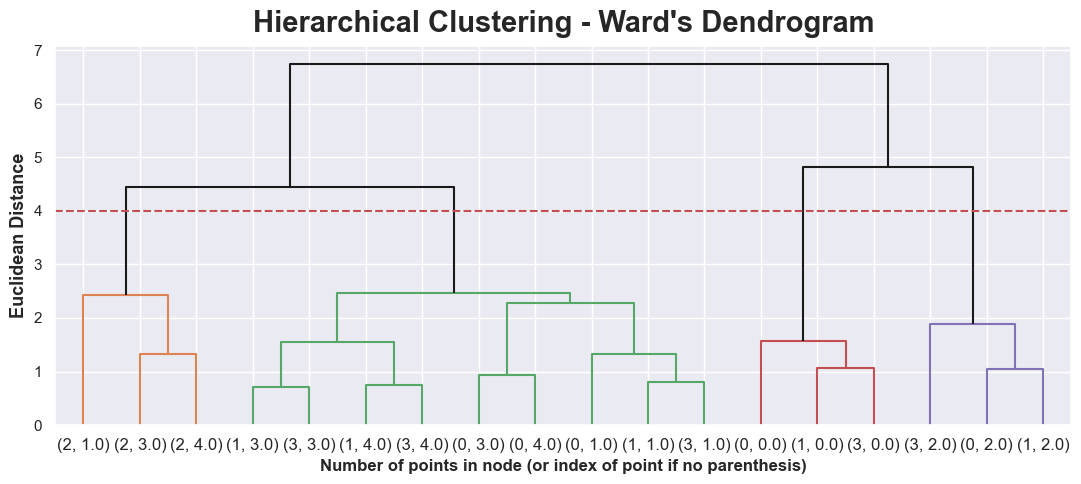

In [74]:
#Code Retrieved from Practical Classes 
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 4
dendrogram(linkage_matrix, 
           truncate_mode='level', 
           labels=df_centroids.index, p=5, 
           color_threshold=y_threshold, 
           above_threshold_color='k')

plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [75]:
hclust = AgglomerativeClustering(
    linkage='ward', 
    metric='euclidean', 
    n_clusters=4
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids 

Age  Contract_Duration  PercentageOfVisits  \
label_demographic label_freq                                                    
0                 0.0         1.322632          -0.068097            1.148154   
                  1.0         1.249600          -0.052296            0.012800   
                  2.0         0.515840          -0.144751            1.773967   
                  3.0         1.249462          -0.136022           -0.242742   
                  4.0         1.470213          -0.062304           -0.426170   
1                 0.0         0.447600           0.027567            1.123678   
                  1.0         0.369735           0.053346            0.050353   
                  2.0        -0.100575           0.394444            1.813793   
                  3.0         0.081886           0.177556           -0.223866   
                  4.0         0.471556           0.160362           -0.421290   
2                 1.0         0.541102           2.131944            0.923848   
                  3.0         0.427679           2.102447           -0.200592   
                  4.0         0.588667           1.795799           -0.349800   
3                 0.0        -0.137776          -0.082176            1.104530   
                  1.0        -0.155613          -0.101715            0.180621   
                  2.0        -1.319220           0.335078            1.483569   
                  3.0        -0.591064           0.020756           -0.205277   
                  4.0        -0.210325          -0.083479           -0.342829   

                              PercentageOfClasses  Freq_Visits_Day  \
label_demographic label_freq                                         
0                 0.0                    0.030884         1.813185   
                  1.0                    0.006927         0.585212   
                  2.0                    1.955544         0.550417   
                  3.0                    0.776956        -0.162002   
                  4.0                    0.000000        -0.552870   
1                 0.0                    0.016176         1.762391   
                  1.0                    0.005062         0.678828   
                  2.0                    1.987280         0.336176   
                  3.0                    0.942679        -0.145344   
                  4.0                    0.000000        -0.564442   
2                 1.0                    0.615795         0.341368   
                  3.0                    1.177857        -0.141904   
                  4.0                    0.000480        -0.614398   
3                 0.0                    0.011662         0.933904   
                  1.0                    0.002802         0.199710   
                  2.0                    2.023724         0.079583   
                  3.0                    0.911999        -0.212106   
                  4.0                    0.000000        -0.593564   

                              Visits_ActivePeriod  hclust_labels  
label_demographic label_freq                                      
0                 0.0                    2.132386              2  
                  1.0                    0.221128              0  
                  2.0                    0.856204              3  
                  3.0                   -0.275706              0  
                  4.0                   -0.491061              0  
1                 0.0                    1.459009              2  
                  1.0                    0.067353              0  
                  2.0                    0.239414              3  
                  3.0                   -0.378860              0  
                  4.0                   -0.514610              0  
2                 1.0                    1.232569              1  
                  3.0                   -0.287188              1  
                  4.0                   -0.351502              1  
3       

In [76]:
cluster_mapper = df_centroids['hclust_labels'].to_dict()

df_ = df.copy()

# map the hierarchical clusters on the centroids to the observations
df_['merged_labels'] = df_.apply(
    lambda row: cluster_mapper[
        (row['label_demographic'], row['label_freq'])
    ], axis=1
)

#merged cluster centroids
df_.groupby('merged_labels')[metric_features].mean()

Age  Contract_Duration  PercentageOfVisits  \
merged_labels                                                    
0              0.227525           0.049320           -0.146275   
1              0.516631           2.078837            0.447183   
2              0.547859          -0.031202            1.125719   
3             -0.461905           0.267515            1.676151   

               PercentageOfClasses  Freq_Visits_Day  Visits_ActivePeriod  
merged_labels                                                             
0                         0.446212        -0.004836            -0.174913  
1                         0.686147         0.081733             0.606746  
2                         0.019327         1.549588             1.748703  
3                         1.995531         0.276316             0.572295

In [77]:
df_counts = df_.groupby('merged_labels')\
    .size()\
    .to_frame()

df_counts = df_counts\
    .rename({v:k for k, v in cluster_mapper.items()})\
    .reset_index()

df_counts['label_demographic'] = df_counts['merged_labels'].apply(lambda x: x[0])
df_counts['label_freq'] = df_counts['merged_labels'].apply(lambda x: x[1])

df_counts.pivot(values=0, index='label_demographic', columns='label_freq')

label_freq            0.0     2.0     4.0
label_demographic                        
2                     NaN     NaN  1864.0
3                  2086.0  1260.0  9477.0

In [78]:
df = df_.copy()

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

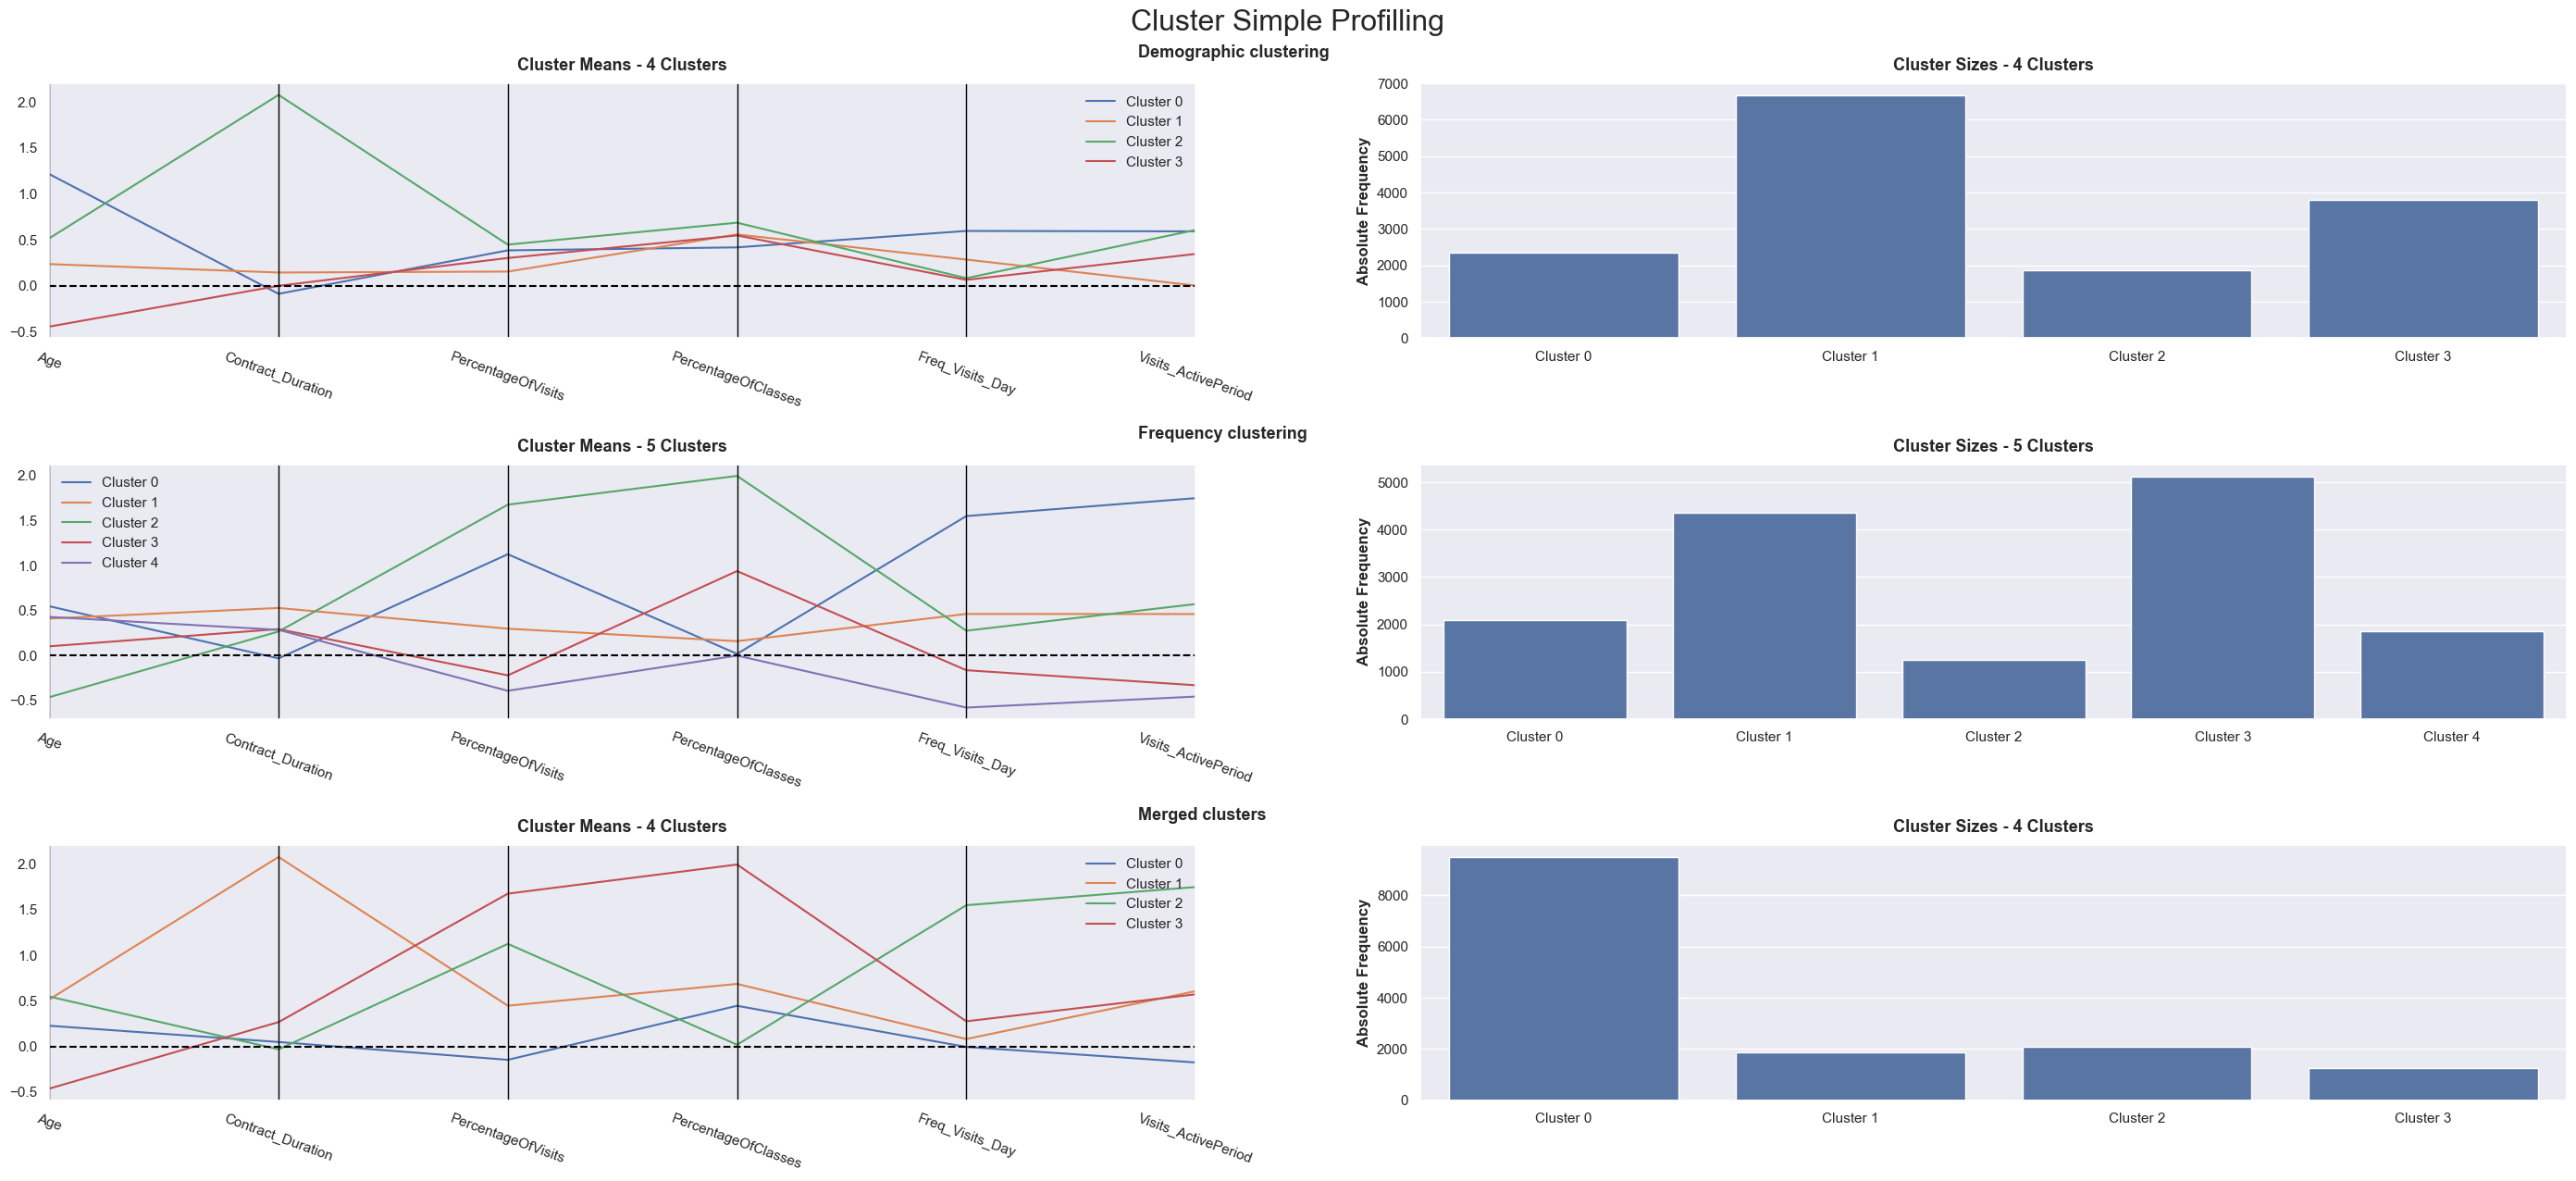

In [79]:
# Profilling each cluster (demographic perspective and frequency perspective)
cluster_profiles(
    df = df[metric_features + ['label_demographic', 'label_freq', 'merged_labels']], 
    label_columns = ['label_demographic', 'label_freq', 'merged_labels'], 
    figsize = (28, 13), 
    compar_titles = ["Demographic clustering", "Frequency clustering", "Merged clusters"])

In [80]:
#Get solution's R2 score
sst = get_ss(df[metric_features])  
ssw_labels = df[metric_features+ ["merged_labels"]].groupby(by='merged_labels').apply(get_ss) 
ssb = sst - np.sum(ssw_labels)
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.3285


In [81]:
df_study= df[["merged_labels"] + metric_features].groupby(["merged_labels"]).sum()

In [82]:
df_study[metric_features].apply(lambda col: col/(col.sum())).style.format(precision=2).background_gradient(axis=0)

In [83]:
df_study= df[["merged_labels"] + activities].groupby(["merged_labels"]).sum()

In [84]:
df_study[activities].apply(lambda col: col/(col.sum())).style.format(precision=2).background_gradient(axis=0)

In [85]:
df_study= df[["merged_labels"] + compare].groupby(["merged_labels"]).sum()

In [86]:
#Check cluster data for other features 
df_study[compare].apply(lambda col: col/(col.sum())).style.format(precision=2).background_gradient(axis=0)

<div class="alert alert-block alert-success">

<a class="anchor" id="16th-bullet">    </a>
## 4.3 Gaussian Mixture Model

    
</div>

**Gaussian Mixture Models** help represent normally distributed subpopulations within an overall population.\
It is a good model to use when clusters have different sizes, shapes, and orientations, so it is a possible approach to understand clusters we couldn't find before.

<div class="alert alert-block alert-info">

<a class="anchor" id="17th-bullet">    </a>
### 4.3.1 Frequency Prespective
</div>

<div class="alert alert-block alert-info">

<a class="anchor" id="bullet">    </a>
### 4.3.1.1.Defining Hyperparametrs
</div>

We need to define the **covariance_type** hyperparameter, that defines the degree of freedom in the shape of each cluster and the **n_components**:

We use **BIC** and **AIC** to define our best parameters, being the smallest value for these metric the best one (considering n_components = 4 as was used for the other models)

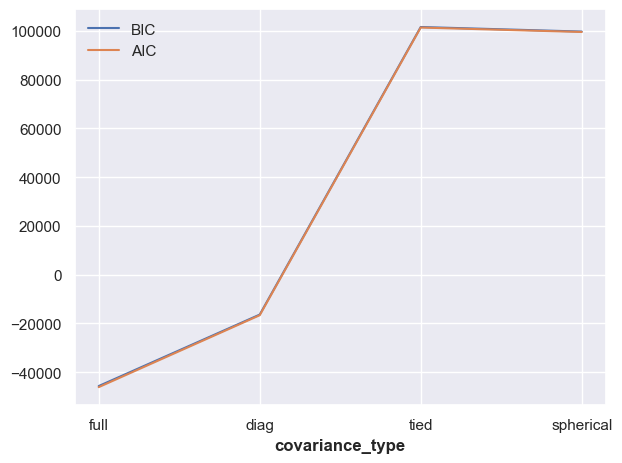

In [87]:
# Selecting covariance type based on AIC and BIC
cov_type = ['full','diag', 'tied', 'spherical']
models = [GaussianMixture(n_components=4, covariance_type=t, n_init=10, random_state=1).fit(df_frequency)
          for t in cov_type]

# TO-DO: compute the aic and bic values for each cluster solution. Use the appropriate GMM methods.
bic_values = [gmm.bic(df_frequency) for gmm in models]
aic_values = [gmm.aic(df_frequency) for gmm in models]
plt.plot(cov_type, bic_values, label='BIC')
plt.plot(cov_type, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('covariance_type')
plt.xticks(cov_type)
plt.show()

The best *covariance_type* is  **diag**

We also verify if *n_componets* = 4 is a good number of clusters to consider fot this specific model:

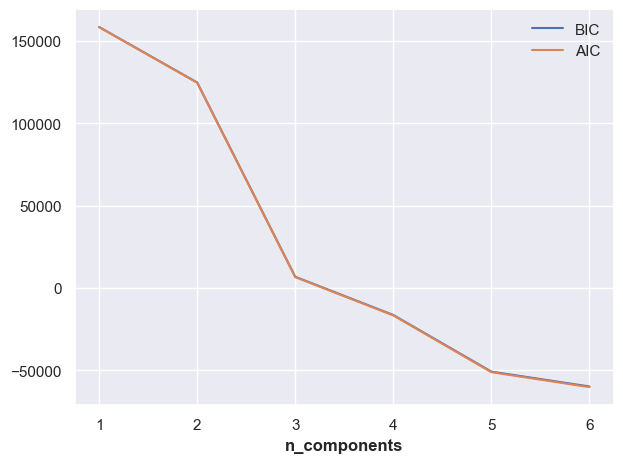

In [88]:
# Selecting number of components based on AIC and BIC
n_components = np.arange(1, 7)
models = [GaussianMixture(n, covariance_type='diag', n_init=10, random_state=1).fit(df_frequency)
          for n in n_components]

# TO-DO: compute the aic and bic values for each cluster solution. Use the appropriate GMM methods.
bic_values = [gmm.bic(df_frequency) for gmm in models]
aic_values = [gmm.aic(df_frequency) for gmm in models]
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_components)
plt.show()

Since the value *n_componets = 4* has both metrics close to 0, this value is kept.

<div class="alert alert-block alert-info">

<a class="anchor" id="bullet">    </a>
### 4.3.1.2 Modeling
</div>


The model was not achieving good results using defined values for *tol* (when the change resulting from an iteration is smaller tolerances, the iterations are terminated) and *reg_covar*, smaller values were selected: 

In [139]:
gmm = GaussianMixture(n_components=4, covariance_type='diag', n_init=10, init_params='k-means++', random_state=1, max_iter=3000, reg_covar=10**-3, tol = 10**-5)
freq_labels = gmm.fit_predict(df_frequency)
labels_proba = gmm.predict_proba(df_frequency)
freq_labels

array([1, 3, 2, ..., 2, 1, 2])

In [113]:
c= Counter(freq_labels)
c

Counter({3: 5683, 2: 3507, 1: 3044, 0: 2453})

In [114]:
counter = []
for n in range(0,4):
    counter.append(round(c[n]/df_frequency.shape[0],4))
counter

[0.167, 0.2073, 0.2388, 0.3869]

**Calculating R2:**

In [137]:
freq = pd.concat([data, pd.Series(freq_labels, index=data.index, name="freq_labels")], axis=1)

In [138]:
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(freq[frequency_perspective])  # get total sum of squares
ssw_labels = freq[frequency_perspective + ["freq_labels"]].groupby(by='freq_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.5001


<div class="alert alert-block alert-info">

<a class="anchor" id="18th-bullet">    </a>
### 4.3.2 Demographic Prespective
</div>

<div class="alert alert-block alert-info">

<a class="anchor" id="bullet">    </a>
### 4.3.2.1 Defining Hyperparameters
</div>

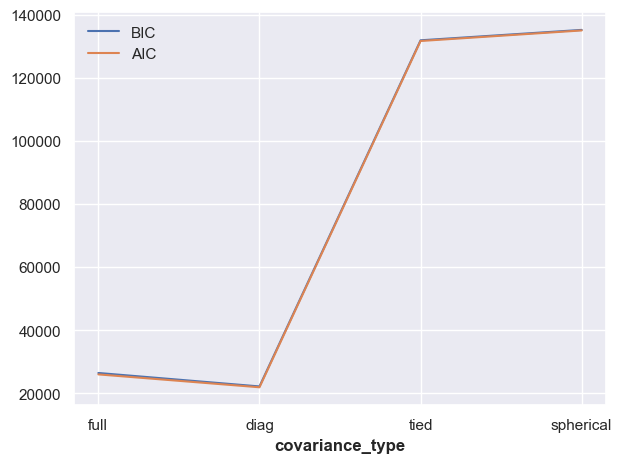

In [94]:
# Selecting covariance type based on AIC and BIC
cov_type = ['full','diag', 'tied', 'spherical']
models = [GaussianMixture(n_components=4, covariance_type=t, n_init=10, random_state=1).fit(df_demographic)
          for t in cov_type]

# TO-DO: compute the aic and bic values for each cluster solution. Use the appropriate GMM methods.
bic_values = [gmm.bic(df_demographic) for gmm in models]
aic_values = [gmm.aic(df_demographic) for gmm in models]
plt.plot(cov_type, bic_values, label='BIC')
plt.plot(cov_type, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('covariance_type')
plt.xticks(cov_type)
plt.show()

The best *covariance_type* is  **diag**

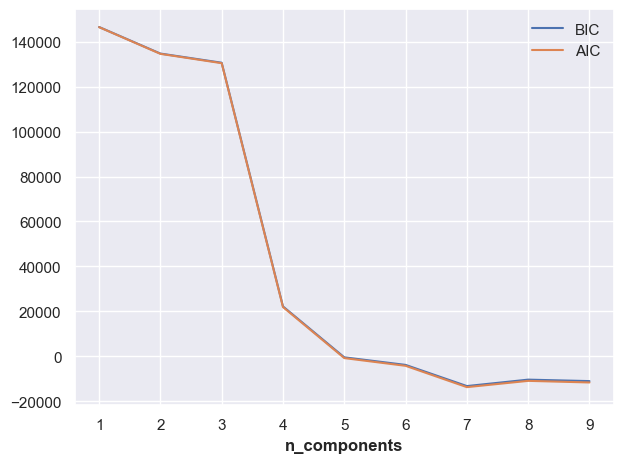

In [95]:
# Selecting number of components based on AIC and BIC
n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='diag', n_init=10, random_state=1).fit(df_demographic)
          for n in n_components]

# TO-DO: compute the aic and bic values for each cluster solution. Use the appropriate GMM methods.
bic_values = [gmm.bic(df_demographic) for gmm in models]
aic_values = [gmm.aic(df_demographic) for gmm in models]
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_components)
plt.show()

Since the value *n_componets = 5* is the closest to 0 with the *covariance_type* selected above, this value is used for modeling.

<div class="alert alert-block alert-info">

<a class="anchor" id="bullet">    </a>
### 4.3.2.2 Modeling
</div>

In [96]:
gmm = GaussianMixture(n_components=5, covariance_type='diag', n_init=10, init_params='k-means++', random_state=1, max_iter=3000, tol = 10**-4, reg_covar=10**-2)
dem_labels = gmm.fit_predict(df_demographic)
labels_proba = gmm.predict_proba(df_demographic)
dem_labels

array([0, 4, 0, ..., 0, 2, 2])

In [97]:
c= Counter(dem_labels)
c

Counter({4: 4798, 2: 3338, 0: 3005, 1: 2873, 3: 673})

In [98]:
counter = []
for n in range(0,5):
    counter.append(round(c[n]/df_demographic.shape[0],4))
counter

[0.2046, 0.1956, 0.2273, 0.0458, 0.3267]

**Calculating R2:**

In [99]:
dem = pd.concat([data, pd.Series(dem_labels, index=data.index, name="dem_labels")], axis=1)

In [100]:
sst = get_ss(dem[demographic_perspective])  # get total sum of squares
ssw_labels = dem[demographic_perspective+ ["dem_labels"]].groupby(by='dem_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.3276


<div class="alert alert-block alert-info">

<a class="anchor" id="bullet">    </a>
### 4.3.3 Merging Prespectives
</div>

We define the labels for each prespective:

In [141]:
data['freq_labels'] = freq_labels
data['dem_labels'] = dem_labels

In [142]:
pd.crosstab(data['freq_labels'],
            data['dem_labels'])

dem_labels      0     1     2    3     4
freq_labels                             
0             271   348   617  169  1048
1             576   139  1116  208  1005
2             907   943   817   96   744
3            1251  1443   788  200  2001

### Merging using Hierarchical clustering:

In [148]:
# Centroids of the concatenated cluster labels
df_centroids = data.groupby(['dem_labels', 'freq_labels'])\
    [metric_features].mean()

In [144]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
linkage = 'ward'
hclust = AgglomerativeClustering(
    linkage=linkage, 
    metric='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids)

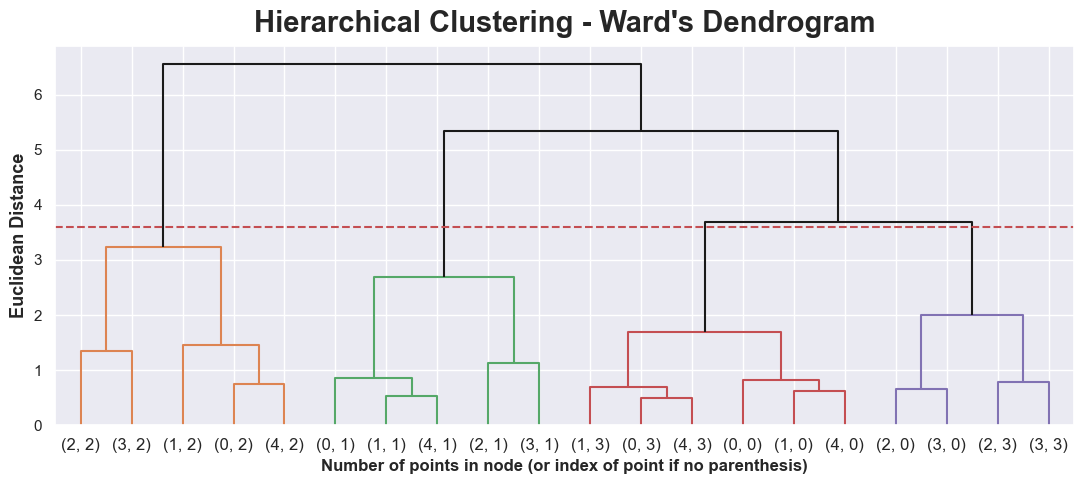

In [147]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 3.6
dendrogram(linkage_matrix, 
           truncate_mode='level', 
           labels=df_centroids.index, p=5, 
           color_threshold=y_threshold, 
           above_threshold_color='k')

plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

Lookig at the dendogram, we select 4 as the optimal number of clusters:

In [149]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    metric='euclidean', 
    n_clusters=4
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

In [107]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()

df_ = data.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['merged_labels'] = df_.apply(
    lambda row: cluster_mapper[
        (row['dem_labels'], row['freq_labels'])
    ], axis=1
)

# Merged cluster centroids
df_.groupby('merged_labels')[metric_features].mean()

Age  Contract_Duration  PercentageOfVisits  \
merged_labels                                                    
0              0.522408           0.271478            0.900214   
1              0.764609           1.334327           -0.299775   
2             -0.323368           0.627555            0.931340   
3              0.231989          -0.096685           -0.244066   

               PercentageOfClasses  Freq_Visits_Day  Visits_ActivePeriod  
merged_labels                                                             
0                         0.002969         1.169772             1.445406  
1                         0.509156        -0.195260            -0.288787  
2                         1.927093         0.137828             0.270243  
3                         0.201617        -0.076773            -0.241613

In [150]:
#Merge cluster contigency table
# Getting size of each final cluster
df_counts = df_.groupby('merged_labels')\
    .size()\
    .to_frame()

# Getting the labels:
df_counts = df_counts\
    .rename({v:k for k, v in cluster_mapper.items()})\
    .reset_index()

df_counts['dem_labels'] = df_counts['merged_labels'].apply(lambda x: x[0])
df_counts['freq_labels'] = df_counts['merged_labels'].apply(lambda x: x[1])

df_counts.pivot(values=0, index='dem_labels', columns='freq_labels')

freq_labels       1       2       3
dem_labels                         
3               NaN     NaN  1774.0
4            3044.0  3507.0  6362.0

In [151]:
df = df_.copy()

<div class="alert alert-block alert-info">

<a class="anchor" id="20th-bullet">    </a>
### 4.3.4 Profiling
</div>

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

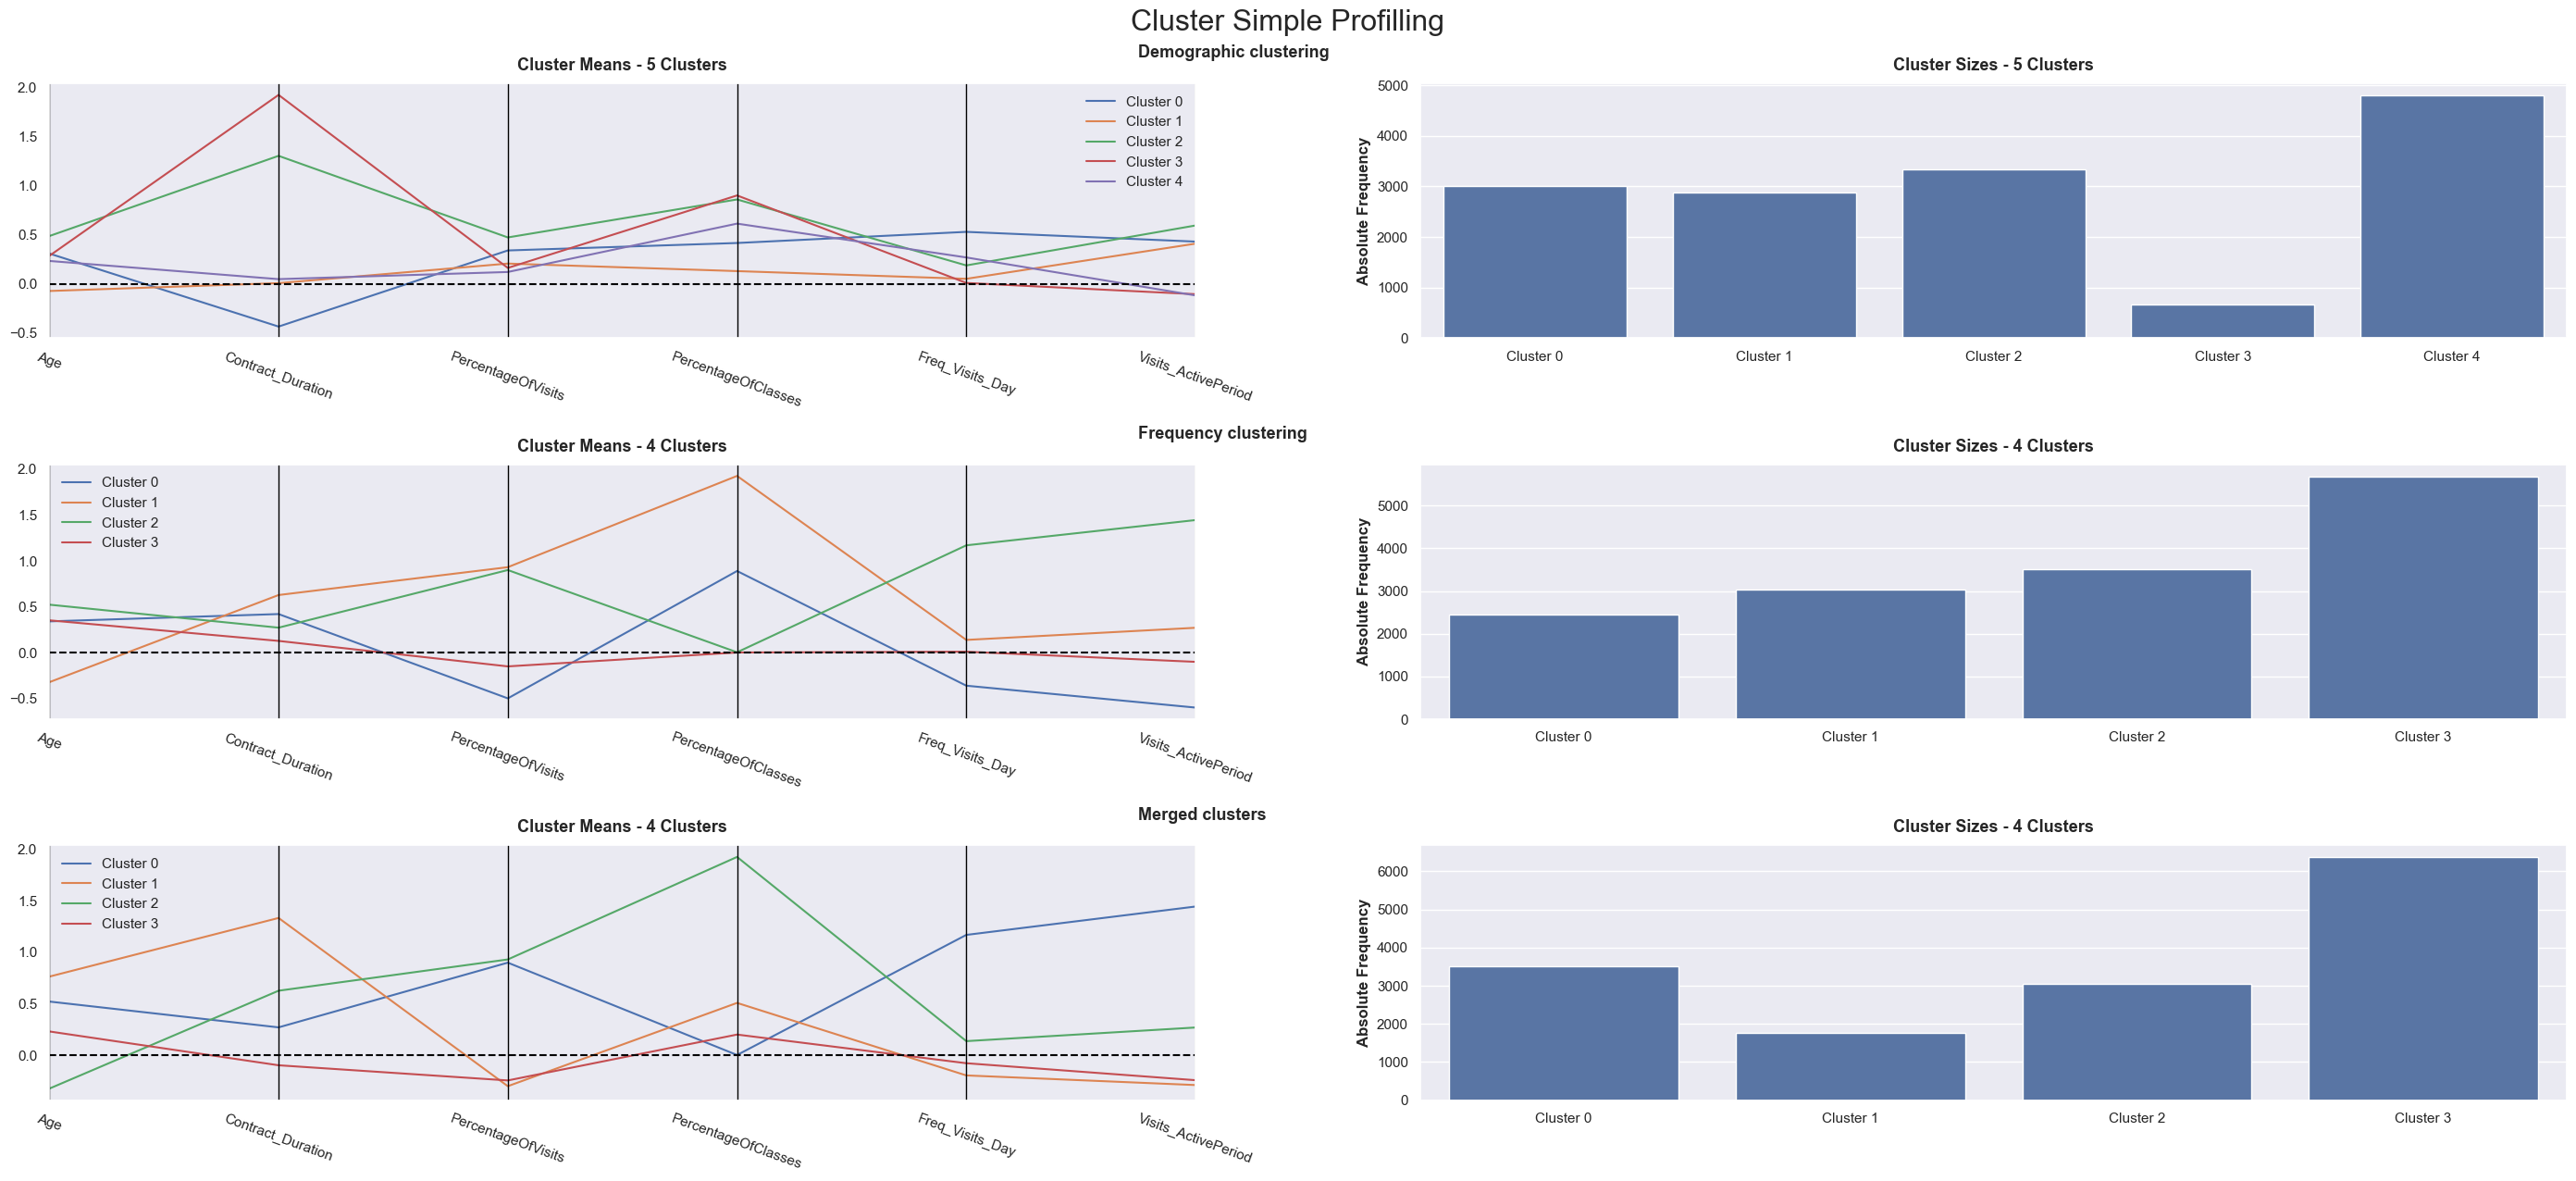

In [110]:
# Profilling each cluster (product, behavior, merged)
cluster_profiles(
    df = df[metric_features + ['dem_labels', 'freq_labels', 'merged_labels']], 
    label_columns = ['dem_labels', 'freq_labels', 'merged_labels'], 
    figsize = (28, 13), 
    compar_titles = ["Demographic clustering", "Frequency clustering", "Merged clusters"])

In [111]:
sst = get_ss(df[metric_features])  # get total sum of squares
ssw_labels = df[metric_features+ ["merged_labels"]].groupby(by='merged_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.3395


<div class="alert alert-block alert-success">

<a class="anchor" id="bullet">    </a>
## 5. Final Model and Profiling

    
</div>

Looking at our results, we select **Gaussian Mixture Model** as the best model for customer segmentation:

<div class="alert alert-block alert-info">

<a class="anchor" id="bullet">    </a>
### 5.1 Numerical Variables
</div>

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


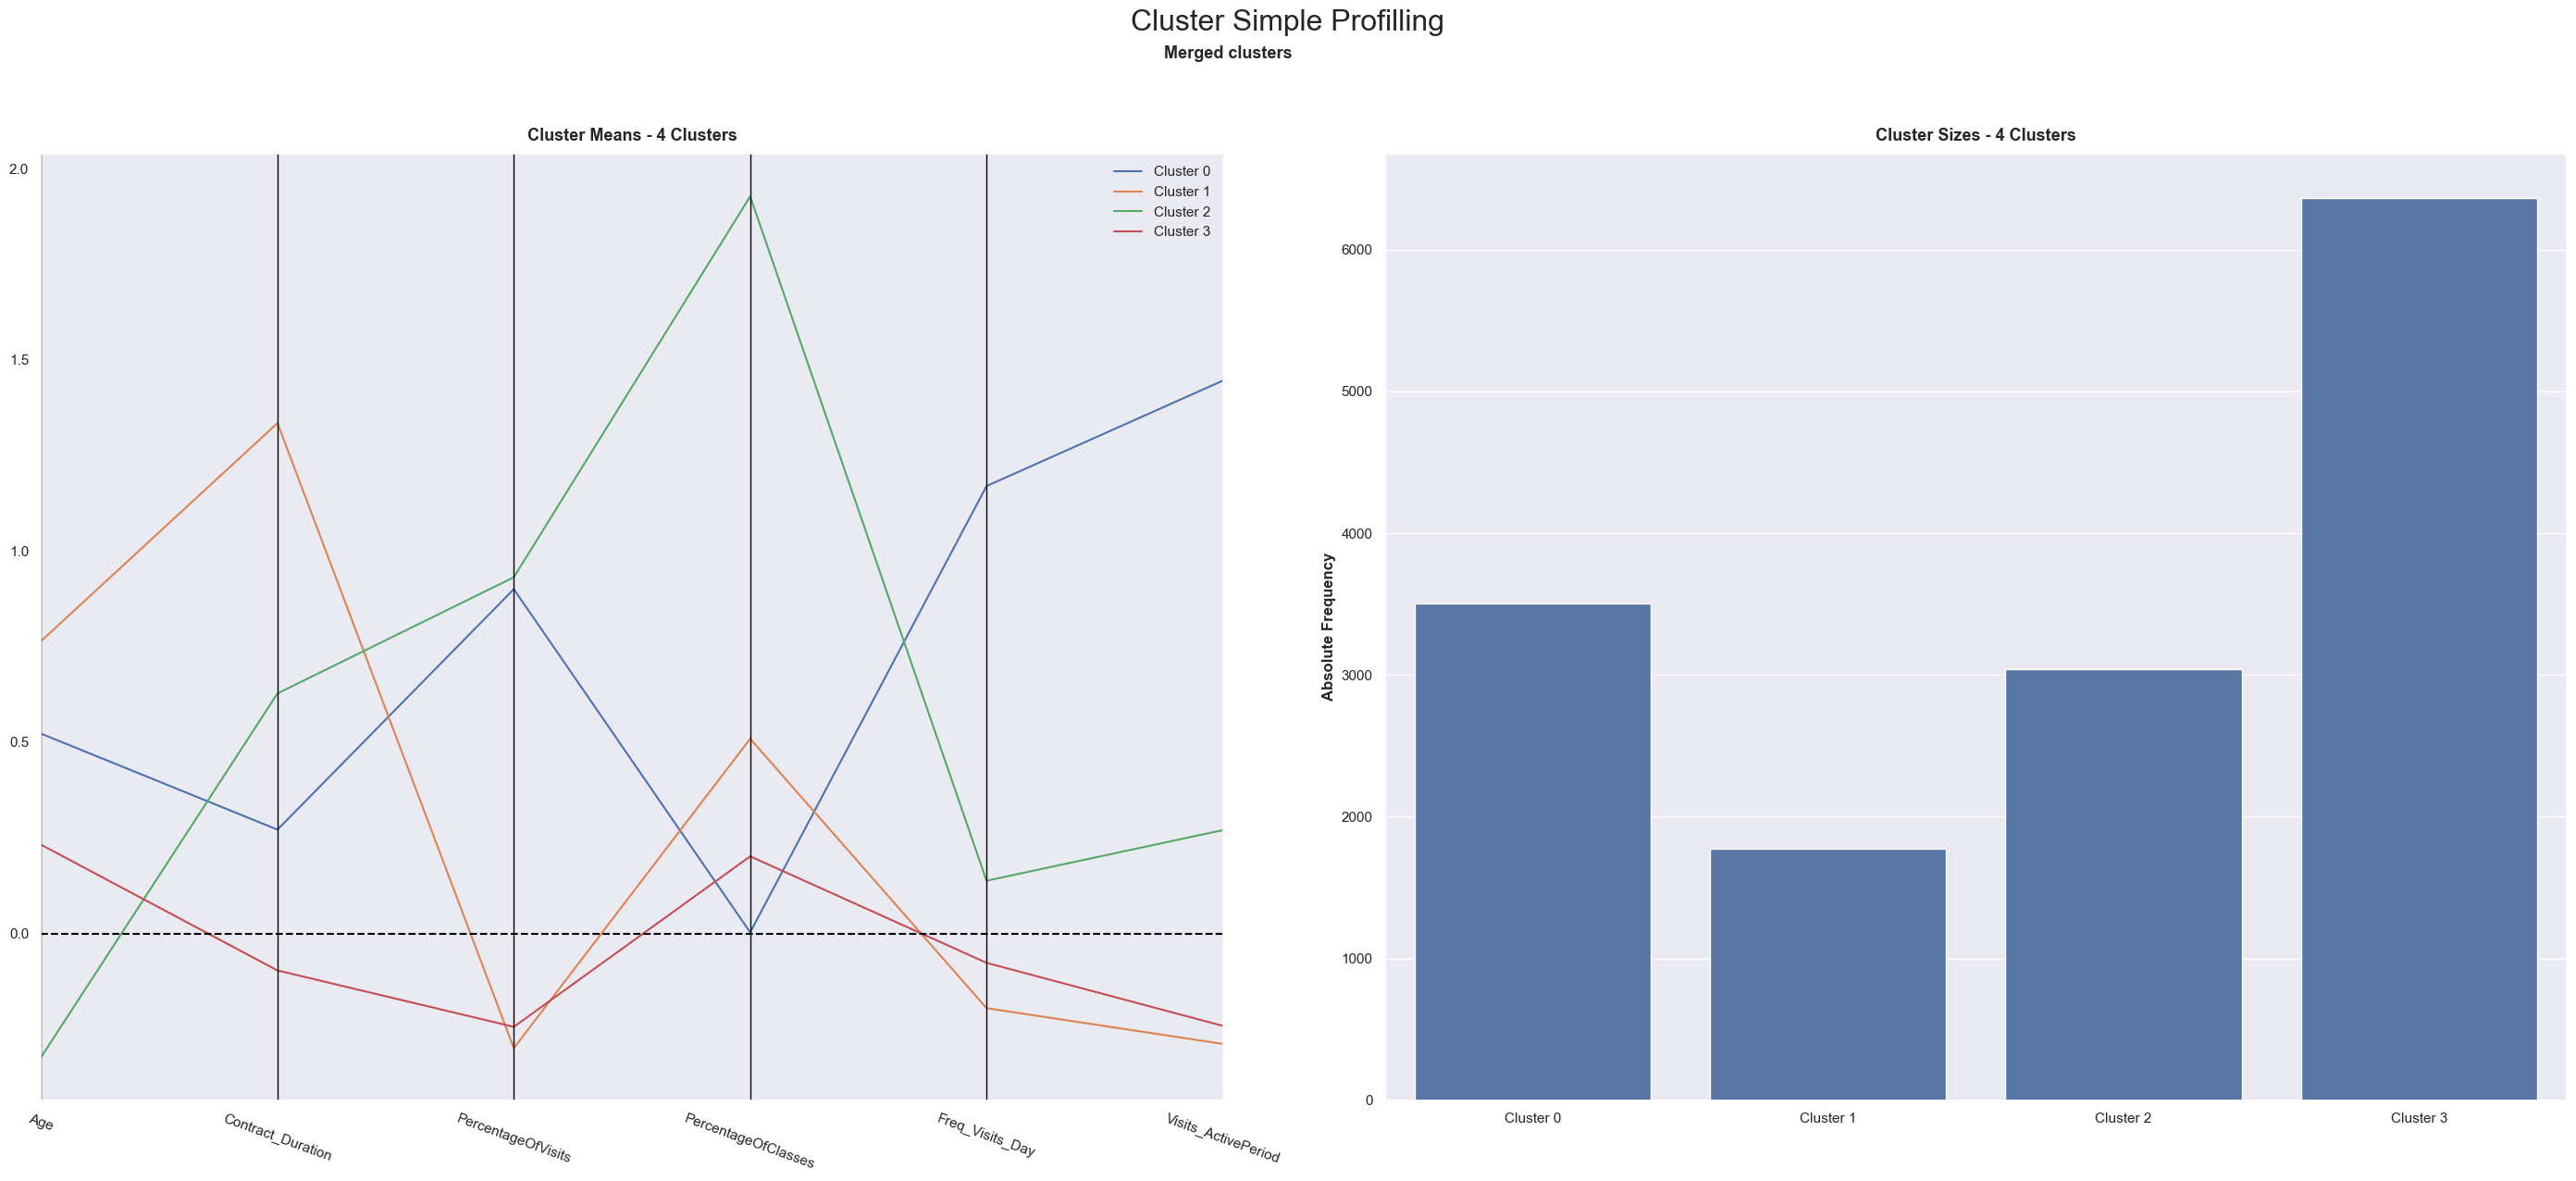

In [152]:
# Profilling each cluster (product, behavior, merged)
cluster_profiles(
    df = df[metric_features + ['merged_labels']], 
    label_columns = ['merged_labels'], 
    figsize = (28, 13), 
    compar_titles = ["Merged clusters"])

Calculating the average value for each cluster:

In [153]:
cluster_means = df.groupby('merged_labels').mean()[metric_features].T
cluster_means.style.format(precision=2).background_gradient(axis=1)

<div class="alert alert-block alert-info">

<a class="anchor" id="bullet">    </a>
### 5.2 Categorical Variables
</div>

In [154]:
df_act= df[["merged_labels"] + activities].groupby(["merged_labels"]).sum()

Results with metrics calculated **inside each cluster**:

In [184]:
df_act[activities].apply(lambda col: col/(df_act.sum(axis=1))).style.format(precision=2).background_gradient(axis=1)

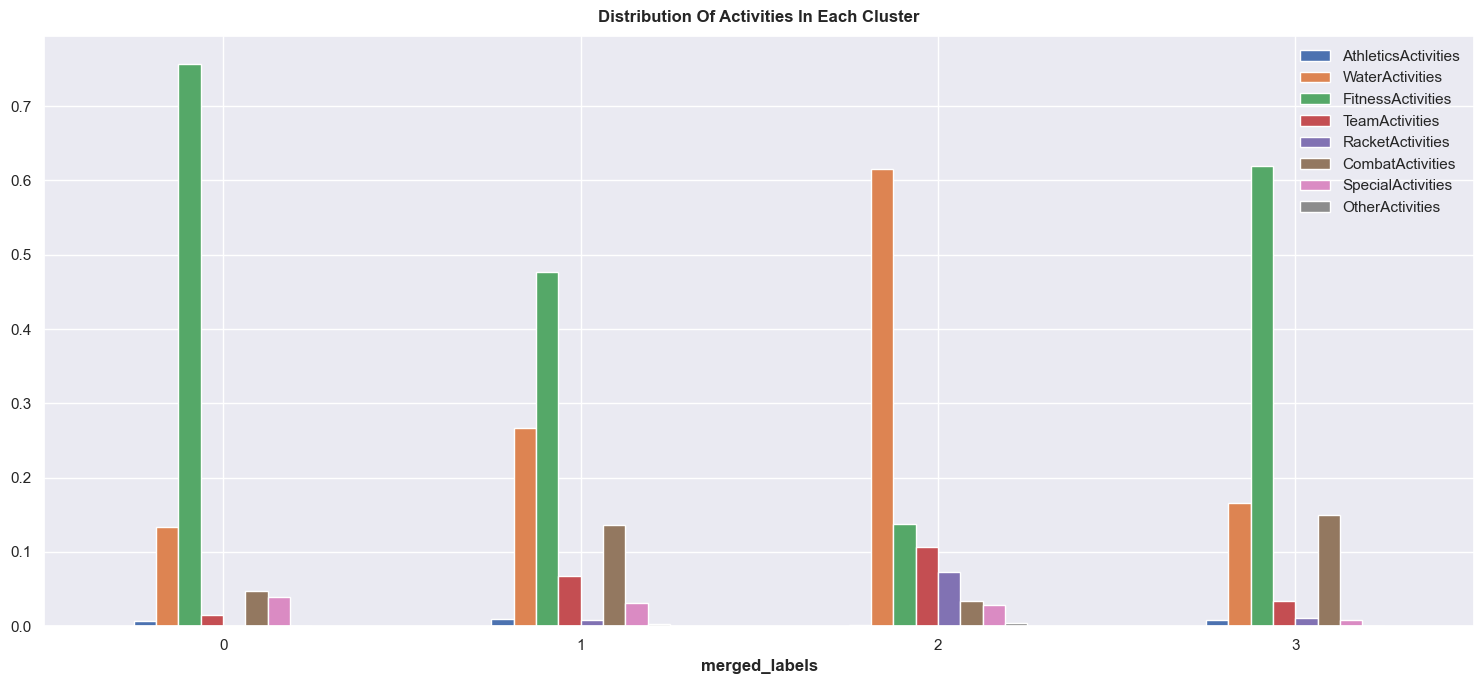

In [179]:
fig, ax = plt.subplots(figsize=(15,7))
df_act.apply(lambda col: col/(df_act.sum(axis=1))).plot(kind='bar', stacked=False, ax=ax)
plt.xticks(rotation=0)
plt.title('Distribution Of Activities In Each Cluster')
plt.show()

Results with metrics calculated **between cluster**:

In [158]:
df_act[activities].apply(lambda col: col/(col.sum())).style.format(precision=2).background_gradient(axis=0)

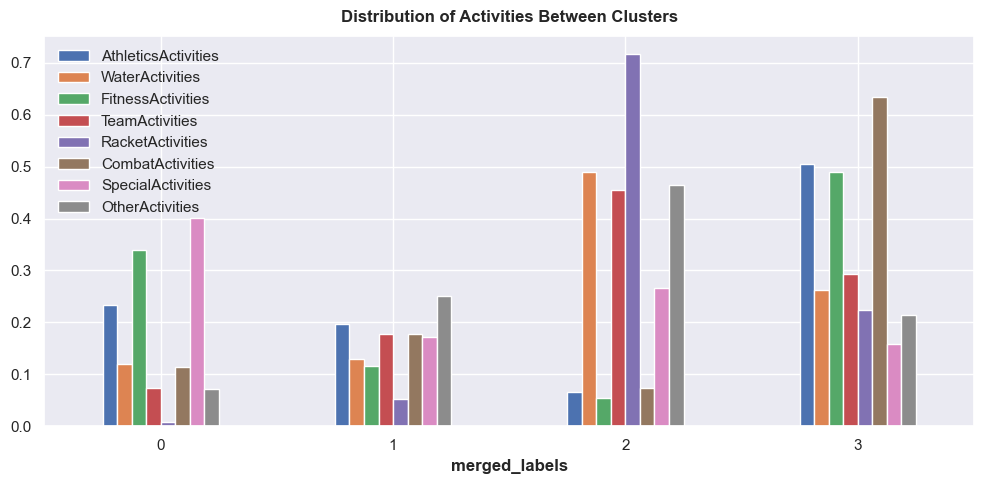

In [182]:
fig, ax = plt.subplots(figsize=(10,5))
df_act.apply(lambda col: col/(col.sum())).plot(kind='bar', stacked=False, ax=ax)
plt.xticks(rotation=0)
plt.title('Distribution of Activities Between Clusters')
plt.show()

In [160]:
df_comp= df[["merged_labels"] + compare].groupby(["merged_labels"]).sum()

Results with metrics calculated **inside each cluster**:

In [185]:
df_comp[compare].apply(lambda col: col/(df_comp.sum(axis=1))).style.format(precision=2).background_gradient(axis=1)

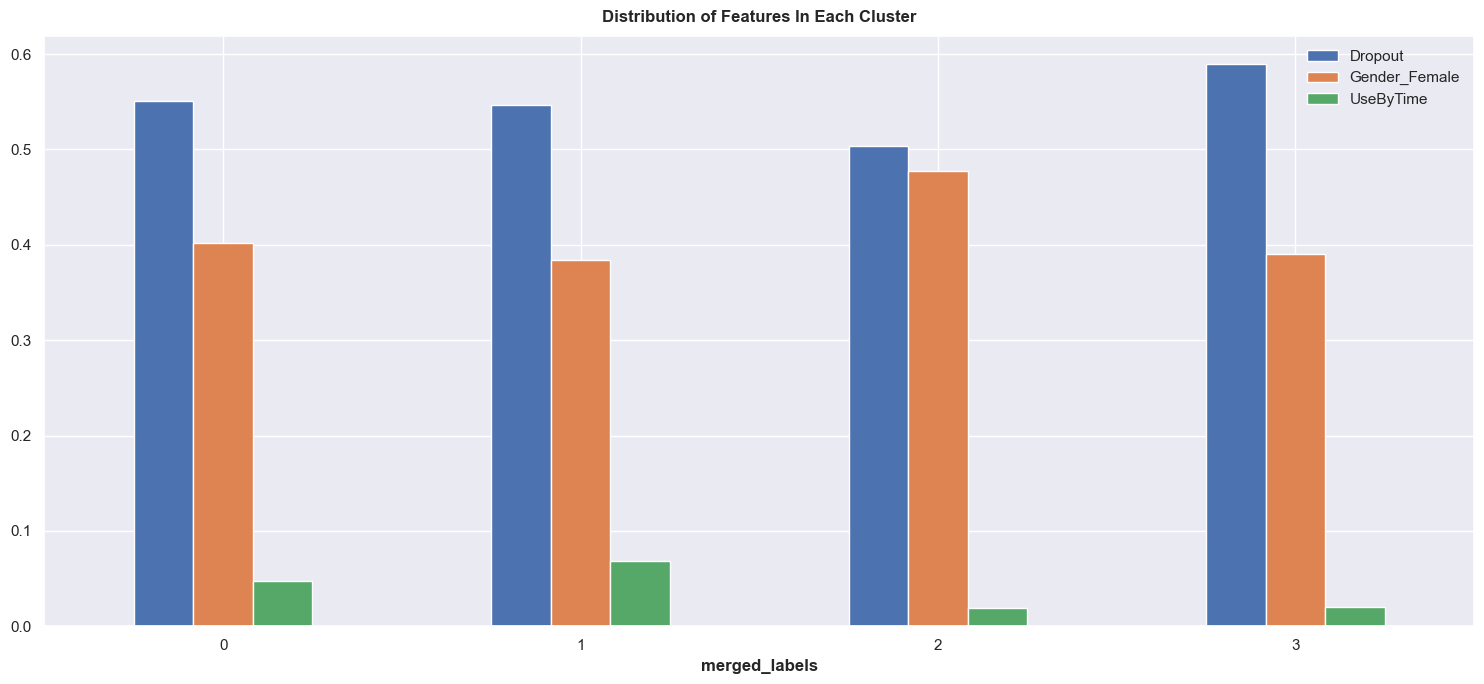

In [181]:
fig, ax = plt.subplots(figsize=(15,7))
df_comp.apply(lambda col: col/(df_comp.sum(axis=1))).plot(kind='bar', stacked=False, ax=ax)
plt.xticks(rotation=0)
plt.title('Distribution of Features In Each Cluster')
plt.show()

Results with metrics calculated **between cluster**:

In [163]:
df_comp[compare].apply(lambda col: col/(col.sum())).style.format(precision=2).background_gradient(axis=0)

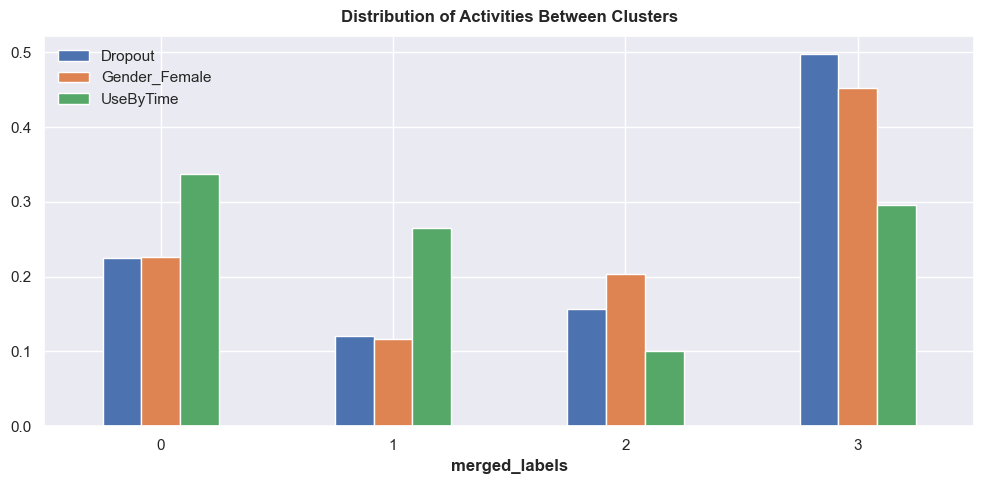

In [183]:
fig, ax = plt.subplots(figsize=(10,5))
df_comp.apply(lambda col: col/(col.sum())).plot(kind='bar', stacked=False, ax=ax)
plt.xticks(rotation=0)
plt.title('Distribution of Activities Between Clusters')
plt.show()

<div class="alert alert-block alert-info">

<a class="anchor" id="bullet">    </a>
### 5.3 Final Clusters
</div>

Looking at the results above we can characterize our clusters:

**Cluster 0:** poeple who make use of their allowed visits, visited more times in general\
**Cluster 1:** older people, bigger contract, visit few of their allowed times and less in general\
**Cluster 2:** younger people, who make use of their allowed visits, usually go to classes\
**Cluster 3:** smaller contract time, visit few of their allowed times.

**Cluster 0:** Mostly people who do FitnessActivities, most of the SpecialActivites clients and most of the UseByTime Clients\
**Cluster 1:** Mostly Fitness clients with some WaterActivities and CombatActivities, most of the Male Clients and current Clients\
**Cluster 2:** Mostly people who do WaterActivities, most of the RacketActivities, OtherActivities, TeamActivities  and WaterActivities clients\
**Cluster 3:** Mostly Fitness clients, Most of the CombatActivities, AthleticsActivities and Fitness Clients, most of the Dropouts, most of the female clients